Tratamiento de datos subenanas y plantillas metalicidad. filtrado y submuestreo a 1000 longitudes de onda entre los 500 y 850 nm. 
En una segunda parte se filtra y submuestrean los espectros de las subenanas a 1600 longitudes de onda entre los 500 y 900 nm.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install --upgrade pandas

# Librerias

In [ ]:
 from astropy.io import fits

In [ ]:
%matplotlib inline


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [ ]:
import numpy as np
from numpy import nan
import pandas as pd
from scipy import interpolate
import io

import pywt

from astropy.io import ascii
import os

import json


In [ ]:
from functools import reduce as reduce

In [ ]:
pd.set_option('display.max_columns',30)

# Montar google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

os.chdir("/content/drive/MyDrive/Astrofisica/Espectros")
#/content/drive/My Drive/Visualizacion
os.getcwd()

'/content/drive/MyDrive/Astrofisica/Espectros'

# Carga datasets


## Carga de json con los espectros de las BD y plantillas.

Carga espectros y datos SDSS

### Carga catálogo subenanas. df_obj_espectros_raw

In [ ]:
directorio = 'BD_espectros_sample/'
nom_fichero = 'datos_obj_espectros.json'
df_obj_espectros_raw = pd.read_json(directorio+nom_fichero)
df_obj_espectros_raw

,nom_fichero_fit,flujo,long_A,PLATE,MJD,FIBERID,SPECOBJID,Z,PLATEQUALITY,CLASS,SUBCLASS,Z_ERR
0,spec-1941-53386-0433.fits,"[0.35031041500000004, -0.1485088319, 0.0116492...","[3798.4, 3799.3, 3800.1, 3801.0, 3801.9, 3802....",1941,53386,433,2185490798122919936,-0.000109,good,STAR,M2,0.000028
1,spec-1808-54176-0058.fits,"[-0.6632891893, 2.39052701, -5.435426712, 1.57...","[3815.0, 3815.9, 3816.8, 3817.7, 3818.6, 3819....",1808,54176,58,2035643044551747584,-0.000234,good,STAR,M2V,0.000016
2,spec-1970-53386-0009.fits,"[-0.4185376167, 0.1414910257, -0.6999538541, 0...","[3807.2, 3808.0, 3808.9, 3809.8, 3810.7, 3811....",1970,53386,9,2218025347188811776,-0.000053,good,STAR,M6,0.000030
3,spec-1803-54152-0200.fits,"[-0.5595631599, 1.6141862868999999, -0.4718873...","[3808.0, 3808.9, 3809.8, 3810.7, 3811.5, 3812....",1803,54152,200,2030052577277667328,0.000217,good,STAR,M2V,0.000035
4,spec-1955-53442-0499.fits,"[-0.4254819751, 0.28042450550000003, 1.2131350...","[3801.0, 3801.9, 3802.8, 3803.6, 3804.5, 3805....",1955,53442,499,2201271539700099072,-0.000042,marginal,STAR,M2V,0.000037
...,...,...,...,...,...,...,...,...,...,...,...,...
3491,spec-0885-52379-0137.fits,"[0.6488318443000001, 1.1210706234, 0.755453825...","[3803.6, 3804.5, 3805.4, 3806.3, 3807.2, 3808....",885,52379,137,996459115741997056,-0.000392,good,STAR,M3,0.000070
3492,spec-0712-52199-0221.fits,"[3.8596711159, 2.1484868526, -2.7742624283, 0....","[3805.4, 3806.3, 3807.2, 3808.0, 3808.9, 3809....",712,52199,221,801701518582507520,0.000100,good,STAR,M2,0.000026
3493,spec-0730-52466-0251.fits,"[1.093152523, 1.5214309691999999, 2.8724341393...","[3812.4, 3813.3, 3814.2, 3815.0, 3815.9, 3816....",730,52466,251,821975967722399744,-0.000098,good,STAR,M2,0.000076
3494,spec-0707-52177-0095.fits,"[-0.6275257468000001, -0.2927546501, -1.621553...","[3823.0, 3823.8, 3824.7, 3825.6, 3826.5, 3827....",707,52177,95,796037384062920704,-0.000013,good,STAR,M8,0.000043


In [ ]:
df_obj_espectros_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3496 entries, 0 to 3495
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nom_fichero_fit  3496 non-null   object 
 1   flujo            3496 non-null   object 
 2   long_A           3496 non-null   object 
 3   PLATE            3496 non-null   int64  
 4   MJD              3496 non-null   int64  
 5   FIBERID          3496 non-null   int64  
 6   SPECOBJID        3496 non-null   int64  
 7   Z                3496 non-null   float64
 8   PLATEQUALITY     3496 non-null   object 
 9   CLASS            3496 non-null   object 
 10  SUBCLASS         3496 non-null   object 
 11  Z_ERR            3496 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 355.1+ KB


Vemos que no hay nulos.

### Carga de las plantillas con los espectros de las subenanas. df_espec_platillas

In [ ]:
directorio = 'Plantillas/'
nom_fichero = 'espectros_plantillas.json'
df_espec_platillas = pd.read_json(directorio+nom_fichero)
df_espec_platillas.head(3)

,flujo,long_A,clase_metalicidad
0,"[0.3998440802, 0.3969808519, 0.3941309154, 0.3...","[5000.0, 5000.0581054688, 5000.1166992188, 500...",usdm0
1,"[0.3611840904, 0.3597990274, 0.3584717214, 0.3...","[5000.0, 5000.0581054688, 5000.1166992188, 500...",usdm1
2,"[0.3468220234, 0.3459565341, 0.3451767564, 0.3...","[5000.0, 5000.0581054688, 5000.1166992188, 500...",usdm2


In [ ]:
df_espec_platillas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   flujo              30 non-null     object
 1   long_A             30 non-null     object
 2   clase_metalicidad  30 non-null     object
dtypes: object(3)
memory usage: 960.0+ bytes


## Carga fichero con información fotométrica y bandas moleculares de absorción de catálogo de subenanas. df_catalogo_BD

Cargamos la información del catálogo con las bandas de absorción y fotométrica. (Savcheva et al. 2014)

In [ ]:
directorio_1 = '../Espectros/'
df_catalogo_BD = pd.read_csv(directorio_1+'datos_info_fotometrica_abs_molecular.csv', index_col=False, encoding='utf-8')

In [ ]:
df_catalogo_BD.head(2)

,ID,PLATE,MJD,FIBER,RA,DEC,U,Z,I,G,R,ERR_U,ERR_Z,ERR_I,ERR_G,ERR_R,EXTINCTION_U,EXTINCTION_Z,EXTINCTION_I,EXTINCTION_G,EXTINCTION_R,PMRA,PMDEC,PMRAERR,PMDECERR,CAH2,CAH3,TIO5,MATCH,DIST22,NFIT,SIGRA,SIGDEC,RV,ZETA,SP,MR,MI,MZ,D,ZGAL,UGAL,VGAL,WGAL,VTOTG,ACTIVITY,EWHA,EWHAERR,SNR,D_ERR,VTR,VTR_ERR
0,SDSS124626.9-023810.8,337.0,51997.0,312.0,191.611923,-2.636324,23.469448,17.949856,19.768297,24.524750,22.401068,1.265012,0.026658,0.029573,0.561597,0.164698,0.130588,0.037467,0.052843,0.096086,0.069689,-9999.0000,-9999.0000,-9999.00000,-9999.00000,0.389411,0.609083,0.565219,-9999.0,-9999.0000,-9999.0,-9999.000,-9999.000,-618.8390,0.649856,4.0,22.406868,18.854904,5.138985,9.658334,23.377802,-9999.000000,-9999.000000,-9999.000000,-9999.00000,-9999.0,-0.231155,1.67826,2.06356,1.924041,-9999.00000,-9999.000000
1,SDSS125438.5-012710.8,337.0,51997.0,601.0,193.660264,-1.452997,23.698956,17.714697,18.538862,21.839705,19.928160,0.846610,0.023911,0.016288,0.070512,0.022039,0.109857,0.031519,0.044454,0.080831,0.058626,26.1205,-19.3635,5.44588,5.44588,0.273155,0.417989,0.477443,1.0,22.9477,5.0,184.793,181.361,63.9773,0.604236,6.0,13.064486,11.456273,10.792685,229.619930,216.508060,62.306774,-12.891923,52.988358,73.14216,-9999.0,0.713584,0.37238,10.39050,42.361710,35.44969,10.643162


# Revisión metadatos

## Definición de funciones

Definiremos una función para obtener los metadatos, otra para los histogramas y otra para representar la distribución de las variables categoricas.

In [ ]:
def descripcionDatosDataset(datos,longitud =5): #longitud es el número de valores más repetidos a mostrar
                  
    numericas=[]
    nominales=[]
    print("Cantidad de filas:", datos.shape[0])
    print("Cantidad de columnas:", datos.shape[1])
    print('-'*100)
    print('Columnas: ', datos.columns)
    print('-'*100)
    for columna in datos.columns:
        valoresDescripcion = ''
        tipo = ''
        if datos[columna].dtype == 'float64' or datos[columna].dtype == 'int64':
            tipo = 'numérico'
            valoresDescripcion = datos[columna].agg(['min', 'max', 'mean', 'std', 'median'])#es un diccionario
            valoresDescripcion['Primer cuartil']= datos[columna].quantile(0.25)
            valoresDescripcion['Tercer cuartil']= datos[columna].quantile(0.75)
            cantidadNulos = datos[columna].isna().sum()
            numericas.append(columna)
            
        else:
            tipo = 'nominal' #categórico | string | no-numérico
            lista = [x for x in datos[columna].unique() if str(x) != 'nan'] #quitamos los nulos de la lista de valores únicos
            valoresDescripcion = {'numeroValoresUnicos' : len(lista),
                                  'valoresPresentes' : lista[:10], 
                                  'cantidadNulos' : datos[columna].isna().sum(),
                                  'conteoValores' : pd.value_counts(datos[columna]).sort_values(ascending=False)}
            #si la longitud de lista es menor que el parámetro longitud se mostrarán todos los elementos
            funLongitudMinima = lambda x: len(x) if len(x) < longitud else longitud
            n_datos_a_mostrar = funLongitudMinima(lista)#si nº elementos lista mayor que longitud toma el valor longitud 
            nominales.append(columna)
        print('Columna: ' + columna)
        print('Tipo de datos: ' + tipo)
        print('Descripción de valores:')
        
        if tipo == 'numérico':
            print(valoresDescripcion,'\n')
            pctNulos = cantidadNulos / datos.shape[0] * 100
            print('Cantidad de nulos: ' + str(cantidadNulos) + ' = ' + "{0:.2f}".format(pctNulos) + '%')            
        else:
            print('Número valores únicos: ' + str(valoresDescripcion['numeroValoresUnicos'])),
            #print('-- Valores presentes (10 primeros): ' + str(valoresDescripcion['valoresPresentes'][:10]))
            pctNulos = (valoresDescripcion['cantidadNulos'] / datos.shape[0]) * 100
            print('Cantidad de nulos: ' + str(valoresDescripcion['cantidadNulos']) + ' = ' + "{0:.2f}".format(pctNulos) + '%')
            print('Distribucion valores más repetidos ( '+str(n_datos_a_mostrar)+ ' primeros) :\n', valoresDescripcion['conteoValores'][:n_datos_a_mostrar])
        print('-'*100)
    return numericas, nominales

In [ ]:
def plot_numericos(dataset, lista_num, outliers = True, largo = 16, alto = 20,x_label = []): #list_num es la lista con los atributos numéricos
  print(lista_num)
  df_plot = dataset[lista_num]
  if outliers:
    IQR = df_plot.quantile(0.75)- df_plot.quantile(0.25)
    df_plot = df_plot[(df_plot>df_plot.quantile(0.25)-5*IQR)&
                        (df_plot<df_plot.quantile(0.75)+5*IQR)] #quitamos valores extremos para mejorar visualización
  #plt.style.use('ggplot')

  plt.style.use('classic')
  fig, ax = plt.subplots(figsize=(largo,alto))
  fig.patch.set_facecolor('white')
  ax=df_plot.hist(bins=30,edgecolor='black',ax=ax)
  ax=ax.ravel()
  print(ax.shape)
  for i, labelx in enumerate(x_label):
    ax[i].set_xlabel(labelx, size=18)
    ax[i].set_title("", size=10)
    ax[i].tick_params(labelsize=15)
  fig.tight_layout(h_pad=4)


In [ ]:
def plot_categoria(dataset, atributo,x_label=False): #atributo es la lista con los atributos no numéricos

  fig, ax = plt.subplots()
  fig.patch.set_facecolor('white')
  df_plot = dataset[atributo]
  ax = df_plot.value_counts().plot.bar(figsize=(10,8),color='orange',edgecolor='black')
  #ax.set_title('Distribución por '+ atributo, size=12)
  if not x_label:
    x_label = atributo
  ax.set_xlabel(x_label, size=13)
  ax.set_ylabel('Frecuencia', size=13)
  ax.tick_params(labelsize=12, labelrotation=45, pad=0)
  plt.show()


## Metadatos información fotométrica. df_catalogo_BD

Cargamos la información del catálogo con las bandas de absorción y fotométrica. (Savcheva et al. 2014)

In [ ]:
df_catalogo_BD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3517 entries, 0 to 3516
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            3517 non-null   object 
 1   PLATE         3517 non-null   float64
 2   MJD           3517 non-null   float64
 3   FIBER         3517 non-null   float64
 4   RA            3517 non-null   float64
 5   DEC           3517 non-null   float64
 6   U             3517 non-null   float64
 7   Z             3517 non-null   float64
 8   I             3517 non-null   float64
 9   G             3517 non-null   float64
 10  R             3517 non-null   float64
 11  ERR_U         3517 non-null   float64
 12  ERR_Z         3517 non-null   float64
 13  ERR_I         3517 non-null   float64
 14  ERR_G         3517 non-null   float64
 15  ERR_R         3517 non-null   float64
 16  EXTINCTION_U  3517 non-null   float64
 17  EXTINCTION_Z  3517 non-null   float64
 18  EXTINCTION_I  3517 non-null 

La clave principal vendra dada por el identificador del objeto *ID* en SDSS. Para integrar la información con otras tablas usaremos como clave foranea Plate-MJD-Fiber. 

En principio los datos que nos interesan son 'ID', 'PLATE', 'MJD', 'FIBER' para identificar el objeto y 'CAH2', 'CAH3', 'TIO5' para determinar la clase de metalicidad del las dbd del catálogo.
'PLATE', 'MJD', 'FIBER' los cambiamos a categoricos



In [ ]:
df_catalogo_BD[['PLATE','MJD','FIBER','SP']] = df_catalogo_BD[['PLATE','MJD','FIBER','SP']].astype(int).astype(str)

Creamos la clave Plate-MJD-Fiber.

In [ ]:
df_catalogo_BD['PLATE-MJD-FIBER'] =df_catalogo_BD[['PLATE','MJD','FIBER']].apply(lambda x: x[0]+'-'+x[1]+'-'+x[2],axis=1  )

In [ ]:
df_catalogo_BD[['ID','PLATE-MJD-FIBER','PLATE','MJD','FIBER','SP']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3517 entries, 0 to 3516
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               3517 non-null   object
 1   PLATE-MJD-FIBER  3517 non-null   object
 2   PLATE            3517 non-null   object
 3   MJD              3517 non-null   object
 4   FIBER            3517 non-null   object
 5   SP               3517 non-null   object
dtypes: object(6)
memory usage: 165.0+ KB


Revisamos los metadatos. Los índices 'CAH2', 'CAH3','TIO5' deben estar entre 0 y 1. 

In [ ]:
atrib_num, atrib_nom = descripcionDatosDataset(df_catalogo_BD[['ID','PLATE-MJD-FIBER','SP','CAH2', 'CAH3','TIO5']],longitud =20)

Cantidad de filas: 3517
Cantidad de columnas: 6
----------------------------------------------------------------------------------------------------
Columnas:  Index(['ID', 'PLATE-MJD-FIBER', 'SP', 'CAH2', 'CAH3', 'TIO5'], dtype='object')
----------------------------------------------------------------------------------------------------
Columna: ID
Tipo de datos: nominal
Descripción de valores:
Número valores únicos: 3491
Cantidad de nulos: 0 = 0.00%
Distribucion valores más repetidos ( 20 primeros) :
 SDSS162754.2+003714.1    7
SDSS131022.3+005926.6    4
SDSS165547.9+363358.9    3
SDSS125635.9-001944.9    2
SDSS133539.8+093727.0    2
SDSS111655.8+583950.2    2
SDSS102839.5+593908.2    2
SDSS102757.8+340146.8    2
SDSS152107.6+403217.7    2
SDSS152358.3+404952.1    2
SDSS120426.9+132923.3    2
SDSS144814.2+634520.1    2
SDSS075526.1+482837.0    2
SDSS113259.0+010540.2    2
SDSS093424.8+534854.9    2
SDSS093517.3+242139.5    2
SDSS104648.6-001644.8    2
SDSS092332.6+181701.8    2
SDSS1

In [ ]:
#plot_numericos(df_catalogo_BD, atrib_num, outliers=False, largo = 16, alto = 20)

['CAH2', 'CAH3', 'TIO5']
(4,)


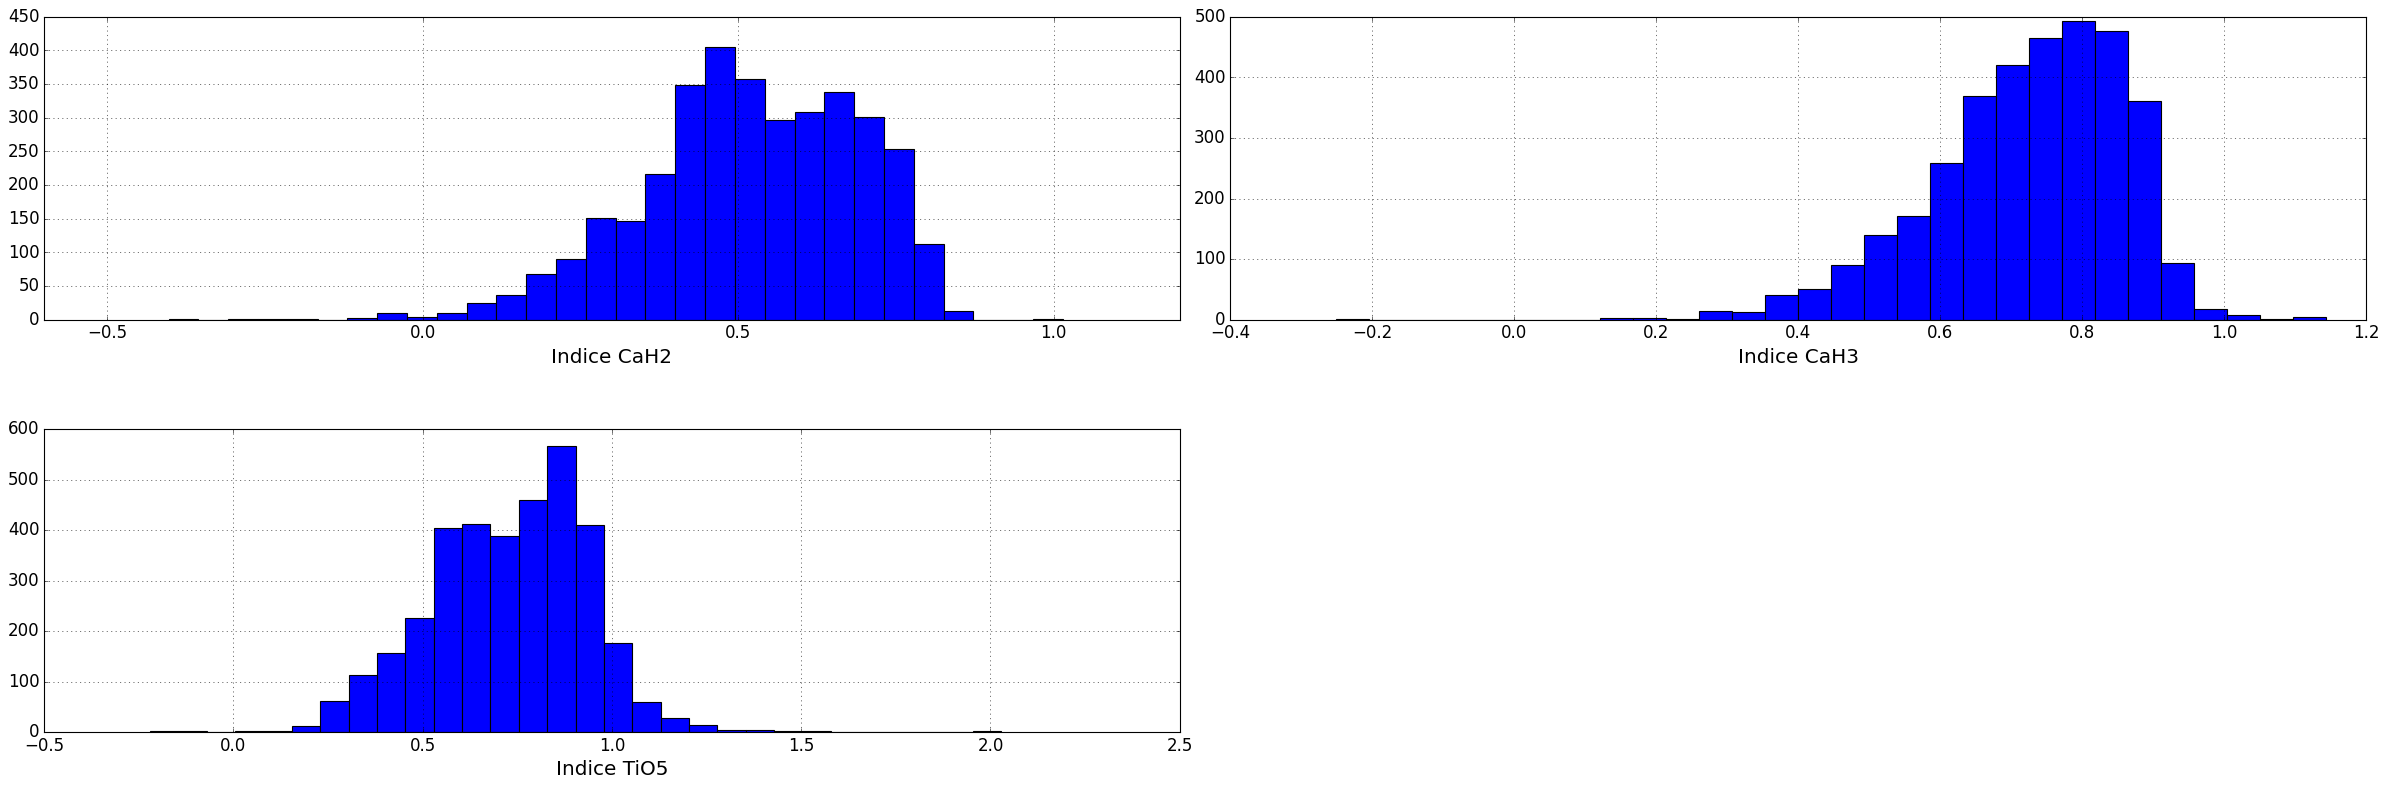

In [ ]:
plot_numericos(df_catalogo_BD, atrib_num, outliers=True, largo = 30, alto = 10, x_label =['Indice CaH2','Indice CaH3','Indice TiO5'])

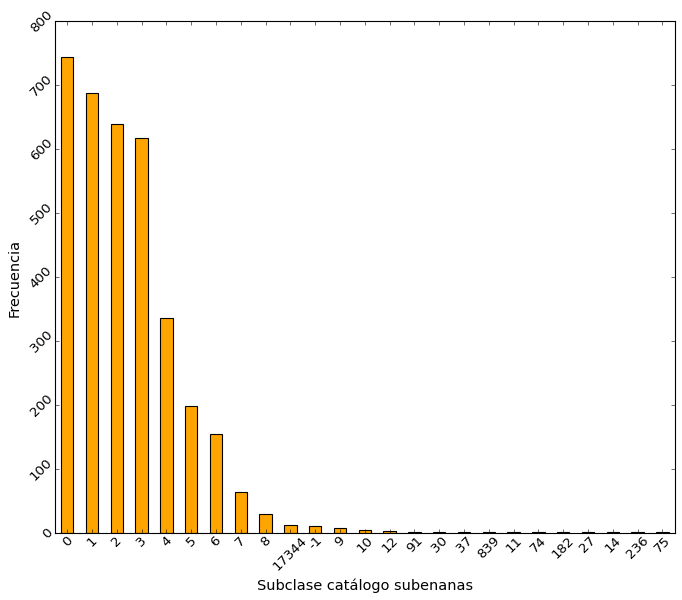

In [ ]:
atributo = 'SP'
plot_categoria(df_catalogo_BD, atributo, 'Subclase catálogo subenanas')

## Metadatos espectros subenanas SDSS. df_obj_espectros_raw

Creamos una clave principal

In [ ]:
df_obj_espectros_raw[['PLATE','MJD','FIBERID']] = df_obj_espectros_raw[['PLATE','MJD','FIBERID']].astype(int).astype(str)

In [ ]:
df_obj_espectros_raw[['PLATE-MJD-FIBER']] = df_obj_espectros_raw[['PLATE','MJD','FIBERID']].apply(lambda x: x[0]+'-'+x[1]+'-'+x[2],axis=1  )

In [ ]:
n_registros=5 #variable que nos indica el número de valores más repetidos a mostrar
atrib_num, atrib_nom = descripcionDatosDataset(df_obj_espectros_raw[['PLATE-MJD-FIBER', 'PLATEQUALITY', 'CLASS', 'SUBCLASS','Z','Z_ERR']],n_registros)

Cantidad de filas: 3496
Cantidad de columnas: 6
----------------------------------------------------------------------------------------------------
Columnas:  Index(['PLATE-MJD-FIBER', 'PLATEQUALITY', 'CLASS', 'SUBCLASS', 'Z', 'Z_ERR'], dtype='object')
----------------------------------------------------------------------------------------------------
Columna: PLATE-MJD-FIBER
Tipo de datos: nominal
Descripción de valores:
Número valores únicos: 3496
Cantidad de nulos: 0 = 0.00%
Distribucion valores más repetidos ( 5 primeros) :
 1476-52964-309    1
707-52177-523     1
1266-52709-53     1
1209-52674-66     1
1501-53740-359    1
Name: PLATE-MJD-FIBER, dtype: int64
----------------------------------------------------------------------------------------------------
Columna: PLATEQUALITY
Tipo de datos: nominal
Descripción de valores:
Número valores únicos: 3
Cantidad de nulos: 0 = 0.00%
Distribucion valores más repetidos ( 3 primeros) :
 good        2348
marginal    1034
bad          114
N

['Z', 'Z_ERR']
(2,)


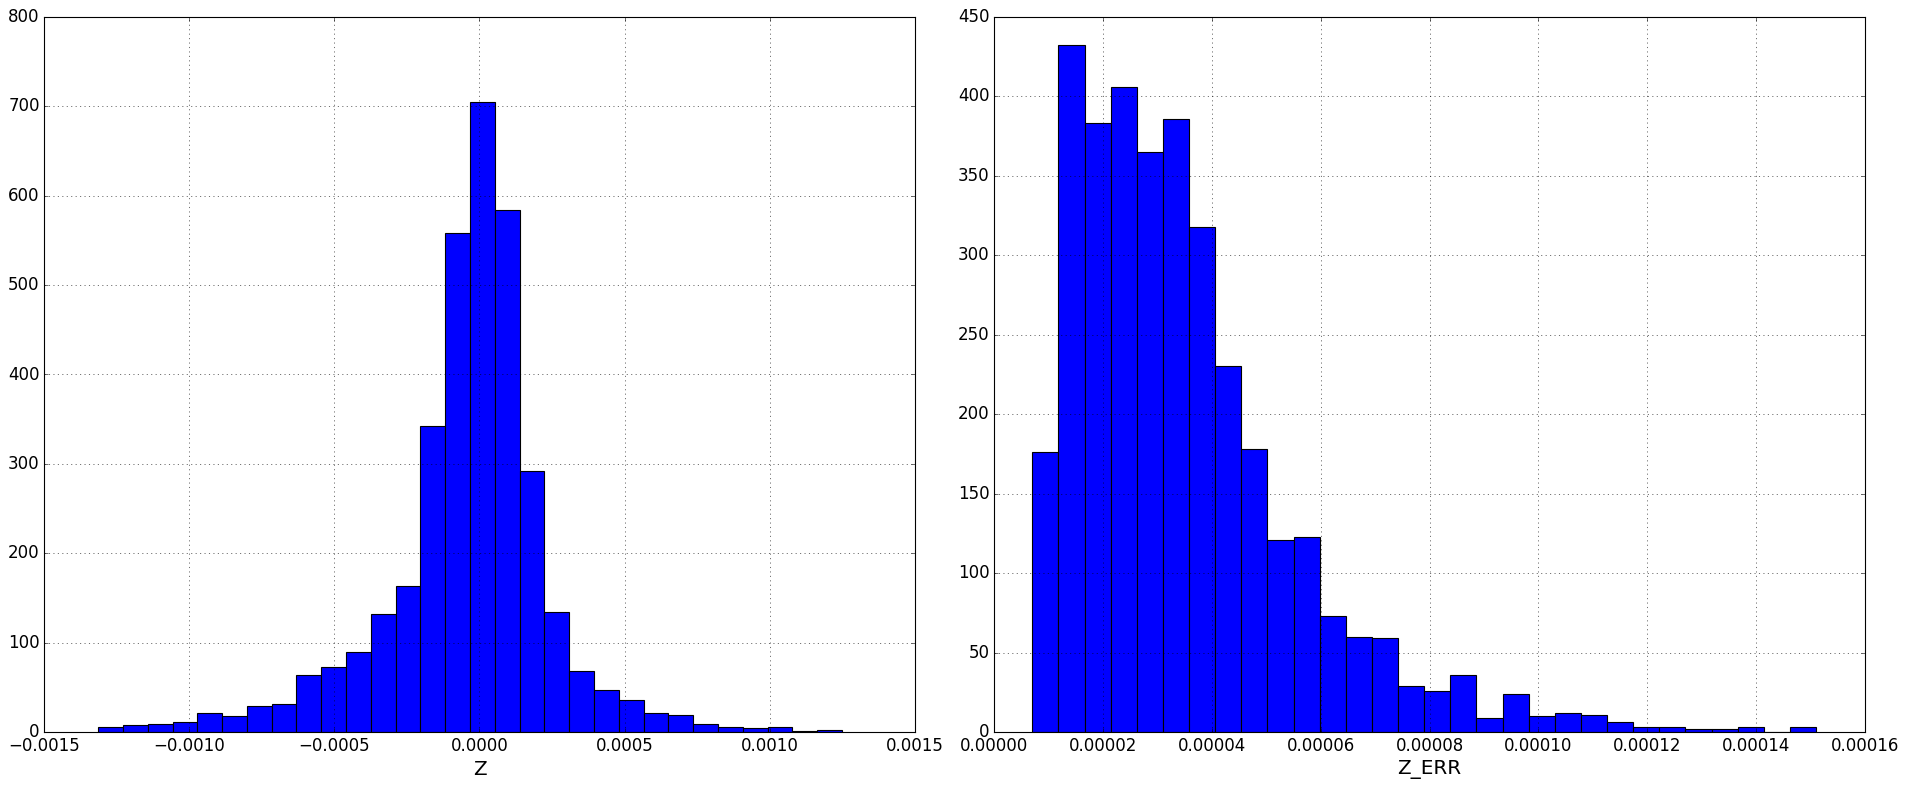

In [ ]:
plot_numericos(df_obj_espectros_raw, atrib_num, outliers=True, largo = 24, alto = 10, x_label =['Z', 'Z_ERR'])

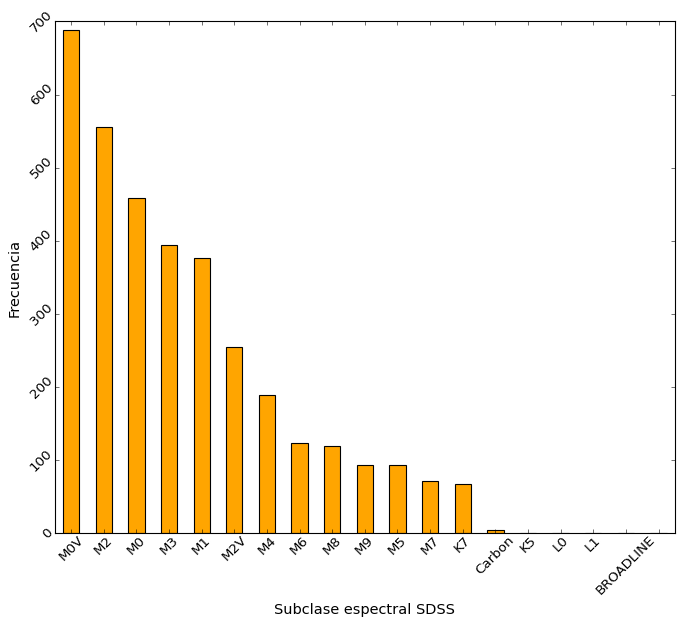

In [ ]:
plot_categoria(df_obj_espectros_raw, 'SUBCLASS', x_label = 'Subclase espectral SDSS')

### Revisión de los espectros

Revisamos primero longitudes de onda y los flujos. Dicha información se ha guardado como objeto lista dentro del dataframe.

In [ ]:
flujos = df_obj_espectros_raw['flujo']
flujos

0       [0.35031041500000004, -0.1485088319, 0.0116492...
1       [-0.6632891893, 2.39052701, -5.435426712, 1.57...
2       [-0.4185376167, 0.1414910257, -0.6999538541, 0...
3       [-0.5595631599, 1.6141862868999999, -0.4718873...
4       [-0.4254819751, 0.28042450550000003, 1.2131350...
                              ...                        
3491    [0.6488318443000001, 1.1210706234, 0.755453825...
3492    [3.8596711159, 2.1484868526, -2.7742624283, 0....
3493    [1.093152523, 1.5214309691999999, 2.8724341393...
3494    [-0.6275257468000001, -0.2927546501, -1.621553...
3495    [-0.6982907057000001, 1.2785845995, 0.89575284...
Name: flujo, Length: 3496, dtype: object

En principio no haremos nada ya que filtraremos para quitar ruido y normalizaremos

#### Longitudes de onda.

In [ ]:
longitudes_onda = df_obj_espectros_raw['long_A']
longitudes_onda

0       [3798.4, 3799.3, 3800.1, 3801.0, 3801.9, 3802....
1       [3815.0, 3815.9, 3816.8, 3817.7, 3818.6, 3819....
2       [3807.2, 3808.0, 3808.9, 3809.8, 3810.7, 3811....
3       [3808.0, 3808.9, 3809.8, 3810.7, 3811.5, 3812....
4       [3801.0, 3801.9, 3802.8, 3803.6, 3804.5, 3805....
                              ...                        
3491    [3803.6, 3804.5, 3805.4, 3806.3, 3807.2, 3808....
3492    [3805.4, 3806.3, 3807.2, 3808.0, 3808.9, 3809....
3493    [3812.4, 3813.3, 3814.2, 3815.0, 3815.9, 3816....
3494    [3823.0, 3823.8, 3824.7, 3825.6, 3826.5, 3827....
3495    [3815.9, 3816.8, 3817.7, 3818.6, 3819.4, 3820....
Name: long_A, Length: 3496, dtype: object

El primer detalle que observamos es que para espectro los flujos corresponden a frecuencias distintas.

Analizamos los las longitudes de onda para cada espectro

In [ ]:
n_long_onda = np.asarray([len(x) for x in longitudes_onda])
print(f'numero máximo de longitudes de onda contenidas en un espectro {n_long_onda.max()}, numero mínimo {n_long_onda.min()}')

numero máximo de longitudes de onda contenidas en un espectro 3860, numero mínimo 3094


Vemos que no coinciden el número de longitudes de onda que contiene cada espectro

Analicemos un espectro cualquiera para ver la separación entre las longitudes de onda.

In [ ]:
lenth_w = [np.asarray(x) for x in longitudes_onda]
separacion =np.empty([1,2])

for lo in lenth_w:
  lw_shift= lo[1:]
  lw = lo[:-1]
  lw_shift-lw
  separacion = np.concatenate([separacion, np.asarray([(lw_shift-lw).min(),(lw_shift-lw).max()]).reshape(-1,2)], axis=0)
separacion.shape

(3497, 2)

In [ ]:
print(f"máxima separación entre longitudes {separacion[:,1].max()}, mínima separación {separacion[:,0].min()}")

máxima separación entre longitudes 8.0, mínima separación 0.7999999999997272


Podemos observar que conforme aumenta la longitud de onda aumenta la separación entre longitudes de onda (REVISAR RESOLUCION DEL ESPECTRO)

In [ ]:
lw_shift-lw

array([0.9, 0.9, 0.9, ..., 2.1, 2.2, 2.1])

Respecto a los rangos tenemos:


In [ ]:
rangos = np.asarray([np.asarray([min(x), max(x)]) for x in longitudes_onda])
rangos.shape

(3496, 2)

In [ ]:
print(f" menor longitud de onda  inferior {rangos[:,0].min()}, mayor longitud de onda inferior {rangos[:,0].max()},\
      menor  superior {rangos[:,1].min()}, mayor  superior {rangos[:,1].max()}")

 menor longitud de onda  inferior 3783.6, mayor longitud de onda inferior 4507.1,      menor  superior 8100.3, mayor  superior 9255.5


Habíamos visto que las plantillas van desde los 5000 Armstrong hasta las 8500. Luego tenemos espectros que no cubren ese rango por las altas longitudes de onda.

Añadimos la longitud de onda máxima al dataset.

In [ ]:
df_longitudes_onda=df_obj_espectros_raw[['long_A']]

In [ ]:
df_longitudes_onda['max_long_A']=df_longitudes_onda['long_A'].apply(lambda x: max(list(x)))
df_longitudes_onda.columns

Index(['long_A', 'max_long_A'], dtype='object')

In [ ]:
df_obj_espectros_raw['max_long_A']= df_longitudes_onda.max_long_A

In [ ]:
df_obj_espectros_raw.head(3)

,nom_fichero_fit,flujo,long_A,PLATE,MJD,FIBERID,SPECOBJID,Z,PLATEQUALITY,CLASS,SUBCLASS,Z_ERR,PLATE-MJD-FIBER,max_long_A
0,spec-1941-53386-0433.fits,"[0.35031041500000004, -0.1485088319, 0.0116492...","[3798.4, 3799.3, 3800.1, 3801.0, 3801.9, 3802....",1941,53386,433,2185490798122919936,-0.000109,good,STAR,M2,0.000028,1941-53386-433,9210.9
1,spec-1808-54176-0058.fits,"[-0.6632891893, 2.39052701, -5.435426712, 1.57...","[3815.0, 3815.9, 3816.8, 3817.7, 3818.6, 3819....",1808,54176,58,2035643044551747584,-0.000234,good,STAR,M2V,0.000016,1808-54176-58,9204.5
2,spec-1970-53386-0009.fits,"[-0.4185376167, 0.1414910257, -0.6999538541, 0...","[3807.2, 3808.0, 3808.9, 3809.8, 3810.7, 3811....",1970,53386,9,2218025347188811776,-0.000053,good,STAR,M6,0.000030,1970-53386-9,9187.6


#### Revisión flujos

In [ ]:
flujos = df_obj_espectros_raw['flujo']
flujos

0       [0.35031041500000004, -0.1485088319, 0.0116492...
1       [-0.6632891893, 2.39052701, -5.435426712, 1.57...
2       [-0.4185376167, 0.1414910257, -0.6999538541, 0...
3       [-0.5595631599, 1.6141862868999999, -0.4718873...
4       [-0.4254819751, 0.28042450550000003, 1.2131350...
                              ...                        
3491    [0.6488318443000001, 1.1210706234, 0.755453825...
3492    [3.8596711159, 2.1484868526, -2.7742624283, 0....
3493    [1.093152523, 1.5214309691999999, 2.8724341393...
3494    [-0.6275257468000001, -0.2927546501, -1.621553...
3495    [-0.6982907057000001, 1.2785845995, 0.89575284...
Name: flujo, Length: 3496, dtype: object

In [ ]:
type(flujos[0])

list

In [ ]:
rangos_flujos = np.asarray([np.asarray([min(x), max(x)]) for x in flujos])
rangos_flujos.shape

(3496, 2)

In [ ]:
print(f" menor flujo inferior{rangos_flujos[:,0].min()}, mayor flujo inferior {rangos_flujos[:,0].max()},\
      menor  superior {rangos_flujos[:,1].min()}, mayor superior {rangos_flujos[:,1].max()}")

 menor flujo inferior-202.4440155029, mayor flujo inferior 10.1373252869,      menor  superior 2.1977303028, mayor superior 643.0409545898


In [ ]:
flujos = reduce(lambda a, b: a+b, flujos)

In [ ]:

df_flujos = pd.DataFrame(data = flujos,columns=['flujos'])

In [ ]:
atrib_num, atrib_nom = descripcionDatosDataset(df_flujos)

Cantidad de filas: 1800000
Cantidad de columnas: 1
----------------------------------------------------------------------------------------------------
Columnas:  Index(['flujos'], dtype='object')
----------------------------------------------------------------------------------------------------
Columna: flujos
Tipo de datos: numérico
Descripción de valores:
min              -3.477676
max               4.730009
mean              1.000000
std               0.552735
median            0.934668
Primer cuartil    0.574097
Tercer cuartil    1.377267
Name: flujos, dtype: float64 

Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------


['flujos']
(1,)


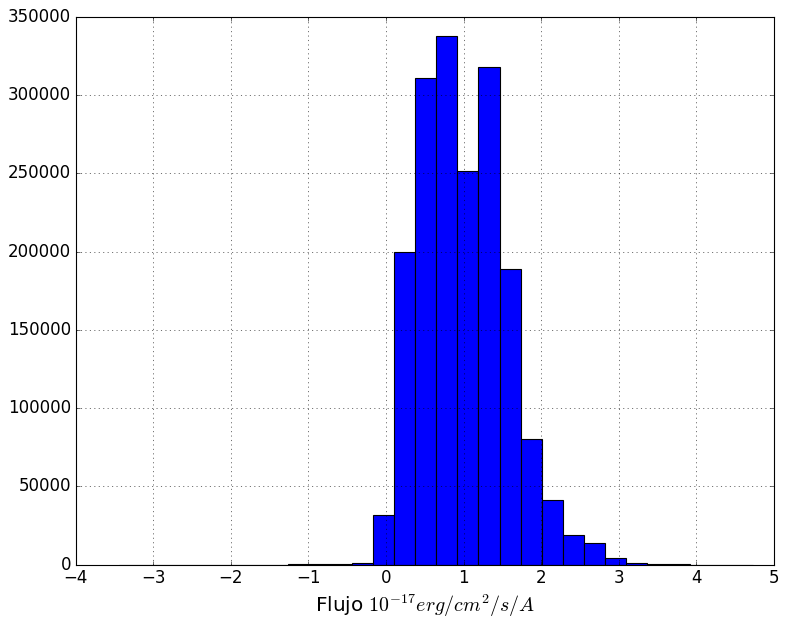

In [ ]:
plot_numericos(df_flujos, atrib_num, outliers=True, largo = 10, alto = 8, x_label =['Flujo $10^{-17} erg/cm^2/s/A$'])

## Metadatos plantillas. df_espec_plantillas

Revisamos los datos.

In [ ]:
df_espec_platillas.columns

Index(['flujo', 'long_A', 'clase_metalicidad'], dtype='object')

In [ ]:
descripcionDatosDataset(df_espec_platillas[['clase_metalicidad']],30)

Cantidad de filas: 30
Cantidad de columnas: 1
----------------------------------------------------------------------------------------------------
Columnas:  Index(['clase_metalicidad'], dtype='object')
----------------------------------------------------------------------------------------------------
Columna: clase_metalicidad
Tipo de datos: nominal
Descripción de valores:
Número valores únicos: 30
Cantidad de nulos: 0 = 0.00%
Distribucion valores más repetidos ( 30 primeros) :
 usdm3    1
esdm7    1
sdm8     1
esdm3    1
usdm7    1
sdm0     1
sdm5     1
usdm9    1
sdm2     1
sdm1     1
sdm9     1
usdm5    1
sdm3     1
sdm6     1
usdm2    1
usdm4    1
esdm2    1
sdm7     1
esdm0    1
esdm1    1
usdm6    1
esdm4    1
sdm4     1
esdm5    1
usdm8    1
usdm0    1
usdm1    1
esdm8    1
esdm6    1
esdm9    1
Name: clase_metalicidad, dtype: int64
----------------------------------------------------------------------------------------------------


([], ['clase_metalicidad'])

Hay una tupla por cada clase de metalicidad

In [ ]:
print(f"clases de metalicidad {df_espec_platillas.clase_metalicidad.unique()}")

clases de metalicidad ['usdm0' 'usdm1' 'usdm2' 'usdm3' 'usdm4' 'usdm5' 'usdm6' 'usdm7' 'usdm8'
 'usdm9' 'esdm0' 'esdm1' 'esdm2' 'esdm3' 'esdm4' 'esdm5' 'esdm6' 'esdm7'
 'esdm8' 'esdm9' 'sdm0' 'sdm1' 'sdm2' 'sdm3' 'sdm4' 'sdm5' 'sdm6' 'sdm7'
 'sdm8' 'sdm9']


### Revisión de los espectros de las plantillas

Revisamos primero longitudes de onda y los flujos. Dicha información se ha guardado como objeto lista dentro del dataframe.

In [ ]:
longitudes_onda = df_espec_platillas['long_A']
longitudes_onda

0     [5000.0, 5000.0581054688, 5000.1166992188, 500...
1     [5000.0, 5000.0581054688, 5000.1166992188, 500...
2     [5000.0, 5000.0581054688, 5000.1166992188, 500...
3     [5000.0, 5000.0581054688, 5000.1166992188, 500...
4     [5000.0, 5000.0581054688, 5000.1166992188, 500...
5     [5000.0, 5000.0581054688, 5000.1166992188, 500...
6     [5000.0, 5000.0581054688, 5000.1166992188, 500...
7     [5000.0, 5000.0581054688, 5000.1166992188, 500...
8     [5000.0, 5000.0581054688, 5000.1166992188, 500...
9     [5000.0, 5000.0581054688, 5000.1166992188, 500...
10    [5000.0, 5000.0581054688, 5000.1166992188, 500...
11    [5000.0, 5000.0581054688, 5000.1166992188, 500...
12    [5000.0, 5000.0581054688, 5000.1166992188, 500...
13    [5000.0, 5000.0581054688, 5000.1166992188, 500...
14    [5000.0, 5000.0581054688, 5000.1166992188, 500...
15    [5000.0, 5000.0581054688, 5000.1166992188, 500...
16    [5000.0, 5000.0581054688, 5000.1166992188, 500...
17    [5000.0, 5000.0581054688, 5000.1166992188,

La base de longitudes de onda es la misma para todas las plantillas.

Analizamos los las longitudes de onda

In [ ]:
n_long_onda = np.asarray([len(x) for x in longitudes_onda])
print(f'numero máximo de longitudes de onda contenidas en un espectro {n_long_onda.max()}, numero mínimo {n_long_onda.min()}')

numero máximo de longitudes de onda contenidas en un espectro 60000, numero mínimo 60000


Verificamos cuál es la longitud del intervalo entre longitudes de onda.

In [ ]:
lenth_w = np.asarray([np.asarray(x) for x in longitudes_onda])
separacion = []

for lo in lenth_w:
  lw_shift= lo[1:]
  lw = lo[:-1]
  separacion.append(lw_shift-lw)
separacion = np.asarray(separacion).ravel()
separacion.shape

(1799970,)

In [ ]:
print(f"maxima separación {max(separacion)}, mínima separación {min(separacion)}")

maxima separación 0.05859375, mínima separación 0.0576171875


La separación entre la longitudes de onda practicamente es la misma. 

Respecto a los rangos tenemos:


In [ ]:
rangos = np.asarray([np.asarray([min(x), max(x)]) for x in longitudes_onda])
rangos.shape

(30, 2)

In [ ]:
print(f" menor longitud de onda  inferior {rangos[:,0].min()}, mayor longitud de onda inferior {rangos[:,0].max()},\
      menor  superior {rangos[:,1].min()}, mayor  superior {rangos[:,1].max()}")

 menor longitud de onda  inferior 5000.0, mayor longitud de onda inferior 5000.0,      menor  superior 8499.8828125, mayor  superior 8499.8828125


los rangos de longitudes de onda son los mismos y van desde los 5000 Armstrong hasta las 8499.88. 

##### Revisión flujos

In [ ]:
flujos = df_espec_platillas['flujo']
flujos

0     [0.3998440802, 0.3969808519, 0.3941309154, 0.3...
1     [0.3611840904, 0.3597990274, 0.3584717214, 0.3...
2     [0.3468220234, 0.3459565341, 0.3451767564, 0.3...
3     [0.3326164484, 0.3334602714, 0.3342262506, 0.3...
4     [0.2566303313, 0.2506335974, 0.244899198400000...
5     [0.27648752930000003, 0.278170079, 0.280117690...
6     [0.2835782766, 0.2850551009, 0.28632617, 0.287...
7     [0.1269703656, 0.1223803312, 0.118335038400000...
8     [0.0651824921, 0.0654907376, 0.0657525063, 0.0...
9     [-0.0433673523, -0.0347368494, -0.0256114528, ...
10    [0.4231421053, 0.4214060307, 0.4194532335, 0.4...
11    [0.3599558473, 0.357961297, 0.3559896052, 0.35...
12    [0.34615087510000003, 0.344283402, 0.342443198...
13    [0.312651962, 0.3131365776, 0.3137286305, 0.31...
14    [0.2640294731, 0.2635650039, 0.263253301400000...
15    [0.24482573570000002, 0.2446406335, 0.24433082...
16    [0.18957602980000002, 0.1917598695, 0.19364845...
17    [0.2064069957, 0.20552200080000002, 0.2042

In [ ]:
rangos_flujos = np.asarray([np.asarray([min(x), max(x)]) for x in flujos])
rangos_flujos.shape

(30, 2)

In [ ]:
print(f" menor flujo inferior{rangos_flujos[:,0].min()}, mayor flujo inferior {rangos_flujos[:,0].max()},\
      menor  superior {rangos_flujos[:,1].min()}, mayor superior {rangos_flujos[:,1].max()}")

 menor flujo inferior-3.4776761532, mayor flujo inferior 0.23170495030000002,      menor  superior 1.3176323175, mayor superior 4.7300086021


In [ ]:
flujos = list(np.asarray([np.asarray(x) for x in flujos]).ravel())
df_flujos = pd.DataFrame(data = flujos,columns=['flujos'])

In [ ]:
atrib_num, atrib_nom = descripcionDatosDataset(df_flujos)

Cantidad de filas: 1800000
Cantidad de columnas: 1
----------------------------------------------------------------------------------------------------
Columnas:  Index(['flujos'], dtype='object')
----------------------------------------------------------------------------------------------------
Columna: flujos
Tipo de datos: numérico
Descripción de valores:
min              -3.477676
max               4.730009
mean              1.000000
std               0.552735
median            0.934668
Primer cuartil    0.574097
Tercer cuartil    1.377267
Name: flujos, dtype: float64 

Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------


['flujos']
(1,)


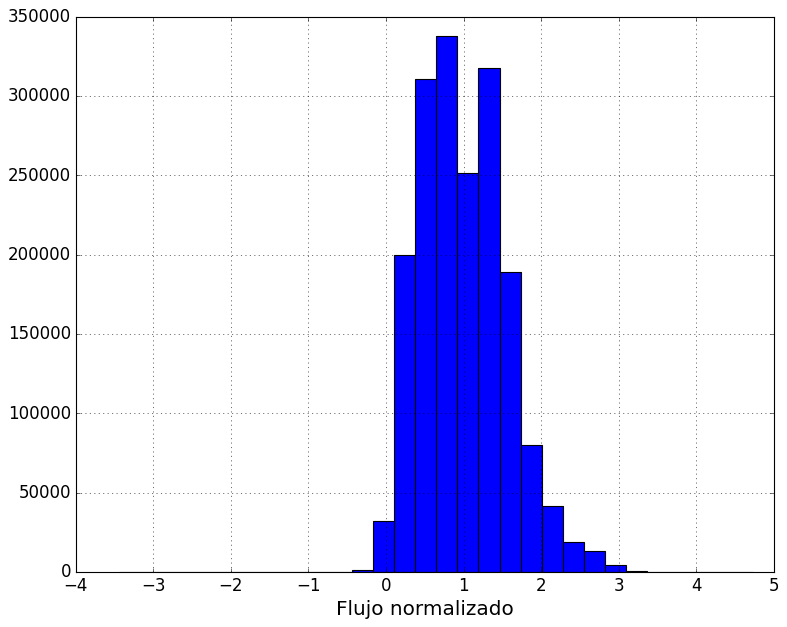

In [ ]:
plot_numericos(df_flujos, atrib_num, outliers=True, largo = 10, alto = 8, x_label =['Flujo normalizado'])

# Calidad de los datos

## Definición de funciones

Función que nos devuelve los outliers

In [ ]:
def dev_outliers(dataframe, n=3):
  '''
  param: dataframe. Dataframe con datos numéricos
  param: n: número de veces el rango intercuartilíco usado para considerar un valor outlier
  return: dos dicionarios uno con outliers para cada atributo y otro con los índices de outliers para el atributo.
  '''
  IQR = dataframe.quantile(0.75)- dataframe.quantile(0.25)
  dic_outliers_values={}
  dic_outliers_index={}
  for i in IQR.index:
    indices = (dataframe[i] < dataframe[i].quantile(0.25)-n*IQR[i]) | (dataframe[i]>dataframe[i].quantile(0.75)+n*IQR[i])
    dic_outliers_index[i]=indices
    dic_outliers_values[i]=dataframe[i][indices]
  return dic_outliers_index, dic_outliers_values


Definimos la función que nos devuelve valores fuera de rango.

In [ ]:
def out_rango(dataframe, inf, sup):
  '''
  param: dataframe. Dataframe con datos numéricos reales y continuos
  param: inf: lista con los valores inferiores del rango de cada atributo. misma dimensión que número de atributos
  param: sup: lista valores superiores del rango para cada atributo
  return: dos dicionarios uno con valore fuera de ranto para cada atributo y otro con los índices de valores fuera de rango.
  '''
  dic_outrang_values={}
  dic_outrang_index={}
  for j, i in enumerate(dataframe.columns):
    indices = (dataframe[i] <= inf[j]) | (dataframe[i]>=sup[j])
    dic_outrang_index[i]=indices
    dic_outrang_values[i]=dataframe[i][indices]
  return dic_outrang_index, dic_outrang_values


## Información fotométrica muestra enanas marrones baja metalicidad. **df_catalogo_BD**

Cuando revisamos los metadatos vimos que no había valores nulos. 

In [ ]:
'''
Cantidad de filas: 3517
Cantidad de columnas: 5
----------------------------------------------------------------------------------------------------
Columnas:  Index(['ID', 'PLATE-MJD-FIBER', 'CAH2', 'CAH3', 'TIO5'], dtype='object')
----------------------------------------------------------------------------------------------------
Columna: ID
Tipo de datos: nominal
Descripción de valores:
-- Numero valores unicos: 3491
-- Valores presentes (10 primeros): ['SDSS124626.9-023810.8', 'SDSS125438.5-012710.8', 'SDSS130232.5-032127.0', 'SDSS130813.4-030416.2', 'SDSS125541.7-023845.7', 'SDSS125637.1-022452.5', 'SDSS092745.2-003903.9', 'SDSS083632.5+514118.9', 'SDSS085051.7+565804.7', 'SDSS114739.1+023743.9']
-- Cantidad de nulos: 0 = 0.00%
-- Distribucion valores mas repetidos ( 3 primeros) :
 SDSS162754.2+003714.1    7
SDSS131022.3+005926.6    4
SDSS165547.9+363358.9    3
Name: ID, dtype: int64
----------------------------------------------------------------------------------------------------
Columna: PLATE-MJD-FIBER
Tipo de datos: nominal
Descripción de valores:
-- Numero valores unicos: 3504
-- Valores presentes (10 primeros): ['337-51997-312', '337-51997-601', '339-51692-215', '339-51692-64', '338-51694-271', '338-51694-277', '474-52000-99', '444-51883-81', '448-51900-375', '514-51994-599']
-- Cantidad de nulos: 0 = 0.00%
-- Distribucion valores mas repetidos ( 3 primeros) :
 364-52000-552     7
295-51985-334     4
2360-53728-233    2
Name: PLATE-MJD-FIBER, dtype: int64
----------------------------------------------------------------------------------------------------
Columna: CAH2
Tipo de datos: numérico
Descripción de valores:
min              -9999.000000
max                  4.440190
mean               -33.600588
std                583.180662
median               0.523946
Primer cuartil       0.415506
Tercer cuartil       0.654906
Name: CAH2, dtype: float64 

-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: CAH3
Tipo de datos: numérico
Descripción de valores:
min              -9999.000000
max                  7.432694
mean               -33.403239
std                583.192264
median               0.743214
Primer cuartil       0.640803
Tercer cuartil       0.825534
Name: CAH3, dtype: float64 

-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: TIO5
Tipo de datos: numérico
Descripción de valores:
min              -9999.000000
max                  2.561707
mean               -33.393418
std                583.192793
median               0.749024
Primer cuartil       0.586029
Tercer cuartil       0.881317
Name: TIO5, dtype: float64 

'''


"\nCantidad de filas: 3517\nCantidad de columnas: 5\n----------------------------------------------------------------------------------------------------\nColumnas:  Index(['ID', 'PLATE-MJD-FIBER', 'CAH2', 'CAH3', 'TIO5'], dtype='object')\n----------------------------------------------------------------------------------------------------\nColumna: ID\nTipo de datos: nominal\nDescripción de valores:\n-- Numero valores unicos: 3491\n-- Valores presentes (10 primeros): ['SDSS124626.9-023810.8', 'SDSS125438.5-012710.8', 'SDSS130232.5-032127.0', 'SDSS130813.4-030416.2', 'SDSS125541.7-023845.7', 'SDSS125637.1-022452.5', 'SDSS092745.2-003903.9', 'SDSS083632.5+514118.9', 'SDSS085051.7+565804.7', 'SDSS114739.1+023743.9']\n-- Cantidad de nulos: 0 = 0.00%\n-- Distribucion valores mas repetidos ( 3 primeros) :\n SDSS162754.2+003714.1    7\nSDSS131022.3+005926.6    4\nSDSS165547.9+363358.9    3\nName: ID, dtype: int64\n-------------------------------------------------------------------------------

Tenemos 3517 registros pero únicamente  3491 identificadores distintos, luego hay registros repetidos o mal identificados. 

Inspeccionamos el primero y vemos que el valor para los índices no es correcto ya que en todos los casos es -9999.

En el caso de **PLATE-MJD-FIBER** también hay valores repetidos. 
Tipo de datos: nominal
Descripción de valores:
-- Numero valores unicos: 3504

In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
df_catalogo_BD[df_catalogo_BD['ID']=='SDSS162754.2+003714.1'].head(2)

,ID,PLATE,MJD,FIBER,RA,DEC,U,Z,I,G,R,ERR_U,ERR_Z,ERR_I,ERR_G,ERR_R,EXTINCTION_U,EXTINCTION_Z,EXTINCTION_I,EXTINCTION_G,EXTINCTION_R,PMRA,PMDEC,PMRAERR,PMDECERR,CAH2,CAH3,TIO5,MATCH,DIST22,NFIT,SIGRA,SIGDEC,RV,ZETA,SP,MR,MI,MZ,D,ZGAL,UGAL,VGAL,WGAL,VTOTG,ACTIVITY,EWHA,EWHAERR,SNR,D_ERR,VTR,VTR_ERR,PLATE-MJD-FIBER
390,SDSS162754.2+003714.1,364,52000,552,246.975896,0.62058,23.278683,17.834692,18.384007,21.47131,19.4129,0.500898,0.027814,0.02274,0.042452,0.015731,0.481607,0.138176,0.194885,0.354362,0.257013,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,1.252793e-11,17344,13.065942,11.967113,11.630273,165.19208,101.745544,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,30.453032,-9999.0,-9999.0,364-52000-552
391,SDSS162754.2+003714.1,364,52000,552,246.975896,0.62058,23.278683,17.834692,18.384007,21.47131,19.4129,0.500898,0.027814,0.02274,0.042452,0.015731,0.481607,0.138176,0.194885,0.354362,0.257013,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,1.252793e-11,17344,13.065942,11.967113,11.630273,165.19208,101.745544,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,30.453032,-9999.0,-9999.0,364-52000-552


### Valores atípicos

In [ ]:
dic_indices, dic_valores = dev_outliers(df_catalogo_BD[['CAH2','CAH3','TIO5']])

In [ ]:
outliers=pd.Series([False]*df_catalogo_BD.shape[0])
for clave, valor in dic_indices.items():
  print(f"Número de outliers para el atributo {clave} {np.asarray(valor).sum()}")
  outliers = outliers | valor
print(f"Número de tuplas con algún outlier {outliers.sum()}")

Número de outliers para el atributo CAH2 20
Número de outliers para el atributo CAH3 22
Número de outliers para el atributo TIO5 18
Número de tuplas con algún outlier 23


Creamos una columna para marcar los objetos con algún outlier.

In [ ]:
df_catalogo_BD['outlier_indices'] = outliers

### Valores fuera de rango

Primeramente veremos los valores nominales fuera de rango. En los metadatos tenemos valores de la clase espectral que no se encuentran entre 0 y 9.

In [ ]:
sub_esp_out_rango = ~(df_catalogo_BD['SP'].isin(['0','1','2','3','4','5','6','7','8','9']))
print(f"subclase espectral fuera de rango {sub_esp_out_rango.sum()}")

subclase espectral fuera de rango 41


Respecto a los valores numéricos tenemos

In [ ]:
dic_indices, dic_valores = out_rango(df_catalogo_BD[['CAH2','CAH3','TIO5']],[0,0,0],[1,1,1])

Añadimos al diccionario de índices los indices de no cumplen la regla de valores para SP

In [ ]:
dic_indices['SP']=sub_esp_out_rango

In [ ]:
outrango=pd.Series([False]*df_catalogo_BD.shape[0])
for clave, valor in dic_indices.items():
  print(f"Número de valores fuera de rango para el atributo {clave} {np.asarray(valor).sum()}")
  outrango = outrango | valor
print(f"Número de tuplas con algún valor fuera de rango {outrango.sum()}")

Número de valores fuera de rango para el atributo CAH2 38
Número de valores fuera de rango para el atributo CAH3 36
Número de valores fuera de rango para el atributo TIO5 230
Número de valores fuera de rango para el atributo SP 41
Número de tuplas con algún valor fuera de rango 269


In [ ]:
df_catalogo_BD[['CAH2','CAH3','TIO5']][outrango]

,CAH2,CAH3,TIO5
5,0.080777,-0.251061,0.927790
15,-0.035379,0.510284,0.288668
21,0.477078,0.740697,1.029149
25,0.381605,0.510087,1.019519
33,0.656734,0.806623,1.028061
...,...,...,...
3441,0.573583,0.715177,1.010654
3457,0.314302,0.459833,1.024567
3507,0.858649,0.926719,0.961122
3508,0.773227,0.898479,1.103792


In [ ]:
df_catalogo_BD['outrango_indices'] = outrango

## df_obj_espectros_raw

### Calidad placas

In [ ]:
'''
Columna: PLATEQUALITY
Tipo de datos: nominal
Descripción de valores:
-- Numero valores unicos: 3
-- Valores presentes (10 primeros): ['good', 'marginal', 'bad']
-- Cantidad de nulos: 0 = 0.00%
-- Distribucion valores mas repetidos ( 3 primeros) :
 good        2348
marginal    1034
bad          114
Name: PLATEQUALITY, dtype: int64
'''

"\nColumna: PLATEQUALITY\nTipo de datos: nominal\nDescripción de valores:\n-- Numero valores unicos: 3\n-- Valores presentes (10 primeros): ['good', 'marginal', 'bad']\n-- Cantidad de nulos: 0 = 0.00%\n-- Distribucion valores mas repetidos ( 3 primeros) :\n good        2348\nmarginal    1034\nbad          114\nName: PLATEQUALITY, dtype: int64\n"

Vemos hay 114 placas con mala calidad.

### Longitudes de onda. 

En principio pediremos que las longitudes de onda lleguen hasta los 900 nm. Las plantillas llegan hasta los 8500 luego de esta manera garantizamos que cubrimos el rango de estás. Llegamos hasta los 9000 ya que a alta longitudes de onda se puede encontrar información relevante respecto a la temperatura. 

In [ ]:
print(f"número de espectros con rango inferior a los 9000 A {(df_obj_espectros_raw['max_long_A']<9000).sum()}")

número de espectros con rango inferior a los 9000 A 6


### Rangos de los flujos.

Hemos visto que teníamos flujos negativos. Esto no es posible ya que el flujo mínimo es cero. Aceptaremos los valores negativos ya que se achacan al ruido. Estos debido a la baja temperatura de los objetos se da en las longitudes de onda menores ya que es donde las enanas emiten menor energía. 

### Valores faltantes o nulos en longitudes de onda y flujos.

Ya vimos que la diferencia máxima entre longitudes de onda consecutivas es de 2 A.. Luego no longitudes de onda faltantes.

Comprobamos si para cada espectro el número de datos de los flujos y el de longitudes de onda es el mismo. 

In [ ]:
dif_long_flujos = df_obj_espectros_raw[['long_A','flujo']].apply(lambda x: len(x[1])-len(x[0]),axis = 1)


In [ ]:
dif_long_flujos.max()

0

Vemos que no hay problemas

Veamos valores nulos de las longitudes de onda y flujos. Como el número de longitudes de onda cambia de un espectro a otro tendremos que revisar objeto por objeto.

In [ ]:
nulos_espectros = df_obj_espectros_raw['flujo'].apply(lambda x: np.isnan(x).any())
nulos_espectros.sum()

0

In [ ]:
nulos_longitudes = df_obj_espectros_raw['long_A'].apply(lambda x: np.isnan(x).any())
nulos_longitudes.sum()

0

Vemos que no hay valores nulos

Sin embargo hay espectros con datos extrapolados. 

In [ ]:
#504506269357336576
objeto = df_obj_espectros_raw[['flujo','long_A']][df_obj_espectros_raw['SPECOBJID']==504506269357336576]
objeto

,flujo,long_A
3152,"[-1.6008164883, -1.7773344517, -1.216822505, 2...","[3818.6, 3819.4, 3820.3, 3821.2, 3822.1, 3823...."


Text(0, 0.5, 'Flujo $10^{-17} erg/cm^2/s/A$')

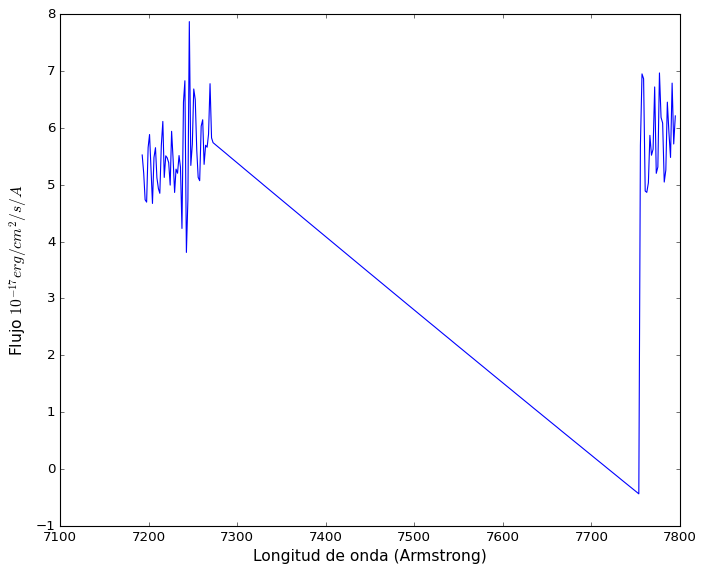

In [ ]:

fig = plt.figure(figsize = (10,8))
x = np.asarray(objeto.iloc[0]['long_A'])[2750:3100]
y = np.asarray(objeto.iloc[0]['flujo'])[2750:3100]
ax=plt.gca()
plt.plot(x,y)
ax.tick_params(labelsize=12)
fig.patch.set_facecolor('white')
#plt.xticks(size=12)
#plt.yticks(size=12)
plt.xlabel('Longitud de onda (Armstrong)', size=14)
plt.ylabel('Flujo $10^{-17} erg/cm^2/s/A$', size=14)


#### Búsqueda de datos extrapolados

Definimos una función par ver si hay extrapolaciones. Lo que hará la función es ver las pendientes entre intervalos consecutivos es la misma. 

In [ ]:
def es_extrapolado(espectro, long_onda, precision, salto, secuencia):
  """
  Muestrea el espectro y calcula  pendiente del espectro entre los puntos
  cuando la pendiente no cambia en número determinado de muestreos devuelve True

  :param : espectro. espectro[0] lista con los flujos, espectro[1] lista con las longitudes de onda
  :param : long_onda. Lista de dos elementos. Rango de  longitudes de onda donde se evaluará si hay interpolación
  :param : precision. Rango de precisión para considerar que dos pendientes son iguales
  :param: salto: número de longitudes de onda usadas para calcular la pendiente.
  :param: secuencia número de veces consecutivas que exigiremos que las pendientes sean iguales para marcar que el espectro es extrapolado.
          
  :Return: booleano. True si el espectro ha sido extrapolado, False si no
           
  """
  cuenta = 0
  pendiente=0
  long =  np.asarray(espectro[1])
  flujos= np.asarray(espectro[0])
  #seleccionamos los índices que cumplan
  indices = np.where((long>long_onda[0])&(long<long_onda[1]))
  #muestreamos
  flujos= flujos[indices][::salto]
  long =  long[indices][::salto]
  #print(flujos)
  #print(long,'\n')
  dif_flujos = flujos[1:] - flujos[:-1]
  dif_long = long[1:] - long[:-1]
  pendientes = dif_flujos/dif_long


  for i, elem in enumerate(pendientes):
    if np.abs(elem-pendiente)<=precision:
      cuenta+=1
      if cuenta ==secuencia:
        return True
        break
    else:
      cuenta = 0
    pendiente =elem
  return False



Solo miraremos si hay extrapolación en el rango 5000-8500 Armstrong. 

In [ ]:
lista_extrapolado = df_obj_espectros_raw[['flujo','long_A']].apply(es_extrapolado,long_onda=[5000,9000],precision=0.0001,salto = 5,\
                                                                secuencia =6,axis=1)

In [ ]:
lista_extrapolado.sum()

158

Añadimos una columna al dataset con la información de si el expectro ha sido extrapolado

In [ ]:
df_obj_espectros_raw['extrapolado']=lista_extrapolado

Inspeccionamos los expectros extrapolados

In [ ]:
df_extrapolado = df_obj_espectros_raw[['flujo','long_A']][lista_extrapolado].reset_index(drop=True)
df_extrapolado.shape

(158, 2)

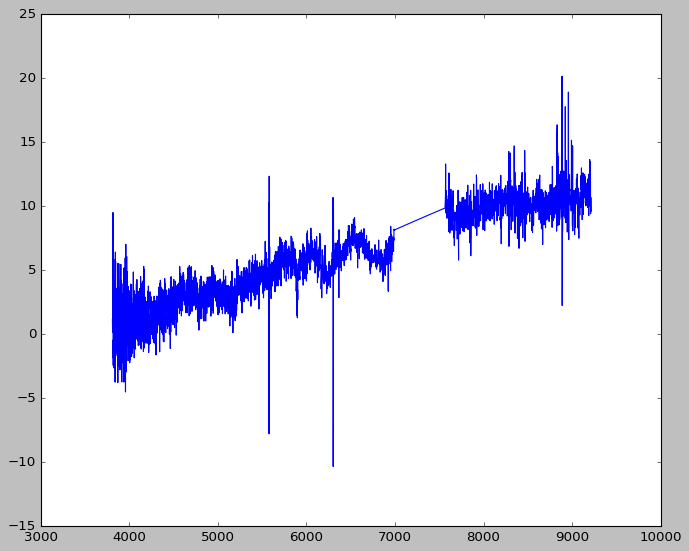

In [ ]:
indice =100
plt.figure(figsize = (10,8))
x = np.asarray(df_extrapolado.loc[indice]['long_A'])
y = np.asarray(df_extrapolado.loc[indice]['flujo'])

plt.plot(x,y)

Vemos así como nos cada la distribución por subclase si quitamos los espectros extrapolados

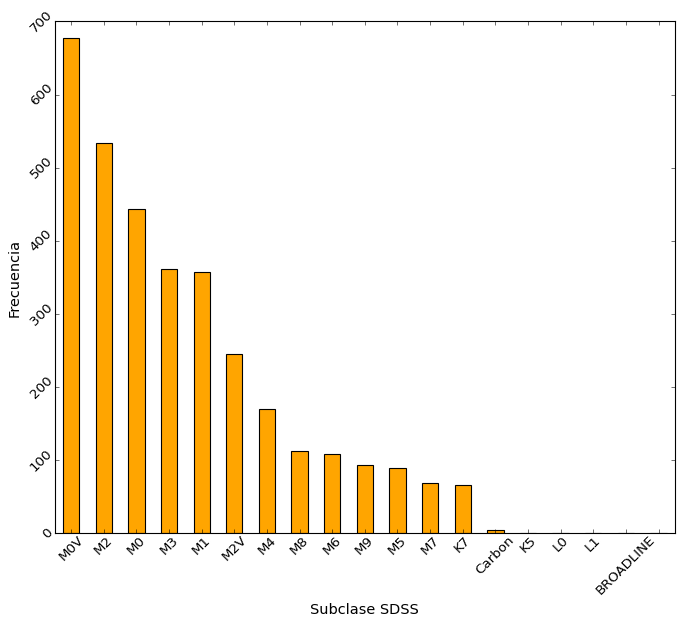

In [ ]:
plot_categoria(df_obj_espectros_raw[~lista_extrapolado], 'SUBCLASS',x_label = 'Subclase SDSS')

Vemos que aún tenemos representación de todas las clases

### Valores atípicos

In [ ]:
dic_indices, dic_valores = dev_outliers(df_obj_espectros_raw[[ 'Z', 'Z_ERR']])

In [ ]:
outliers=pd.Series([False]*df_obj_espectros_raw.shape[0])
for clave, valor in dic_indices.items():
  print(f"Número de outliers para el atributo {clave} {np.asarray(valor).sum()}")
  outliers = outliers | valor
print(f"Número de tuplas con algún outlier {outliers.sum()}")

Número de outliers para el atributo Z 81
Número de outliers para el atributo Z_ERR 25
Número de tuplas con algún outlier 104


Creamos una columna para marcar los objetos con algún outlier.

In [ ]:
df_obj_espectros_raw['outlier_info'] = outliers

### Valores fuera de rango

In [ ]:
inf = [-0.002,0]
sup = [0.002,np.inf]

dic_indices, dic_valores = out_rango(df_obj_espectros_raw[[ 'Z', 'Z_ERR']],inf,sup)

También veremos valores fuera de rango en las subclases

In [ ]:
sub_esp_clase_out_rango = ~('M' in df_obj_espectros_raw['SUBCLASS'])

In [ ]:
sub_esp_clase_out_rango = ~ df_obj_espectros_raw['SUBCLASS'].apply(lambda x: 'M' in x)

In [ ]:

print(f"subclase espectral fuera de rango {sub_esp_clase_out_rango.sum()}")

subclase espectral fuera de rango 77


In [ ]:
dic_indices['SUBCLASS']=sub_esp_clase_out_rango

In [ ]:
outrango=pd.Series([False]*df_obj_espectros_raw.shape[0])
for clave, valor in dic_indices.items():
  print(f"Número de valores fuera de rango para el atributo {clave} {np.asarray(valor).sum()}")
  outrango = outrango | valor
print(f"Número de tuplas con algún valor fuera de rango {outrango.sum()}")

Número de valores fuera de rango para el atributo Z 3
Número de valores fuera de rango para el atributo Z_ERR 1
Número de valores fuera de rango para el atributo SUBCLASS 77
Número de tuplas con algún valor fuera de rango 79


In [ ]:
  df_obj_espectros_raw['outrango_info'] = outrango

## **Claves principales.**

### df_catalogo_DB

Ya habíamos visto que teníamos claves repetidas. Teníamos 3491 claves únicas.

### df_obj_espectros_raw

Habíamos visto que no había problemas con la clave principal. Número valores únicos: 3504.

Vemos que no hay problema de claves principales

## Claves foraneas, integridad referencial. 

Como tenemos que integrar los ficheros analicemos si tenemos algún problema con las claves foraneas.

In [ ]:
print(f" filas sin problemas de clave foranea {df_obj_espectros_raw.merge(df_catalogo_BD.drop_duplicates(subset= ['PLATE-MJD-FIBER'] ), how = 'inner', on = 'PLATE-MJD-FIBER').shape[0]}")

 filas sin problemas de clave foranea 3496


In [ ]:
df_obj_espectros_raw.columns

Index(['nom_fichero_fit', 'flujo', 'long_A', 'PLATE', 'MJD', 'FIBERID',
       'SPECOBJID', 'Z', 'PLATEQUALITY', 'CLASS', 'SUBCLASS', 'Z_ERR',
       'PLATE-MJD-FIBER', 'max_long_A', 'extrapolado', 'outlier_info',
       'outrango_info'],
      dtype='object')

Veamos que pasa si integramos por 'PLATE-MJD-FIBER' los dataset df_info_espectros y df_catalogo_BD.
Habíamos visto que teníamos en el primero 3496 claves foraneas únicas mientras que en el segundo 3504. No hay problemas de claves foraneas

Antes de integrar cambiaremos el nombre de las columnas del dataset *df_info_espectros* debido a que tenemos atributos repetidos en *df_obj_espectros_raw*

In [ ]:
lista_espec  = ['PLATE-MJD-FIBER','flujo', 'long_A', 'PLATEQUALITY', 'extrapolado','max_long_A','Z','Z_ERR', 'CLASS', 'SUBCLASS','outlier_info',
       'outrango_info']
df_info_espec = df_obj_espectros_raw[lista_espec]


In [ ]:
df_info_espec.columns

Index(['PLATE-MJD-FIBER', 'flujo', 'long_A', 'PLATEQUALITY', 'extrapolado',
       'max_long_A', 'Z', 'Z_ERR', 'CLASS', 'SUBCLASS', 'outlier_info',
       'outrango_info'],
      dtype='object')

# Limpieza de datos.

## df_catalogo_BD

Primero quitaremos los datos erroneos de los índices.

Primeramente quitaremos los outliers

In [ ]:
reg_eliminar = df_catalogo_BD.outlier_indices == True
print(f'registros a eliminar {reg_eliminar.sum()}')

registros a eliminar 23


In [ ]:
#Eliminamos los registros
print(f'antes de eliminar {df_catalogo_BD.shape[0]}')
df_catalogo_BD=df_catalogo_BD[~reg_eliminar]
print(f'después de eliminar {df_catalogo_BD.shape[0]}')


antes de eliminar 3517
después de eliminar 3494


Valores fuera de rangos.

In [ ]:
reg_eliminar = df_catalogo_BD.outrango_indices == True
print(f'registros a eliminar {reg_eliminar.sum()}')

registros a eliminar 246


In [ ]:
#Eliminamos los registros
print(f'antes de eliminar {df_catalogo_BD.shape[0]}')
df_catalogo_BD=df_catalogo_BD[~reg_eliminar]
print(f'después de eliminar {df_catalogo_BD.shape[0]}')


antes de eliminar 3494
después de eliminar 3248


Eliminamos los valores de 'PLATE-MJD-FIBER' duplicados.

In [ ]:
print(f'antes de eliminar duplicados {df_catalogo_BD.shape[0]}')
df_catalogo_BD.drop_duplicates(subset=['PLATE-MJD-FIBER' ],keep='first', inplace=True, ignore_index=True)
print(f'después de eliminar {df_catalogo_BD.shape[0]}')

antes de eliminar duplicados 3248
después de eliminar 3246


Revisamos los metadatos para comprobar que ya no tenemos problemas de duplicados.

In [ ]:
descripcionDatosDataset(df_catalogo_BD[['ID','PLATE-MJD-FIBER']],longitud =3)

Cantidad de filas: 3246
Cantidad de columnas: 2
----------------------------------------------------------------------------------------------------
Columnas:  Index(['ID', 'PLATE-MJD-FIBER'], dtype='object')
----------------------------------------------------------------------------------------------------
Columna: ID
Tipo de datos: nominal
Descripción de valores:
Número valores únicos: 3235
Cantidad de nulos: 0 = 0.00%
Distribucion valores más repetidos ( 3 primeros) :
 SDSS104648.6-001644.8    2
SDSS093424.8+534854.9    2
SDSS120426.9+132923.3    2
Name: ID, dtype: int64
----------------------------------------------------------------------------------------------------
Columna: PLATE-MJD-FIBER
Tipo de datos: nominal
Descripción de valores:
Número valores únicos: 3246
Cantidad de nulos: 0 = 0.00%
Distribucion valores más repetidos ( 3 primeros) :
 1476-52964-309    1
2401-53768-487    1
1887-53239-485    1
Name: PLATE-MJD-FIBER, dtype: int64
----------------------------------------

([], ['ID', 'PLATE-MJD-FIBER'])

## df_info_espec. Data set con la información relevante de df_obj_espec_raw

### Corrimiento al rojo

Para el corrimiento al rojo teníamos para z un máximo de 0.4

Un redshift tan alto como 0.49 no tiene ningún sentido. Comprobamos de que objeto se trata.
(COMPROBAR RANGOS Z)

In [ ]:
df_info_espec[['CLASS', 'SUBCLASS']][df_info_espec['Z']>0.01]

,CLASS,SUBCLASS
360,QSO,BROADLINE


Vemos que un Cuasar. No lo eliminamos

### Longitudes de onda fuera de rango.

In [ ]:
long_outrango = df_info_espec.max_long_A<9000
long_outrango.sum()

6

In [ ]:
print(f"objetos antes de eliminación {df_info_espec.shape[0]}")
df_info_espec = df_info_espec[ ~long_outrango]
print(f"objetos después de eliminación {df_info_espec.shape[0]}")

objetos antes de eliminación 3496
objetos después de eliminación 3490


### Calidad placas

Veamos cuántos espectros teníamos con mala calidad. 

In [ ]:
mala_calidad = (df_info_espec['PLATEQUALITY']=='bad')
print(f"Placas con calidad defectuosa {mala_calidad.sum()}")

Placas con calidad defectuosa 113


Las eliminamos

In [ ]:
print(f"objetos antes de eliminación {df_info_espec.shape[0]}")
df_info_espec = df_info_espec[~mala_calidad]
df_info_espec.shape[0]

objetos antes de eliminación 3490


3377

### Datos extrapolados.

Quitaremos también aquellos datos extrapolados

In [ ]:
index_extrapolado = df_info_espec.extrapolado==True
print(f"número de espectros estrapolados {index_extrapolado.sum()}")

número de espectros estrapolados 155


In [ ]:
print(f"objetos antes de eliminación {df_info_espec.shape[0]}")
df_info_espec = df_info_espec[ ~index_extrapolado]
print(f"objetos después de eliminación {df_info_espec.shape[0]}")

objetos antes de eliminación 3377
objetos después de eliminación 3222


### Datos sin subclase espectral.

Habíamos visto que teníamos un objeto del cual no disponíamos de la clase espectral. LO ELIMINAMOS.
Falta programarlo

In [ ]:
df_info_espec.SUBCLASS.unique()

array(['M2V', 'M6', 'M7', 'M8', 'M2', 'M9', 'M0V', 'M4', 'M3', 'M0', 'K7',
       'M1', 'M5', 'BROADLINE', 'Carbon', '', 'L0', 'K5', 'L1'],
      dtype=object)

In [ ]:
indices_sin_clase = df_info_espec.SUBCLASS==""
print(f'Número de espectros sin subclase {indices_sin_clase.sum()}')

Número de espectros sin subclase 1


In [ ]:
temp=df_info_espec.copy()

In [ ]:
temp.shape

(3222, 10)

In [ ]:
print(f'Número de objetos antes de eliminar {df_info_espec.shape[0]}')
df_info_espec = df_info_espec[~indices_sin_clase]
print(f'Número de objetos después de eliminar {df_info_espec.shape[0]}')

Número de objetos antes de eliminar 3222
Número de objetos después de eliminar 3221


### Datos fuera de rango y outliers

No haremos nada

#Integración espectros con datos fotométricos. df_info_espec y df_info_DB

In [ ]:
df_info_espec.shape

(3221, 10)


En df_info_espec tenemos 3221 objetos. En df_info_DB el número de registros es de 3235.

Revisamos la columnas antes de la integración

In [ ]:
df_info_espec.columns

Index(['PLATE-MJD-FIBER', 'flujo', 'long_A', 'PLATEQUALITY', 'extrapolado',
       'max_long_A', 'Z', 'Z_ERR', 'CLASS', 'SUBCLASS'],
      dtype='object')

In [ ]:
df_catalogo_BD.shape

(3235, 55)

In [ ]:
atributos_a_integrar = ['ID','SP','CAH2', 'CAH3', 'TIO5','PLATE-MJD-FIBER',\
                        'outlier_indices', 'outrango_indices' ]
df_info_obj_espec = df_info_espec.merge(df_catalogo_BD[atributos_a_integrar], how = 'inner', on = 'PLATE-MJD-FIBER')
print(f'número de registros {df_info_obj_espec.shape[0]}')
df_info_obj_espec.head(3)

número de registros 3012


,PLATE-MJD-FIBER,flujo,long_A,PLATEQUALITY,extrapolado,max_long_A,Z,Z_ERR,CLASS,SUBCLASS,outlier_info,outrango_info,ID,SP,CAH2,CAH3,TIO5,outlier_indices,outrango_indices
0,1808-54176-58,"[-0.6632891893, 2.39052701, -5.435426712, 1.57...","[3815.0, 3815.9, 3816.8, 3817.7, 3818.6, 3819....",good,False,9204.5,-0.000234,0.000016,STAR,M2V,False,False,SDSS140205.6+055010.3,4,0.399178,0.580422,0.715843,False,False
1,1970-53386-9,"[-0.4185376167, 0.1414910257, -0.6999538541, 0...","[3807.2, 3808.0, 3808.9, 3809.8, 3810.7, 3811....",good,False,9187.6,-0.000053,0.000030,STAR,M6,False,False,SDSS115532.8+394034.6,5,0.313654,0.561496,0.381925,False,False
2,1803-54152-200,"[-0.5595631599, 1.6141862868999999, -0.4718873...","[3808.0, 3808.9, 3809.8, 3810.7, 3811.5, 3812....",good,False,9185.4,0.000217,0.000035,STAR,M2V,False,False,SDSS134320.5+065520.6,7,0.274310,0.374130,0.570033,False,False


# Tratamiento de los datos

## Subclases espectrales.

Habíamos visto que en algunos casos además de la subclase espectral teníamos la clase de luminosidad. Como tenemos poca información de ella para pocos objetos no trataremos con ella. Debido a esto la eliminaremos. 

In [ ]:
temp = df_info_obj_espec.copy()

In [ ]:
df_info_obj_espec['SUBCLASS'] = df_info_obj_espec['SUBCLASS'].apply(lambda x: x[:2])

In [ ]:
df_info_obj_espec['SUBCLASS'].value_counts()

M0    987
M2    740
M1    336
M3    309
M4    148
M6    103
M8     98
M5     79
M9     78
M7     67
K7     60
Ca      4
BR      1
K5      1
L0      1
Name: SUBCLASS, dtype: int64

Creamos una columna para la subclase espectral asignada en el catálogo.

In [ ]:
df_info_obj_espec['subclass_c']=df_info_obj_espec['SP'].apply(lambda x: 'M'+x)

In [ ]:
df_info_obj_espec['subclass_c'].value_counts()

M0    610
M1    579
M2    555
M3    548
M4    307
M5    178
M6    145
M7     58
M8     28
M9      4
Name: subclass_c, dtype: int64

Comparamos ambas 

In [ ]:
frecuencias = pd.crosstab(df_info_obj_espec['SUBCLASS'], df_info_obj_espec['subclass_c']) 
frecuencias

subclass_c,M0,M1,M2,M3,M4,M5,M6,M7,M8,M9
SUBCLASS,,,,,,,,,,
BR,0,0,0,0,0,1,0,0,0,0
Ca,4,0,0,0,0,0,0,0,0,0
K5,1,0,0,0,0,0,0,0,0,0
K7,57,3,0,0,0,0,0,0,0,0
L0,0,0,0,0,0,0,1,0,0,0
M0,404,295,138,88,36,15,10,1,0,0
M1,85,122,105,21,3,0,0,0,0,0
M2,44,89,186,242,100,42,24,7,5,1
M3,12,45,82,110,49,9,2,0,0,0


## Cálculo de la clase de metalicidad de la muestra de subenanas.

Para clasificar por metalicidad haremos uso de los los índices espectrales para  el TiO5, CaH2 y CaH3 de la muestra de Sacheva et al. 2014 basándonos en los indicadores defindos por Lépine et al. 2007.

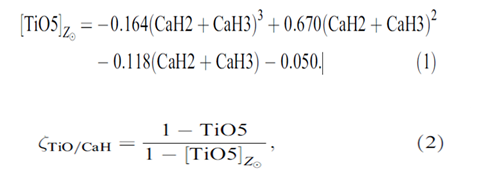

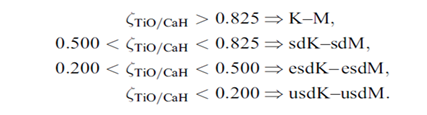

In [ ]:
CaH2 = df_info_obj_espec['CAH2']; CaH3 = df_info_obj_espec['CAH3']; TiO5 = df_info_obj_espec['TIO5']

In [ ]:
TiO5_z = -0.164*(CaH2+CaH3)**3 + 0.670*(CaH2+CaH3)**2 - 0.118*(CaH2+CaH3)-0.05

In [ ]:
index =np.round((1-TiO5)/(1-TiO5_z),3)

In [ ]:
index.describe()

count    3012.000000
mean        0.594212
std         0.221229
min         0.000000
25%         0.449750
50%         0.673000
75%         0.778000
max         1.461000
dtype: float64

Valores negativos no tienen sentido.

Añadimos una columna con la clase de metalicidad. Lo clasificaremos en:


*   'u' de desconocida. Aquellas que no lo hayamos calculado por falta de algún índice.
*   'dM' para las que index mayor o igual que 0.825
*   'sdM' para index mayor o igual que 0.5 y menor 0.825
*   'esdM' para index mayor o igual que 0.2 y menor 0.5
*   'usdM' para index menor que 0.2.





In [ ]:
def f_clase_metalicidad(index):
  if index <0:
    return 'u'
  elif index < 0.2:
    return 'usdM'
  elif index < 0.5:
    return 'esdM'
  elif index < 0.825:
    return 'sdM'
  else:
    return 'dM'

In [ ]:
clase_metalicidad=index.apply(f_clase_metalicidad)

In [ ]:
df_info_obj_espec['clase_metalicidad']=clase_metalicidad
df_info_obj_espec['clase_metalicidad'].value_counts()

sdM     2102
esdM     657
usdM     240
dM        13
Name: clase_metalicidad, dtype: int64

In [ ]:
frecuencias = pd.crosstab(df_info_obj_espec['SUBCLASS'], df_info_obj_espec['clase_metalicidad']) 
frecuencias.T

SUBCLASS,BR,Ca,K5,K7,L0,M0,M1,M2,M3,M4,M5,M6,M7,M8,M9
clase_metalicidad,,,,,,,,,,,,,,,
dM,0,0,0,0,0,5,4,1,1,0,1,1,0,0,0
esdM,0,0,0,18,0,357,54,140,34,25,4,5,7,6,7
sdM,1,4,1,39,1,441,271,573,264,118,73,97,60,89,70
usdM,0,0,0,3,0,184,7,26,10,5,1,0,0,3,1


## Corrección de los espectros por el redshift.

Vamos a corregir las longitudes de ondas los espectros por los redshift. Usaremos $\frac{\lambda_o - \lambda_i}{\lambda_i} = Z$, con $\lambda_o$  y  $\lambda_i$  longitudes de onda observada y emitida respectivamente. Luego $\lambda_i = \frac{\lambda_o}{1+ Z}$

Podemos ver de cuánto estamos hablando en el caso de longitudes de onda de 3000 y 9000 Armstrongs para Z mínima y máxima.

In [ ]:
df_info_obj_espec['z'].describe()

count    3003.000000
mean        0.000095
std         0.007476
min        -0.001562
25%        -0.000148
50%        -0.000008
75%         0.000098
max         0.409348
Name: z, dtype: float64

In [ ]:
lo_inf = 3000
lo_sup = 9000
z_min =  -0.001562
z_max =  0.001523
primer_cuartil = -0.000148
tercer_cuartil = 0.000097

print(f" variación longitud onda para Z = {z_min} y longitud de onda de {lo_inf}: {z_min*lo_inf}")
print(f" variación longitud onda para Z = {z_max} y longitud de onda de {lo_inf}: {z_max*lo_inf}")
print(f" variación longitud onda para Z = {z_min} y longitud de onda de {lo_sup}: {z_min*lo_sup}")
print(f" variación longitud onda para Z = {z_max} y longitud de onda de {lo_sup}: {z_max*lo_sup}")
print(f" variación longitud onda para Z = {primer_cuartil} y longitud de onda de {lo_inf}: {primer_cuartil*lo_inf}")
print(f" variación longitud onda para Z = {primer_cuartil} y longitud de onda de {lo_sup}: {primer_cuartil*lo_sup}")
print(f" variación longitud onda para Z = {tercer_cuartil} y longitud de onda de {lo_inf}: {tercer_cuartil*lo_inf}")
print(f" variación longitud onda para Z = {tercer_cuartil} y longitud de onda de {lo_sup}: {tercer_cuartil*lo_sup}")

 variación longitud onda para Z = -0.001562 y longitud de onda de 3000: -4.686
 variación longitud onda para Z = 0.001523 y longitud de onda de 3000: 4.569
 variación longitud onda para Z = -0.001562 y longitud de onda de 9000: -14.058
 variación longitud onda para Z = 0.001523 y longitud de onda de 9000: 13.707
 variación longitud onda para Z = -0.000148 y longitud de onda de 3000: -0.44399999999999995
 variación longitud onda para Z = -0.000148 y longitud de onda de 9000: -1.3319999999999999
 variación longitud onda para Z = 9.7e-05 y longitud de onda de 3000: 0.291
 variación longitud onda para Z = 9.7e-05 y longitud de onda de 9000: 0.873


Para los valores entre el primer y el tercer cuartil de la longitud de onda la variación es inferior a 1 Armstrong. 

Sin embargo conforme nos acercamos a los extremos de la distribución de Z el corrimiento en el espectro para grandes longitudes de onda puede ser considerable.

En los metadatos vimos que las magnitudes del los errores de Z también eran grandes. Por ello solo corregiremos los espectros que cumplan Z > 2 errZ

In [ ]:
#Inspeccionamos la razón Z/zerr
np.abs( df_info_obj_espec['Z']/df_info_obj_espec['Z_ERR'] ).describe()

count    3012.000000
mean       11.144240
std       136.090226
min         0.000645
25%         1.631168
50%         3.587415
75%         9.710362
max      7442.693276
dtype: float64

Se define la función para corregir las longitudes de onda por el redshift

In [ ]:
def correccion_Z(lista, limite,rango = True, outlier=True):
  """
  Modifica las longitudes de onda en función de z.
  param: lista
    : param[0] lista. lista con las longitudes de onda
    : param[1]. Z.
    : param[2]. error de Z
    : param[3]. Booleano que indica si el valor de z está fuera de rango
    : param[4]. Booleano que indica si el valor de z es outlier

  : param: limite. Si abs(Z/erroZ) >= limite se corrige la longitud de onda
  : param: rango. Si True no corrige valores fuera de rango
  : param: outlier. Si True no corrige outliers

  : return: lista con las longitudes de onda corregidas
  """
  long = lista[0]
  z = lista[1]
  errorZ = lista[2]
  es_outrango = lista[3]
  es_outlier = lista[4]

  no_corregir_lo = (np.abs(z/errorZ)< limite) | (es_outrango*rango) |(es_outlier*outlier)

  if not no_corregir_lo:
    long = list(map(lambda x: np.around(x/(1+z),1),long))
  return long

In [ ]:
df_info_obj_espec_zcorr = df_info_obj_espec.copy()
df_info_obj_espec_zcorr['long_A'] = df_info_obj_espec[['long_A','Z','Z_ERR','outrango_info','outlier_info']].apply(correccion_Z, limite =2, axis=1)
df_info_obj_espec_zcorr.head(4)


,PLATE-MJD-FIBER,flujo,long_A,PLATEQUALITY,extrapolado,max_long_A,Z,Z_ERR,CLASS,SUBCLASS,outlier_info,outrango_info,ID,SP,CAH2,CAH3,TIO5,outlier_indices,outrango_indices,subclass_c,clase_metalicidad
0,1808-54176-58,"[-0.6632891893, 2.39052701, -5.435426712, 1.57...","[3815.9, 3816.8, 3817.7, 3818.6, 3819.5, 3820....",good,False,9204.5,-0.000234,0.000016,STAR,M2,False,False,SDSS140205.6+055010.3,4,0.399178,0.580422,0.715843,False,False,M4,esdM
1,1970-53386-9,"[-0.4185376167, 0.1414910257, -0.6999538541, 0...","[3807.2, 3808.0, 3808.9, 3809.8, 3810.7, 3811....",good,False,9187.6,-0.000053,0.000030,STAR,M6,False,False,SDSS115532.8+394034.6,5,0.313654,0.561496,0.381925,False,False,M5,sdM
2,1803-54152-200,"[-0.5595631599, 1.6141862868999999, -0.4718873...","[3807.2, 3808.1, 3809.0, 3809.9, 3810.7, 3811....",good,False,9185.4,0.000217,0.000035,STAR,M2,False,False,SDSS134320.5+065520.6,7,0.274310,0.374130,0.570033,False,False,M7,esdM
3,1955-53442-499,"[-0.4254819751, 0.28042450550000003, 1.2131350...","[3801.0, 3801.9, 3802.8, 3803.6, 3804.5, 3805....",marginal,False,9208.7,-0.000042,0.000037,STAR,M2,False,False,SDSS101743.1+333535.0,6,0.218958,0.498092,0.442925,False,False,M6,sdM


Podemos comprobar las correcciones. 

In [ ]:
indice = 4
print(f" z/error z : {np.abs(df_info_obj_espec.loc[indice]['Z']/df_info_obj_espec.loc[indice]['Z_ERR'])}")
print(f" antes correccion: {df_info_obj_espec.loc[indice]['long_A']}")
print(f"después correccion: {df_info_obj_espec_zcorr.loc[indice]['long_A']}")
df_info_obj_espec.loc[indice]['outlier_info'] | df_info_obj_espec.loc[indice]['outrango_info']

 z/error z : 3.219478125
 antes correccion: [3787.9, 3788.8, 3789.7, 3790.5, 3791.4, 3792.3, 3793.1, 3794.0, 3794.9, 3795.8, 3796.6, 3797.5, 3798.4, 3799.3, 3800.1, 3801.0, 3801.9, 3802.8, 3803.6, 3804.5, 3805.4, 3806.3, 3807.2, 3808.0, 3808.9, 3809.8, 3810.7, 3811.5, 3812.4, 3813.3, 3814.2, 3815.0, 3815.9, 3816.8, 3817.7, 3818.6, 3819.4, 3820.3, 3821.2, 3822.1, 3823.0, 3823.8, 3824.7, 3825.6, 3826.5, 3827.4, 3828.2, 3829.1, 3830.0, 3830.9, 3831.8, 3832.7, 3833.5, 3834.4, 3835.3, 3836.2, 3837.1, 3838.0, 3838.8, 3839.7, 3840.6, 3841.5, 3842.4, 3843.3, 3844.1, 3845.0, 3845.9, 3846.8, 3847.7, 3848.6, 3849.5, 3850.3, 3851.2, 3852.1, 3853.0, 3853.9, 3854.8, 3855.7, 3856.6, 3857.4, 3858.3, 3859.2, 3860.1, 3861.0, 3861.9, 3862.8, 3863.7, 3864.6, 3865.4, 3866.3, 3867.2, 3868.1, 3869.0, 3869.9, 3870.8, 3871.7, 3872.6, 3873.5, 3874.4, 3875.3, 3876.1, 3877.0, 3877.9, 3878.8, 3879.7, 3880.6, 3881.5, 3882.4, 3883.3, 3884.2, 3885.1, 3886.0, 3886.9, 3887.8, 3888.7, 3889.6, 3890.5, 3891.3, 3892.2, 389

False

### Revisión corrección de z por subclases

Revisamos espectros pertenecientes a las mismas subclases.

In [ ]:
subclases = df_info_obj_espec_zcorr['subclass'].unique()
subclases

array(['M8', 'M2', 'M0', 'M1', 'M3', 'M9', 'M4', 'M7', 'M5', 'Ca', 'M6',
       'K7', 'L0', 'K5', 'BR'], dtype=object)

Revisamos algunos espectros visualmente para ver las diferencias. Seleccionaremos aquellos que tengan z muy distintos

Para una misma subclase cogemos una muestra de aquellos que tienen z más positivo y otra con z más negativo y lo representamos. Visualizaremos rangos altos de frecuencia ya que es donde más afecta el corrimiento al rojo.

In [ ]:
subclase = 'M1'
Z=0.0006
indices_z_posit = (df_info_obj_espec['SUBCLASS']==subclase) & (df_info_obj_espec['Z']>Z) 
indices_z_negat = (df_info_obj_espec['SUBCLASS']==subclase) & (df_info_obj_espec['Z']<-Z) 

espectros_z_posit= df_info_obj_espec[['flujo','long_A','Z']][indices_z_posit].reset_index(drop=True)
espectros_z_negat= df_info_obj_espec[['flujo','long_A','Z']][indices_z_negat].reset_index(drop=True)

espectros_corr_z_posit = df_info_obj_espec_zcorr[['flujo','long_A','Z']][indices_z_posit].reset_index(drop=True)
espectros_corr_z_negat = df_info_obj_espec_zcorr[['flujo','long_A','Z']][indices_z_negat].reset_index(drop=True)

print(indices_z_posit.sum(),'  ',indices_z_negat.sum())

3    4


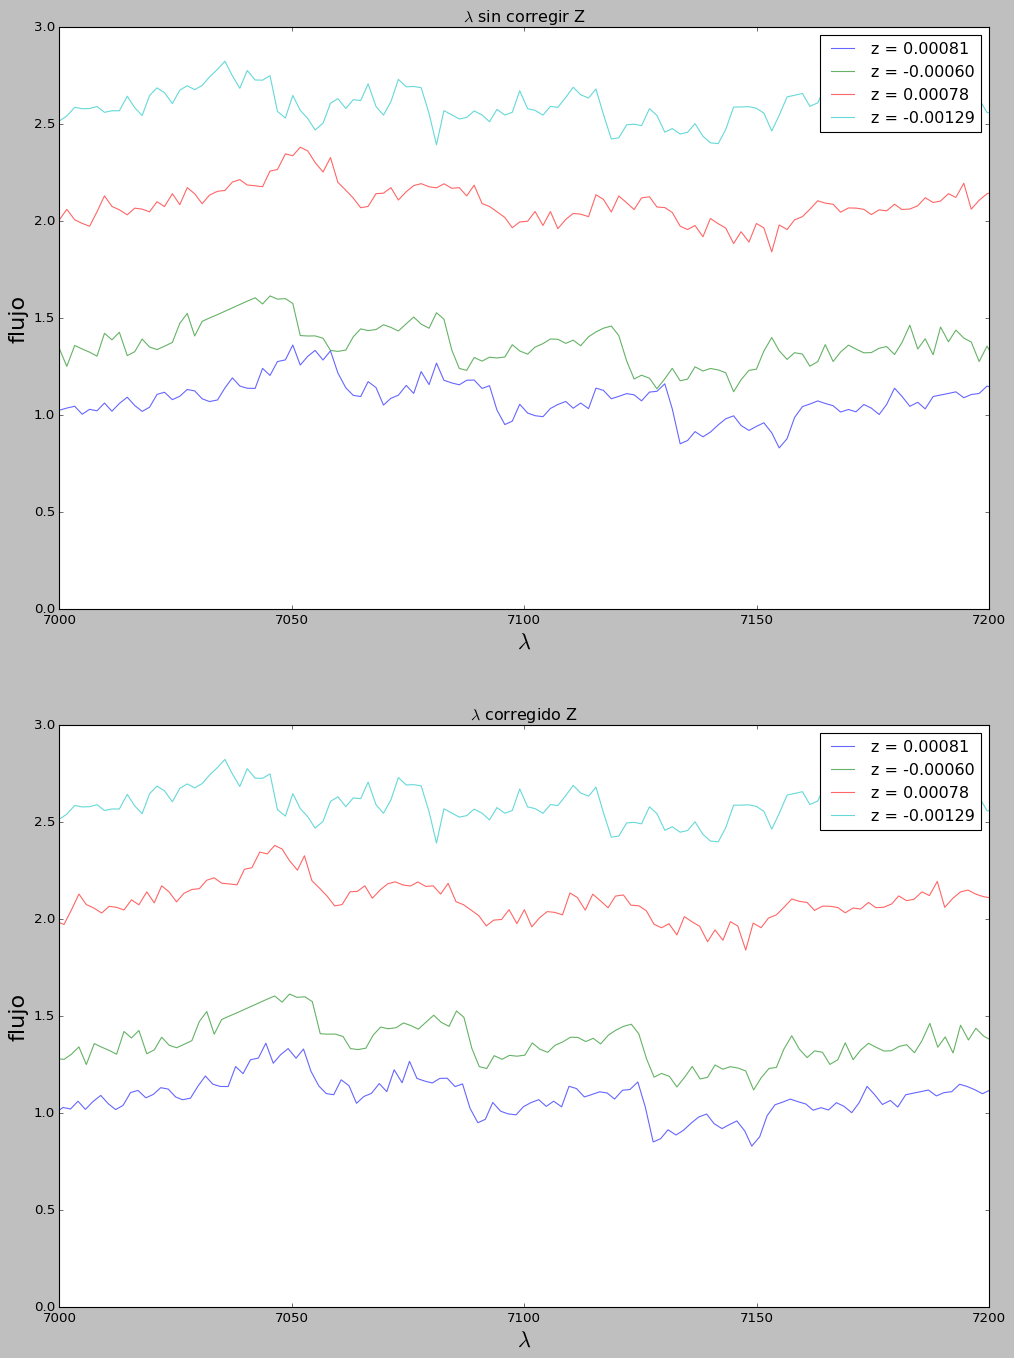

In [ ]:
ind = [1,2]
desp =1
alfa=0.6
fig, ax = plt.subplots(2, 1,figsize=(15,20))

for j, i in enumerate(ind):
  x = np.asarray(espectros_z_posit.loc[i]['long_A'])
  y = (np.asarray(espectros_z_posit.loc[i]['flujo'])/np.asarray(espectros_z_posit.loc[i]['flujo'][2350:2500]).mean())+desp *j #normalizamos a un intervalo por el ruido
  z = str(espectros_z_posit.loc[i]['Z'])[:7]
  ax[0].plot(x,y,alpha=alfa, label="z = "+z)
  x = np.asarray(espectros_z_negat.loc[i]['long_A'])
  y = (np.asarray(espectros_z_negat.loc[i]['flujo'])/np.asarray(espectros_z_negat.loc[i]['flujo'][2350:2500]).mean())+desp *(j+0.3)
  z = str(espectros_z_negat.loc[i]['Z'])[:8]
  ax[0].plot(x,y,alpha=alfa,label="z = "+z)

  x = np.asarray(espectros_corr_z_posit.loc[i]['long_A'])
  y = (np.asarray(espectros_corr_z_posit.loc[i]['flujo'])/np.asarray(espectros_corr_z_posit.loc[i]['flujo'][2350:2500]).mean())+desp *j
  z = str(espectros_corr_z_posit.loc[i]['Z'])[:7]
  ax[1].plot(x,y,alpha=alfa,label="z = "+z)

  x = np.asarray(espectros_corr_z_negat.loc[i]['long_A'])
  y = (np.asarray(espectros_corr_z_negat.loc[i]['flujo'])/np.asarray(espectros_corr_z_negat.loc[i]['flujo'][2350:2500]).mean())+desp *(j+0.3)
  z = str(espectros_corr_z_negat.loc[i]['Z'])[:8]
  ax[1].plot(x,y,alpha=alfa,label="z = "+z)


ax[0].set_xlabel('$\lambda$',size=20)
ax[0].set_ylabel('flujo',size = 20)
ax[0].set_title('$\lambda$ sin corregir Z')
ax[0].set_ylim(0,3)
ax[0].set_xlim(7000,7200)

ax[1].set_xlabel('$\lambda$',size=20)
ax[1].set_ylabel('flujo',size = 20)
ax[1].set_title('$\lambda$ corregido Z')
ax[1].set_ylim(0,3)
ax[1].set_xlim(7000,7200)

ax[0].legend()
ax[1].legend()


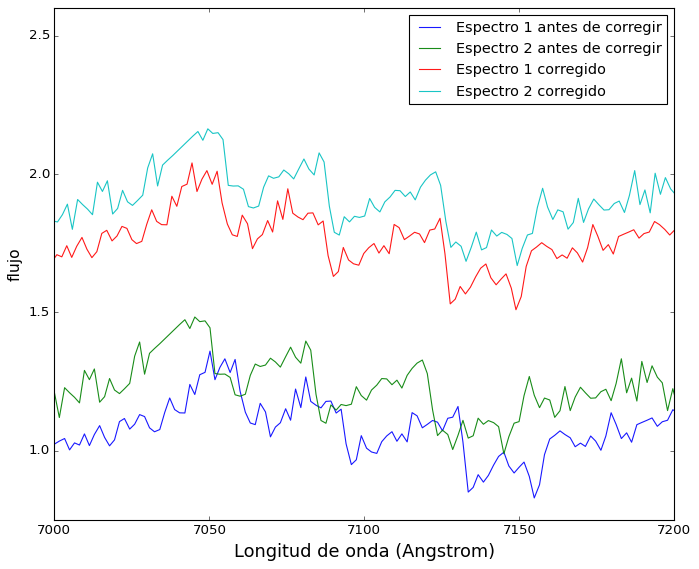

In [ ]:
  i = 1
  
  desp =0.17
  alfa=0.9
  fig, ax = plt.subplots(figsize=(10,8))
  fig.patch.set_facecolor('white')

  x = np.asarray(espectros_z_posit.loc[i]['long_A'])
  y = (np.asarray(espectros_z_posit.loc[i]['flujo'])/np.asarray(espectros_z_posit.loc[i]['flujo'][2350:2500]).mean())#normalizamos a un intervalo por el ruido
  z = str(espectros_z_posit.loc[i]['Z'])[:7]
  ax.plot(x,y,alpha=alfa, label='Espectro 1 antes de corregir')
  x = np.asarray(espectros_z_negat.loc[i]['long_A'])
  y = (np.asarray(espectros_z_negat.loc[i]['flujo'])/np.asarray(espectros_z_negat.loc[i]['flujo'][2350:2500]).mean())+desp
  z = str(espectros_z_negat.loc[i]['Z'])[:8]
  ax.plot(x,y,alpha=alfa,label='Espectro 2 antes de corregir')

  x = np.asarray(espectros_corr_z_posit.loc[i]['long_A'])
  y = (np.asarray(espectros_corr_z_posit.loc[i]['flujo'])/np.asarray(espectros_corr_z_posit.loc[i]['flujo'][2350:2500]).mean())+desp *4
  z = str(espectros_corr_z_posit.loc[i]['Z'])[:7]
  ax.plot(x,y,alpha=alfa,label='Espectro 1 corregido')

  x = np.asarray(espectros_corr_z_negat.loc[i]['long_A'])
  y = (np.asarray(espectros_corr_z_negat.loc[i]['flujo'])/np.asarray(espectros_corr_z_negat.loc[i]['flujo'][2350:2500]).mean())+desp *5
  z = str(espectros_corr_z_negat.loc[i]['Z'])[:8]
  ax.plot(x,y,alpha=alfa,label='Espectro 2 corregido')


  ax.set_xlabel('Longitud de onda (Angstrom)',size=16)
  ax.set_ylabel('flujo',size = 14)

  ax.set_ylim(0.75,2.6)
  ax.set_xlim(7000,7200)

  ax.legend(fontsize=13)



Vemos claramente que al corregir el corrimiento al rojo las características de los espectros pasan a coincidir para los mismos rangos de longitudes de onda. 

### Guardado y carga de los espectros y datos SDSS corregidos z y subclase

In [ ]:
df_info_obj_espec_zcorr.head(2)

,SPECOBJID,ra,dec,sn_median_r,z,zerr,zwarning,class,subclass,PLATE-MJD-FIBER,outlier_info,outrango_info,flujo,long_A,PLATEQUALITY,extrapolado,max_long_A,ID,SP,CAH2,CAH3,TIO5,outlier_indices,outrango_indices,EWHA,EWHAERR,clase_metalicidad,subclass_c
0,309697273216919552,'10:42:51.28','+00:04:22.23',0.64,0.000039,0.000046,0,'STAR',M8,275-51910-272,False,False,"[0.2586207092, 0.6234312057, 0.7740471363, -0....","[3812.4, 3813.3, 3814.2, 3815.0, 3815.9, 3816....",good,False,9187.6,SDSS104251.3+000422.3,4,0.292888,0.687398,0.452480,False,False,6.975730,4.328810,sdM,M4
1,309715140280870912,'10:43:20.47','+01:04:39.41',10.18,0.000567,0.000023,0,'STAR',M2,275-51910-337,False,False,"[3.3431725502000003, 1.394443512, -1.370499610...","[3821.6, 3822.5, 3823.4, 3824.3, 3825.2, 3826....",good,False,9215.1,SDSS104320.5+010439.4,4,0.401911,0.591834,0.635272,False,False,0.322523,0.151661,sdM,M4


Lo guardamos el dataset en formato json. (No es posible en csv)

In [ ]:
import json


In [ ]:
directorio = 'BD_espectros_sample/'
df_info_obj_espec_zcorr.to_json(directorio+'datos_obj_espectros_corregidosZ.json')

In [ ]:
df_ = df_info_obj_espec_zcorr.copy()

Comprobamos que se lee correctamente.

In [ ]:
directorio = 'BD_espectros_sample/'
df_info_obj_espec_zcorr = pd.read_json(directorio+'datos_obj_espectros_corregidosZ.json')


In [ ]:
df_info_obj_espec_zcorr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3003 entries, 0 to 3002
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SPECOBJID          3003 non-null   int64  
 1   ra                 3003 non-null   object 
 2   dec                3003 non-null   object 
 3   sn_median_r        3003 non-null   float64
 4   z                  3003 non-null   float64
 5   zerr               3003 non-null   float64
 6   zwarning           3003 non-null   int64  
 7   class              3003 non-null   object 
 8   subclass           3003 non-null   object 
 9   PLATE-MJD-FIBER    3003 non-null   object 
 10  outlier_info       3003 non-null   bool   
 11  outrango_info      3003 non-null   bool   
 12  flujo              3003 non-null   object 
 13  long_A             3003 non-null   object 
 14  PLATEQUALITY       3003 non-null   object 
 15  extrapolado        3003 non-null   bool   
 16  max_long_A         3003 

In [ ]:
df_info_obj_espec_zcorr

,SPECOBJID,ra,dec,sn_median_r,z,zerr,zwarning,class,subclass,PLATE-MJD-FIBER,outlier_info,outrango_info,flujo,long_A,PLATEQUALITY,extrapolado,max_long_A,ID,SP,CAH2,CAH3,TIO5,outlier_indices,outrango_indices,EWHA,EWHAERR,clase_metalicidad,subclass_c
0,309697273216919552,'10:42:51.28','+00:04:22.23',0.64,0.000039,0.000046,0,'STAR',M8,275-51910-272,False,False,"[0.2586207092, 0.6234312057, 0.7740471363, -0....","[3812.4, 3813.3, 3814.2, 3815.0, 3815.9, 3816....",good,False,9187.6,SDSS104251.3+000422.3,4,0.292888,0.687398,0.452480,False,False,6.975730,4.328810,sdM,M4
1,309715140280870912,'10:43:20.47','+01:04:39.41',10.18,0.000567,0.000023,0,'STAR',M2,275-51910-337,False,False,"[3.3431725502000003, 1.394443512, -1.370499610...","[3821.6, 3822.5, 3823.4, 3824.3, 3825.2, 3826....",good,False,9215.1,SDSS104320.5+010439.4,4,0.401911,0.591834,0.635272,False,False,0.322523,0.151661,sdM,M4
2,312010645648205824,'11:02:47.93','+00:30:39.59',0.37,-0.000035,0.000028,0,'STAR',M8,277-51908-496,False,False,"[-3.9273266792, -0.0634190291, -1.0881940126, ...","[3806.3, 3807.2, 3808.0, 3808.9, 3809.8, 3810....",good,False,9215.1,SDSS110247.9+003039.6,8,0.035066,0.456209,0.243058,False,False,-1.654430,3.184390,sdM,M8
3,315338862379427840,'11:15:54.18','+00:10:35.44',8.68,-0.000032,0.000030,0,'STAR',M2,280-51612-316,False,False,"[2.116350174, -3.1608884335, -3.5482480526, 0....","[3823.8, 3824.7, 3825.6, 3826.5, 3827.4, 3828....",good,False,9185.4,SDSS111554.2+001035.4,1,0.626938,0.740722,0.742424,False,False,-0.032316,0.182680,sdM,M1
4,316414459662854144,'11:27:53.83','-00:51:39.48',28.26,0.000387,0.000010,0,'STAR',M0,281-51614-133,False,False,"[4.0344686508, 1.3338127136, 5.0930256844, 3.5...","[3817.9, 3818.8, 3819.7, 3820.6, 3821.5, 3822....",good,False,9191.8,SDSS112753.8-005139.5,2,0.579556,0.722194,0.980701,False,False,0.225585,0.071582,usdM,M2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,3327057665879730176,'15:41:38.61','+00:54:17.24',2.15,0.000099,0.000071,0,'STAR',M3,2955-54562-85,False,False,"[0.9542601705, -0.6615563631, -0.5490909815, -...","[3806.3, 3807.2, 3808.0, 3808.9, 3809.8, 3810....",good,False,9191.8,SDSS154138.6+005417.2,2,0.446113,0.782369,0.708928,False,False,-0.343679,0.793476,sdM,M2
2999,3327140953885534208,'15:37:03.16','+01:43:46.66',0.22,0.000085,0.000063,0,'STAR',M8,2955-54562-388,False,False,"[-2.37241292, -3.4199938774, 0.3273103237, 0.6...","[3810.7, 3811.5, 3812.4, 3813.3, 3814.2, 3815....",good,False,9215.1,SDSS153703.2+014346.7,7,0.290779,0.272229,0.232520,False,False,-2.642600,5.461190,sdM,M7
3000,3328176143462328320,'09:56:35.70','+45:36:47.08',1.04,-0.000097,0.000114,0,'STAR',M5,2956-54525-58,False,False,"[0.2150664628, 0.44118729230000003, 0.40179073...","[3811.5, 3812.4, 3813.3, 3814.2, 3815.0, 3815....",good,False,9196.0,SDSS095635.7+453647.0,3,0.452730,0.634629,0.540067,False,False,-0.467214,0.984462,sdM,M3
3001,3331593700680689664,'07:52:53.40','+30:32:31.78',7.05,0.000276,0.000033,0,'STAR',M0,2959-54537-203,False,False,"[2.4018104076, 1.712359786, -1.817949414300000...","[3808.7, 3809.6, 3810.4, 3811.3, 3812.2, 3813....",marginal,False,9183.3,SDSS075253.4+303231.7,0,0.740018,0.853068,0.847223,False,False,-0.454342,0.261851,sdM,M0


## Remuestreo de los espectros.

Para poder un análisis posterior interesa que los flujos vengan referidos a una misma base de longitudes de onda.

### Muestra enanas baja metalicidad de SDSS

Recortaremos los espectros hasta los 8500 A.

Esto lo hacemos para coger la información relevante y unificar las longitudes de onda.

In [ ]:
df_info_obj_espec_zcorr.columns

Index(['SPECOBJID', 'ra', 'dec', 'sn_median_r', 'z', 'zerr', 'zwarning',
       'class', 'subclass', 'PLATE-MJD-FIBER', 'outlier_info', 'outrango_info',
       'flujo', 'long_A', 'PLATEQUALITY', 'extrapolado', 'max_long_A', 'ID',
       'SP', 'CAH2', 'CAH3', 'TIO5', 'outlier_indices', 'outrango_indices',
       'EWHA', 'EWHAERR', 'clase_metalicidad', 'subclass_c'],
      dtype='object')

Definimos un conjunto de longitudes de onda sobre las que interpolaremos los flujos. Tenemos flujos para unas  3800 longitudes de onda en un rango entre los 3800 y 9200 Armstrong. Haremos un sobremuestreo con un paso de 0.5 Armstrong entre 5000 y 8500 haciendo interpolación lineal. 

In [ ]:
new_long = np.arange(5000+0.5, 8500, 0.5)
new_long.shape

(6999,)

In [ ]:
new_long

array([5000.5, 5001. , 5001.5, ..., 8498.5, 8499. , 8499.5])

Podemos inspeccionar gráficamente en algunos espectros la interpolación

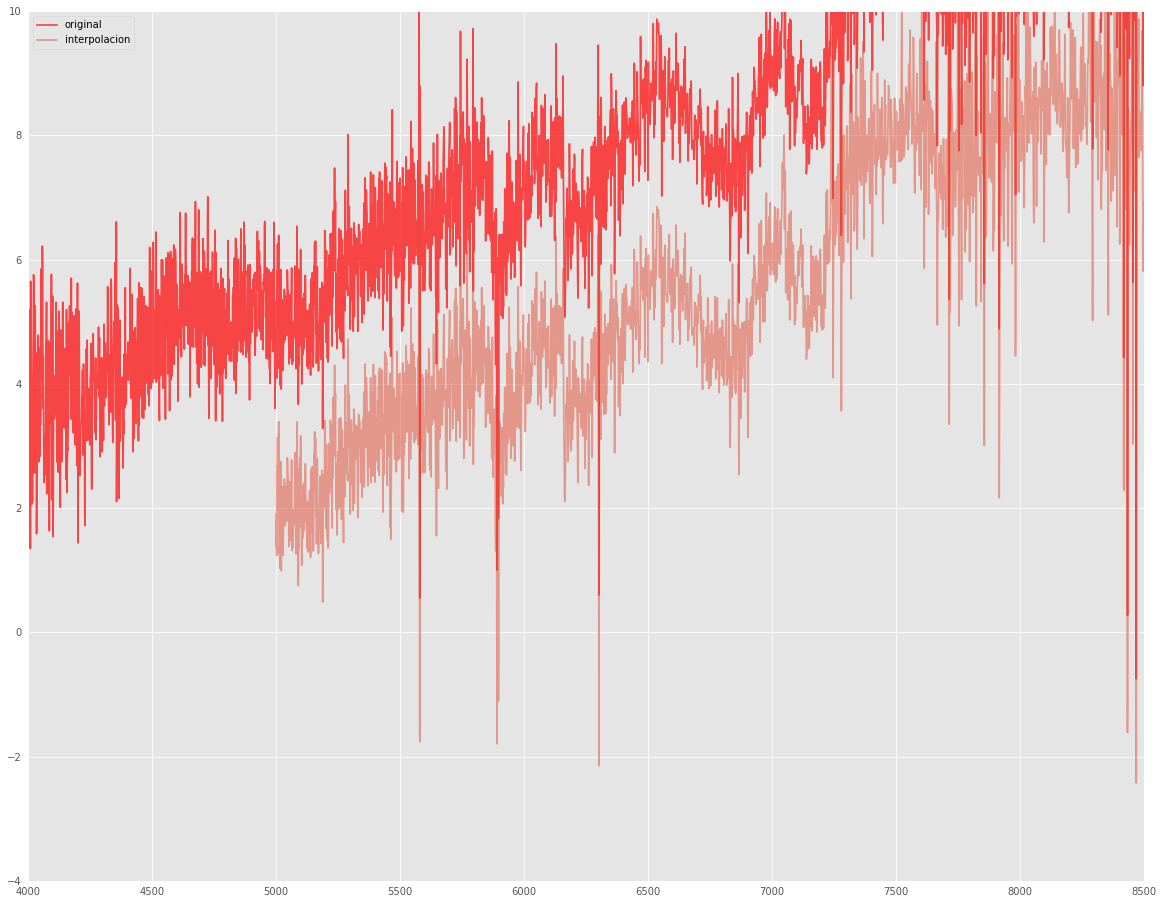

In [ ]:
indice=280
x = df_info_obj_espec_zcorr.loc[indice]['long_A']
y = df_info_obj_espec_zcorr.loc[indice]['flujo']
f_inter = interpolate.interp1d(x, y)
new_flujo = f_inter(new_long)

plt.figure(figsize=(20,16))
plt.plot(x, [k+3 for k in y], color='r', label = 'original',alpha = 0.7) #desplazamos en 3 el espectro original
plt.plot(new_long, new_flujo, label='interpolacion', alpha = 0.5)
plt.xlim(4000,8500)
plt.ylim(-4,10)
plt.legend()
plt.show()

Hacemos la interpolación para todos los espectros.

In [ ]:
def fun_extrapolar(X, new_x):
  '''
  :param: X[0] longitudes de onda datos originales
  :paras: X[1] flujos originales
  :new_x: nuevas longitudes de onda sobre las que interpolar

  :return: flujos interpolados

  '''
  #new_x = np.arange(5000, 8000.5, 0.5)
  f_inter = interpolate.interp1d(X[0], X[1])
  return  f_inter(new_x)



In [ ]:
df_obj_espectros_extrap = df_info_obj_espec_zcorr.copy()

In [ ]:
df_obj_espectros_extrap.flujo = df_obj_espectros_extrap[['long_A','flujo']].apply(fun_extrapolar, new_x = new_long, axis=1)  



Podemos inspeccionar graficamente los resultados.

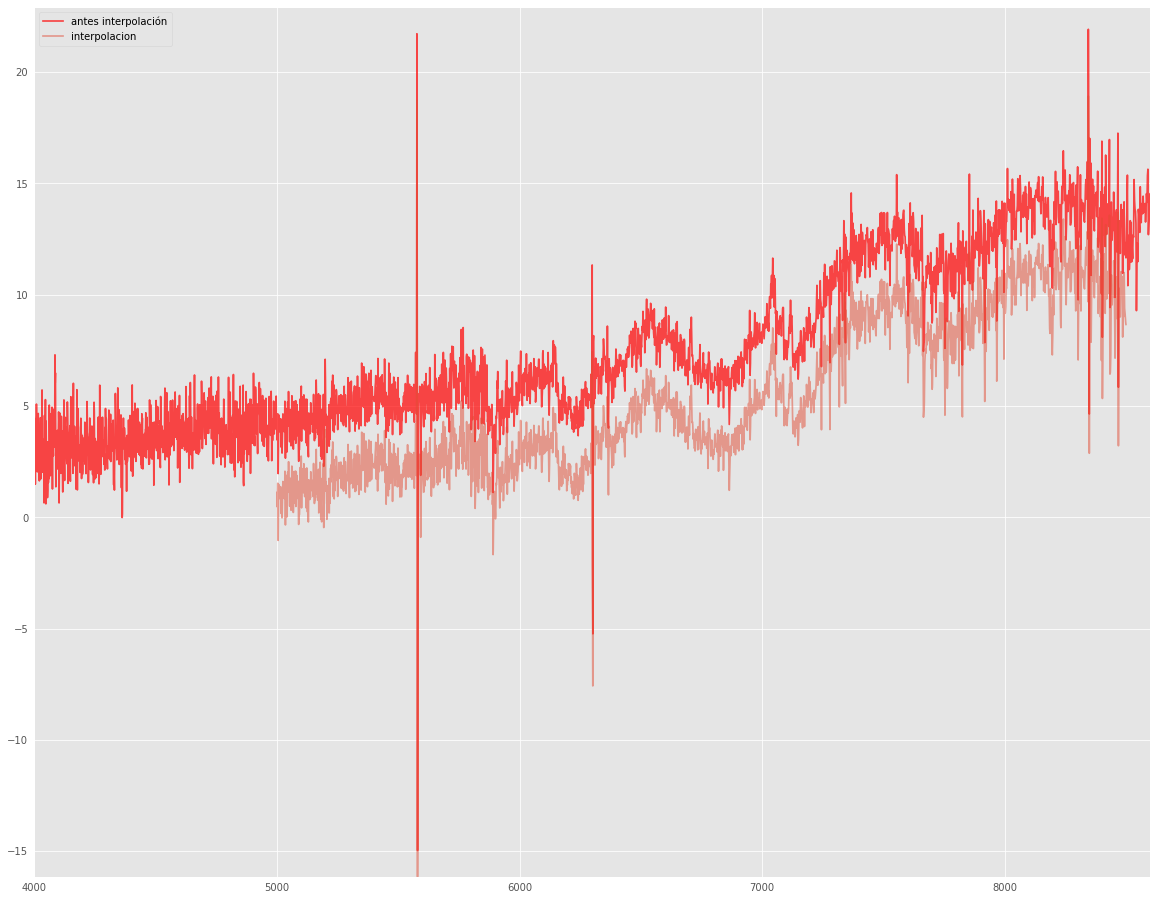

In [ ]:
indice =2500

new_flujo = df_obj_espectros_extrap.loc[indice,'flujo']
x = df_info_obj_espec_zcorr.loc[indice]['long_A']
y = df_info_obj_espec_zcorr.loc[indice]['flujo']

plt.figure(figsize=(20,16))
plt.plot(x, [k+3 for k in y], color='r', label = 'antes interpolación',alpha = 0.7) #desplazamos  el espectro original
plt.plot(new_long, new_flujo, label='interpolacion', alpha = 0.5)
plt.xlim(4000,8600)
plt.ylim(new_flujo.min(),4+new_flujo.max())
plt.legend()
plt.show()

#### Guardado y carga de los espectros SDSS extrapolados.

Para ahorrar espacio guardaremos las longitudes de onda solo en el primer registro

In [ ]:
df_obj_espectros_extrap.long_A = [new_long]+ [0]*(df_obj_espectros_extrap.shape[0]-1) 

In [ ]:
df_obj_espectros_extrap.head(5)

,SPECOBJID,ra,dec,sn_median_r,z,zerr,zwarning,class,subclass,PLATE-MJD-FIBER,outlier_info,outrango_info,flujo,long_A,PLATEQUALITY,extrapolado,max_long_A,ID,SP,CAH2,CAH3,TIO5,outlier_indices,outrango_indices,EWHA,EWHAERR,clase_metalicidad,subclass_c
0,309697273216919552,'10:42:51.28','+00:04:22.23',0.64,0.000039,0.000046,0,'STAR',M8,275-51910-272,False,False,"[0.1910378187499413, 0.38464163987497074, 0.57...","[5000.5, 5001.0, 5001.5, 5002.0, 5002.5, 5003....",good,False,9187.6,SDSS104251.3+000422.3,4,0.292888,0.687398,0.452480,False,False,6.975730,4.328810,sdM,M4
1,309715140280870912,'10:43:20.47','+01:04:39.41',10.18,0.000567,0.000023,0,'STAR',M2,275-51910-337,False,False,"[1.533884882950038, 1.2824903726999999, 1.2868...",0,good,False,9215.1,SDSS104320.5+010439.4,4,0.401911,0.591834,0.635272,False,False,0.322523,0.151661,sdM,M4
2,312010645648205824,'11:02:47.93','+00:30:39.59',0.37,-0.000035,0.000028,0,'STAR',M8,277-51908-496,False,False,"[1.076908727483494, 0.546347568441747, 0.01578...",0,good,False,9215.1,SDSS110247.9+003039.6,8,0.035066,0.456209,0.243058,False,False,-1.654430,3.184390,sdM,M8
3,315338862379427840,'11:15:54.18','+00:10:35.44',8.68,-0.000032,0.000030,0,'STAR',M2,280-51612-316,False,False,"[3.626225392049899, 3.9600028594249497, 4.2937...",0,good,False,9185.4,SDSS111554.2+001035.4,1,0.626938,0.740722,0.742424,False,False,-0.032316,0.182680,sdM,M1
4,316414459662854144,'11:27:53.83','-00:51:39.48',28.26,0.000387,0.000010,0,'STAR',M0,281-51614-133,False,False,"[9.082636919908971, 9.287364006050373, 10.1079...",0,good,False,9191.8,SDSS112753.8-005139.5,2,0.579556,0.722194,0.980701,False,False,0.225585,0.071582,usdM,M2


In [ ]:
new_flujo.shape

(6999,)

Lo guardamos el dataset en formato json. (No es posible en csv)

In [ ]:
import json


In [ ]:
directorio = 'BD_espectros_sample/'
df_obj_espectros_extrap.to_json(directorio+'datos_obj_espectros_extrapolados.json')

In [ ]:
df_ = df_obj_espectros_extrap.copy()

Comprobamos que se lee correctamente.

In [ ]:
directorio = 'BD_espectros_sample/'
df_obj_espectros_extrap = pd.read_json(directorio+'datos_obj_espectros_extrapolados.json')


In [ ]:
df_obj_espectros_extrap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3003 entries, 0 to 3002
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SPECOBJID          3003 non-null   int64  
 1   ra                 3003 non-null   object 
 2   dec                3003 non-null   object 
 3   sn_median_r        3003 non-null   float64
 4   z                  3003 non-null   float64
 5   zerr               3003 non-null   float64
 6   zwarning           3003 non-null   int64  
 7   class              3003 non-null   object 
 8   subclass           3003 non-null   object 
 9   PLATE-MJD-FIBER    3003 non-null   object 
 10  outlier_info       3003 non-null   bool   
 11  outrango_info      3003 non-null   bool   
 12  flujo              3003 non-null   object 
 13  long_A             3003 non-null   object 
 14  PLATEQUALITY       3003 non-null   object 
 15  extrapolado        3003 non-null   bool   
 16  max_long_A         3003 

In [ ]:
df_obj_espectros_extrap

,SPECOBJID,ra,dec,sn_median_r,z,zerr,zwarning,class,subclass,PLATE-MJD-FIBER,outlier_info,outrango_info,flujo,long_A,PLATEQUALITY,extrapolado,max_long_A,ID,SP,CAH2,CAH3,TIO5,outlier_indices,outrango_indices,EWHA,EWHAERR,clase_metalicidad,subclass_c
0,309697273216919552,'10:42:51.28','+00:04:22.23',0.64,0.000039,0.000046,0,'STAR',M8,275-51910-272,False,False,"[0.1910378187, 0.3846416399, 0.578245461000000...","[5000.5, 5001.0, 5001.5, 5002.0, 5002.5, 5003....",good,False,9187.6,SDSS104251.3+000422.3,4,0.292888,0.687398,0.452480,False,False,6.975730,4.328810,sdM,M4
1,309715140280870912,'10:43:20.47','+01:04:39.41',10.18,0.000567,0.000023,0,'STAR',M2,275-51910-337,False,False,"[1.533884883, 1.2824903726999999, 1.2868878544...",0,good,False,9215.1,SDSS104320.5+010439.4,4,0.401911,0.591834,0.635272,False,False,0.322523,0.151661,sdM,M4
2,312010645648205824,'11:02:47.93','+00:30:39.59',0.37,-0.000035,0.000028,0,'STAR',M8,277-51908-496,False,False,"[1.0769087275, 0.5463475684, 0.0157864094, -0....",0,good,False,9215.1,SDSS110247.9+003039.6,8,0.035066,0.456209,0.243058,False,False,-1.654430,3.184390,sdM,M8
3,315338862379427840,'11:15:54.18','+00:10:35.44',8.68,-0.000032,0.000030,0,'STAR',M2,280-51612-316,False,False,"[3.6262253920000003, 3.9600028594000003, 4.293...",0,good,False,9185.4,SDSS111554.2+001035.4,1,0.626938,0.740722,0.742424,False,False,-0.032316,0.182680,sdM,M1
4,316414459662854144,'11:27:53.83','-00:51:39.48',28.26,0.000387,0.000010,0,'STAR',M0,281-51614-133,False,False,"[9.0826369199, 9.2873640061, 10.1079387665, 10...",0,good,False,9191.8,SDSS112753.8-005139.5,2,0.579556,0.722194,0.980701,False,False,0.225585,0.071582,usdM,M2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,3327057665879730176,'15:41:38.61','+00:54:17.24',2.15,0.000099,0.000071,0,'STAR',M3,2955-54562-85,False,False,"[0.4617551193, 0.3279235251, 0.194091931000000...",0,good,False,9191.8,SDSS154138.6+005417.2,2,0.446113,0.782369,0.708928,False,False,-0.343679,0.793476,sdM,M2
2999,3327140953885534208,'15:37:03.16','+01:43:46.66',0.22,0.000085,0.000063,0,'STAR',M8,2955-54562-388,False,False,"[0.292153695, 0.1775735474, 0.0629933998, -0.0...",0,good,False,9215.1,SDSS153703.2+014346.7,7,0.290779,0.272229,0.232520,False,False,-2.642600,5.461190,sdM,M7
3000,3328176143462328320,'09:56:35.70','+45:36:47.08',1.04,-0.000097,0.000114,0,'STAR',M5,2956-54525-58,False,False,"[0.0956987465, -0.0160267266, -0.1277521998, -...",0,good,False,9196.0,SDSS095635.7+453647.0,3,0.452730,0.634629,0.540067,False,False,-0.467214,0.984462,sdM,M3
3001,3331593700680689664,'07:52:53.40','+30:32:31.78',7.05,0.000276,0.000033,0,'STAR',M0,2959-54537-203,False,False,"[1.3083184741, 1.080525886, 1.0135897994, 1.05...",0,marginal,False,9183.3,SDSS075253.4+303231.7,0,0.740018,0.853068,0.847223,False,False,-0.454342,0.261851,sdM,M0


### Plantillas subenanas

In [ ]:
df_espec_platillas.columns

Index(['flujo', 'long_A', 'clase_metalicidad'], dtype='object')

##### Submuestreo plantillas

Submuestreamos según  la base definida de longitudes de onda.
Podemos usar la mediana o bien la media.

Usamos la mediana. Definimos la siguiente función.

In [ ]:
def submuestreo(flujos_lo, base_lo, anchura=0.5): 
  """
  :param: flujos_lo lista dos elementos. [Lista o array con los flujos, longitudes de onda correspondientes]
  :param: base_lo. Nuevas longitudes de onda
  :param: anchura. rango de longitudes de onda en la que se calculará la mediana. 
                    En este caso 0.5 ya que esta es la separación entre longitudes de onda.

  :return: Flujos submuestreados a la nueva base base_lo

  """
  d=anchura/2
  lo=np.asarray(flujos_lo[1])
  flujos=np.asarray(flujos_lo[0])
  new_flujo = []
  for i in base_lo:
    indices = np.where((lo>=i-d)&(lo<i+d)) #intervalos agrupamiento.
    new_flujo.append(np.median(flujos[indices]))
  return np.asarray(new_flujo)


Podemos ver si funciona bien.

In [ ]:
espectro =15
x_p= df_espec_platillas.loc[espectro,'long_A']
y_p= df_espec_platillas.loc[espectro,'flujo']
new_flujo = submuestreo([y_p, x_p], new_long, 0.5)

In [ ]:
new_flujo.shape

(6999,)

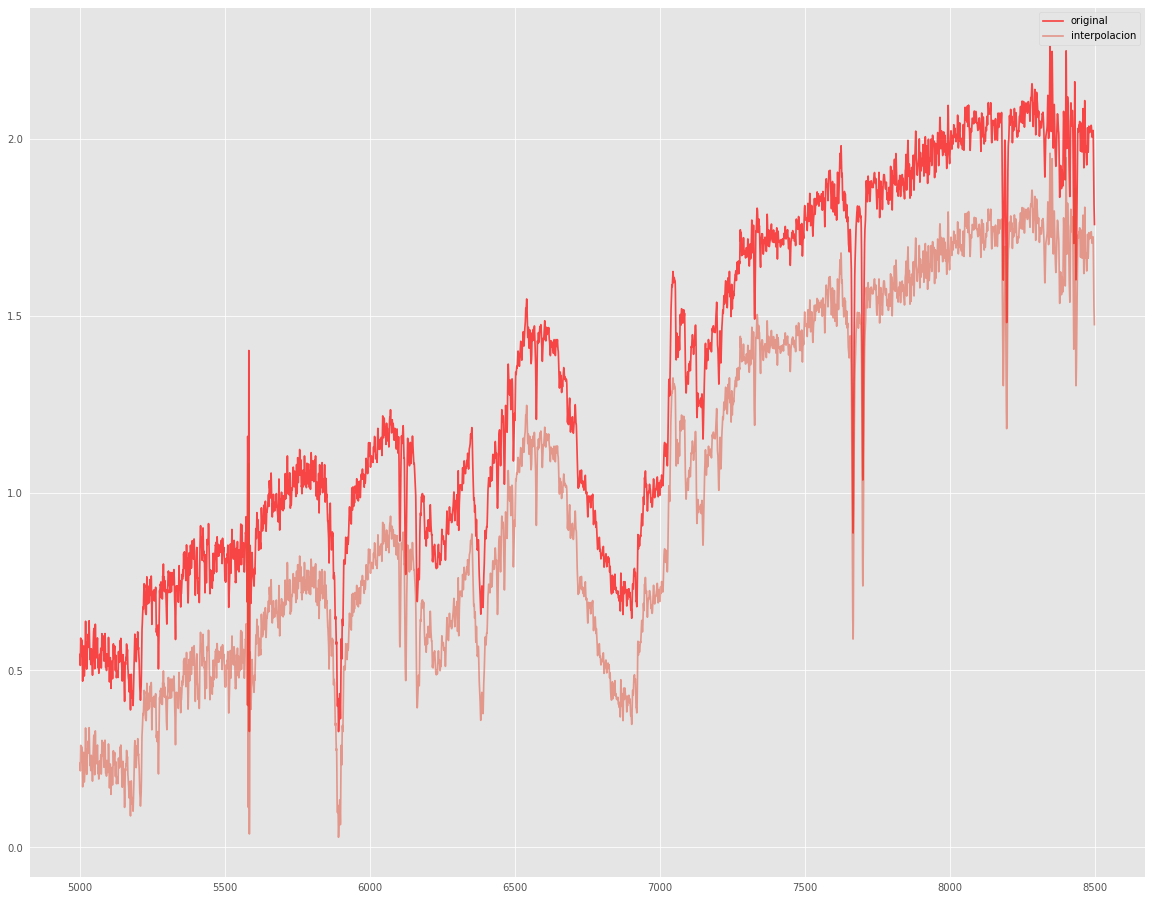

In [ ]:
plt.figure(figsize=(20,16))
plt.plot(x_p, [k+0.3 for k in y_p], color='r', label = 'original',alpha = 0.7) #desplazamos en 3 el espectro original
plt.plot(new_long, new_flujo, label='interpolacion', alpha = 0.5)
#plt.ylim(-4,10)
plt.legend()
plt.show()

Podemos ver como perdemos informacion. 

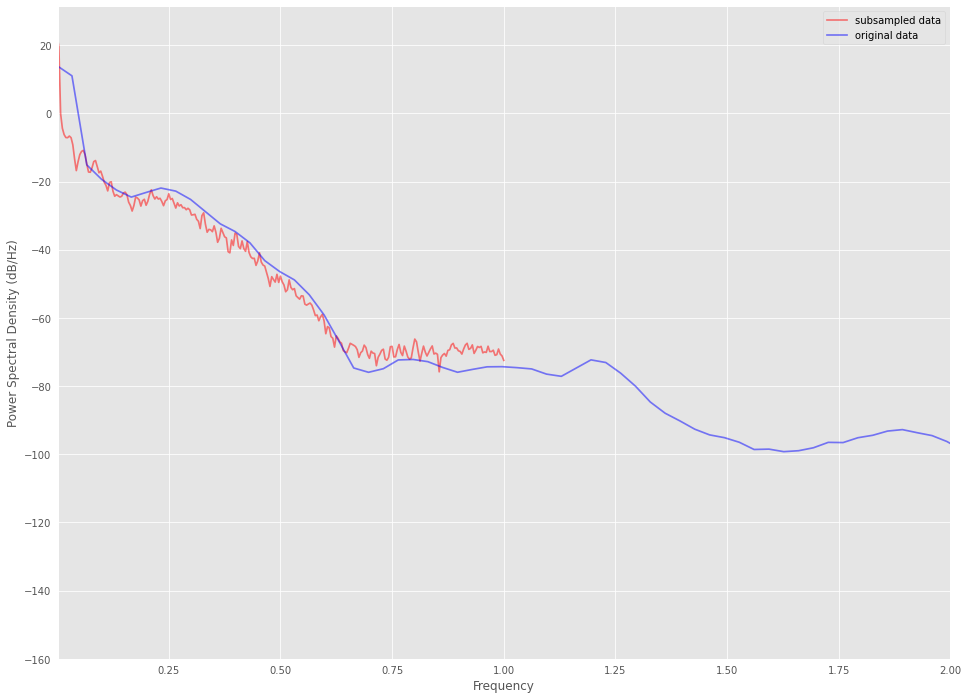

In [ ]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.psd.html

plt.figure(1,figsize=(16,12))

plt.psd(new_flujo, NFFT=512, Fs=2, label='subsampled data', color='red',alpha=0.5)
plt.psd(y_p, NFFT=512, Fs=int(len(x_p)/3500), label='original data', color='blue',alpha=0.5)
#plt.ylim(-5,20)
plt.xlim(0.001,2)
plt.legend()

Aplicamos el submuestreo a todas las plantillas.

In [ ]:
df_plantillas_submuestreo = df_espec_platillas.copy()
df_plantillas_submuestreo['flujo']=df_plantillas_submuestreo[['flujo','long_A']].apply(submuestreo, base_lo=new_long,axis=1)

Añadimos las nuevas longitudes de onda al dataset.

In [ ]:
df_plantillas_submuestreo['long_A']=[new_long]*df_plantillas_submuestreo.shape[0]
df_plantillas_submuestreo.head(2)

,flujo,long_A,clase_metalicidad
0,"[0.37649570405, 0.3602712154, 0.3570573628, 0....","[5000.5, 5001.0, 5001.5, 5002.0, 5002.5, 5003....",usdm0
1,"[0.351226598, 0.3472792208, 0.3544224948, 0.37...","[5000.5, 5001.0, 5001.5, 5002.0, 5002.5, 5003....",usdm1


Comprobamos el resultado

In [ ]:
espectro =2
x_p= df_espec_platillas.loc[espectro,'long_A']
y_p= df_espec_platillas.loc[espectro,'flujo']
x= df_plantillas_submuestreo.loc[espectro,'long_A']
y= df_plantillas_submuestreo.loc[espectro,'flujo']

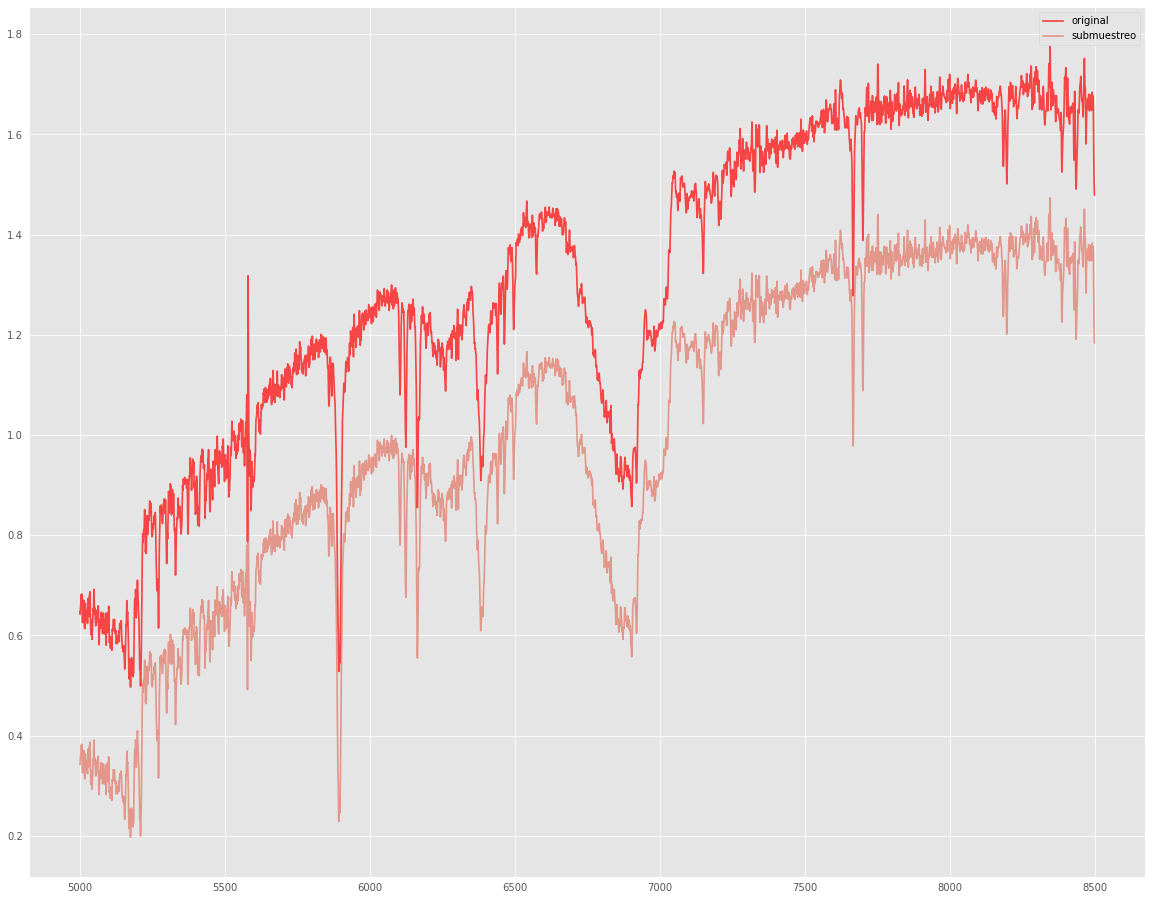

In [ ]:
plt.figure(figsize=(20,16))
plt.plot(x_p, [k+0.3 for k in y_p], color='r', label = 'original',alpha = 0.7) #desplazamos en 3 el espectro original
plt.plot(x, y, label='submuestreo', alpha = 0.5)
#plt.ylim(-4,10)
plt.legend()
plt.show()

#### Guardado y carga de las plantillas submuestreadas

Lo guardamos el dataset en formato json. (No es posible en csv)

In [ ]:
import json


In [ ]:
directorio = 'Plantillas/'
df_plantillas_submuestreo.to_json(directorio+'plantillas_submuestreadas.json')

In [ ]:
df_ = df_plantillas_submuestreo.copy()

Comprobamos que se lee correctamente.

In [ ]:
directorio = 'Plantillas/'
df_plantillas_submuestreo = pd.read_json(directorio+'plantillas_submuestreadas.json')


In [ ]:
df_plantillas_submuestreo.info()

In [ ]:
df_plantillas_submuestreo

## Filtrado de los espectros

Utilizaremos ondículas. Es importante que los flujos correspondan a longitudes de onda equiespaciadas. Eso lo hemos hecho cuando hemos definido una base estándar de longitudes de onda.

In [ ]:
w_type='sym3'
#print(pywt.Wavelet(wavelet_type))

In [ ]:
'''
NO USADO

def filtrado_ondiculas(datos,ondicula, nivel, coef_a_anular,longitud):
  """
  Filtrado con ondículas.
  :param: tipo de ondícula
  :param: array de datos a filtrar.
  :param: nivel: nivel para la transformada
  :param:coef_a_anular: lista con los coeficientes de detalle a anular
  :param:tamaño de los datos a devolver
  :return: datos filtrados.
  """
  DWTcoeffs = pywt.wavedec(datos,ondicula,mode='sym', level=nivel, axis=-1)
  for coef_to_cero in coef_a_anular:
    DWTcoeffs[coef_to_cero] = np.zeros_like(DWTcoeffs[coef_to_cero])
    
  return pywt.waverec(DWTcoeffs,wavelet_type,mode='sym',axis=-1)[:longitud]
    #return np.asarray(y)[:longitud]

Definimos una función que nos filtrará usando ondículas y que nos eliminaré outliers de los flujos

In [ ]:
def filtrado_ondiculas(datos,ondicula, nivel, coef_a_anular,longitud,n_sigma=5 ):
  """
  Filtrado con ondículas.
  :param: ondicula: tipo de ondícula
  :param: datso: array de datos a filtrar.
  :param: nivel: nivel para la transformada ondícula
  :param:coef_a_anular: lista con los coeficientes de detalle a anular
  :param: longitud. tamaño del array a devolver
  :return: datos filtrados.
  """
  datos = np.asarray(datos)
  media = datos.mean()
  std = datos.std()
  def quitar_outliers(n_sigma,media,std):
    def suavizar(x):
      if x > media +n_sigma*std:
        x= media+std
      elif x<media-n_sigma*std:
        x=media-std
      return x
    return suavizar
  
  suavizado = quitar_outliers(n_sigma, media, std)
  datos = np.asarray(list(map(suavizado,datos)))

  DWTcoeffs = pywt.wavedec(datos,ondicula,mode='sym', level=nivel, axis=-1)
  for coef_to_cero in coef_a_anular:
    DWTcoeffs[coef_to_cero] = np.zeros_like(DWTcoeffs[coef_to_cero])
    
  return pywt.waverec(DWTcoeffs,ondicula,mode='sym',axis=-1)[:longitud]
    #return np.asarray(y)[:longitud]

Recuperamos las longitudes de onda.

In [ ]:
'''
new_long = np.asarray(df_plantillas_submuestreo.iloc[0]['long_A'])
new_long.shape
'''

### Espectros Plantillas subenanas

Tras diversas pruebas decompondremos hasta nivel 4 y eliminaremos los dos coeficientes de detalle más bajos. 
Probamos hasta nivel 6 y nos quedamos con solo el nivel superior de detalle

In [ ]:
df_plantillas_filtradas = df_plantillas_submuestreo[['clase_metalicidad','flujo']]
df_plantillas_filtradas['flujo']=df_plantillas_filtradas['flujo'].apply(filtrado_ondiculas, ondicula= w_type, nivel=6, coef_a_anular=[3,4,5,6],longitud=new_long.shape[0], n_sigma=4)


In [ ]:
df_plantillas_filtradas

Calculamos el error cuadrático medio. $\frac{SSE}{n}$.

In [ ]:
SSE_medio=[]
for i in range(0,df_plantillas_submuestreo.shape[0]):
  SSE_medio.append((np.asarray(df_plantillas_submuestreo.loc[i]['flujo']-df_plantillas_filtradas.loc[i]['flujo'])**2).sum()/new_long.shape[0])


In [ ]:
maximo=max(SSE_medio)
maximo

In [ ]:
np.where(np.asarray(SSE_medio)==maximo)

Visualizamos

In [ ]:
df_plantillas_submuestreo.loc[indice]

In [ ]:
indice =28

y_ = df_plantillas_submuestreo.loc[indice,'flujo']
x = new_long
y = df_plantillas_filtradas.loc[indice,'flujo']

plt.figure(figsize=(20,16))
plt.plot(x, y, color='r', label = 'submuestreado filtrado', alpha = 0.8) #desplazamos  el espectro 
plt.plot(x, y_, color = 'b', label='submuestreado', alpha = 0.5)
#plt.xlim(6500,6800)
plt.ylim(-1,4)
plt.legend()
plt.show()

### Espectros DB SDSS

Aplicamos los mismos parámetros para filtrar

In [ ]:
df_espectros_filtrados_sd = df_obj_espectros_extrap[['SPECOBJID','flujo']]
df_espectros_filtrados_sd['flujo']=df_espectros_filtrados_sd['flujo'].apply(filtrado_ondiculas, ondicula= 'sym3', nivel=6, coef_a_anular=[3,4,5,6],longitud=new_long.shape[0], n_sigma=4)


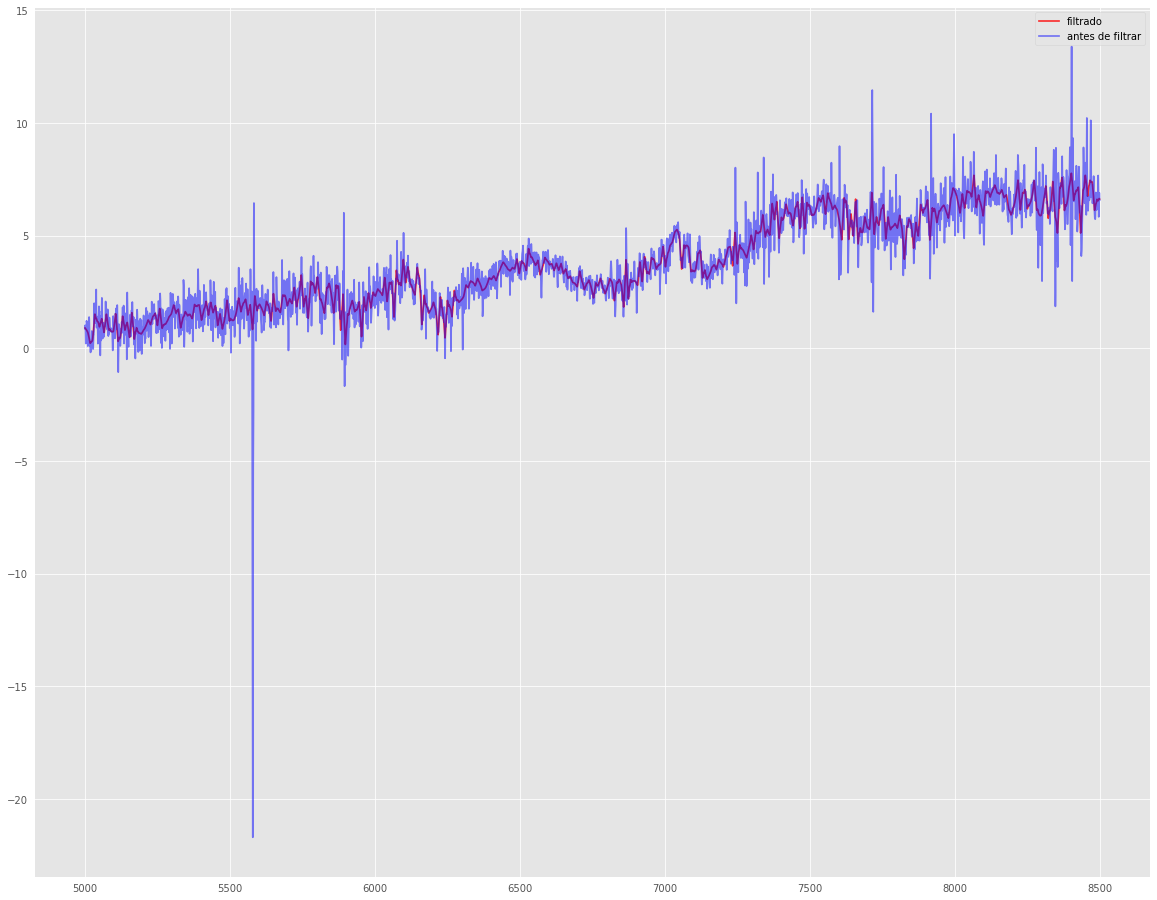

In [ ]:
indice =1250

y_ = df_obj_espectros_extrap.loc[indice,'flujo']
x = new_long
y = df_espectros_filtrados_sd.loc[indice,'flujo']

plt.figure(figsize=(20,16))
plt.plot(x, y, color='r', label = 'filtrado',alpha = 0.8) #desplazamos  el espectro 
plt.plot(x, y_, color ='b', label='antes de filtrar', alpha = 0.5)
#plt.xlim(7475,7525)
#plt.ylim(min(y),max(y))
plt.legend()
plt.show()

## Normalización de los espectros

Los espectros de las plantillas están normalizados respecto al flujo a 7500 Armstrong. Haremos la normalización usando la mediana del intervalo 7500+/- 25

In [ ]:
def normalizacion(espectro ,rang_lo, lo_norm, delta):
  """
  Función: Normaliza el espectro dividiendo por un flujo de normalización

  :param: espectro_[0] flujo del espectro a normalizar
  :param: rang_lo longitudes de onda correspondientes.
  :param: lo_norm: logitud de onda cuyo flujo se tomará como referencia.
  :param: delta: El flujo para normalizar se calculará como la mediana de los flujos en el intervalo [lo_norm-delta, lo_norm+delta]
  :RETURN: flujo normalizado
  """
  espectro = np.asarray(espectro)
  rang_lo = np.asarray(rang_lo)

  rango = np.where((rang_lo>=lo_norm-delta)&(rang_lo<=lo_norm+delta))
  mediana = np.median(espectro[rango])
  return espectro/mediana



### Normalización de los espectros subenanas SDSS

In [ ]:
df_espectros_normalizados_sd = df_espectros_filtrados_sd.copy()
df_espectros_normalizados_sd['flujo']=df_espectros_normalizados_sd['flujo'].apply(normalizacion,rang_lo=new_long, lo_norm=7500, delta=25)
df_espectros_normalizados_sd.head(3)

,SPECOBJID,flujo
0,309697273216919552,"[0.13709608616313115, 0.13280056725086498, 0.1..."
1,309715140280870912,"[0.14259911774775036, 0.1467850403385507, 0.15..."
2,312010645648205824,"[0.11613702091465151, 0.10434157193139175, 0.0..."


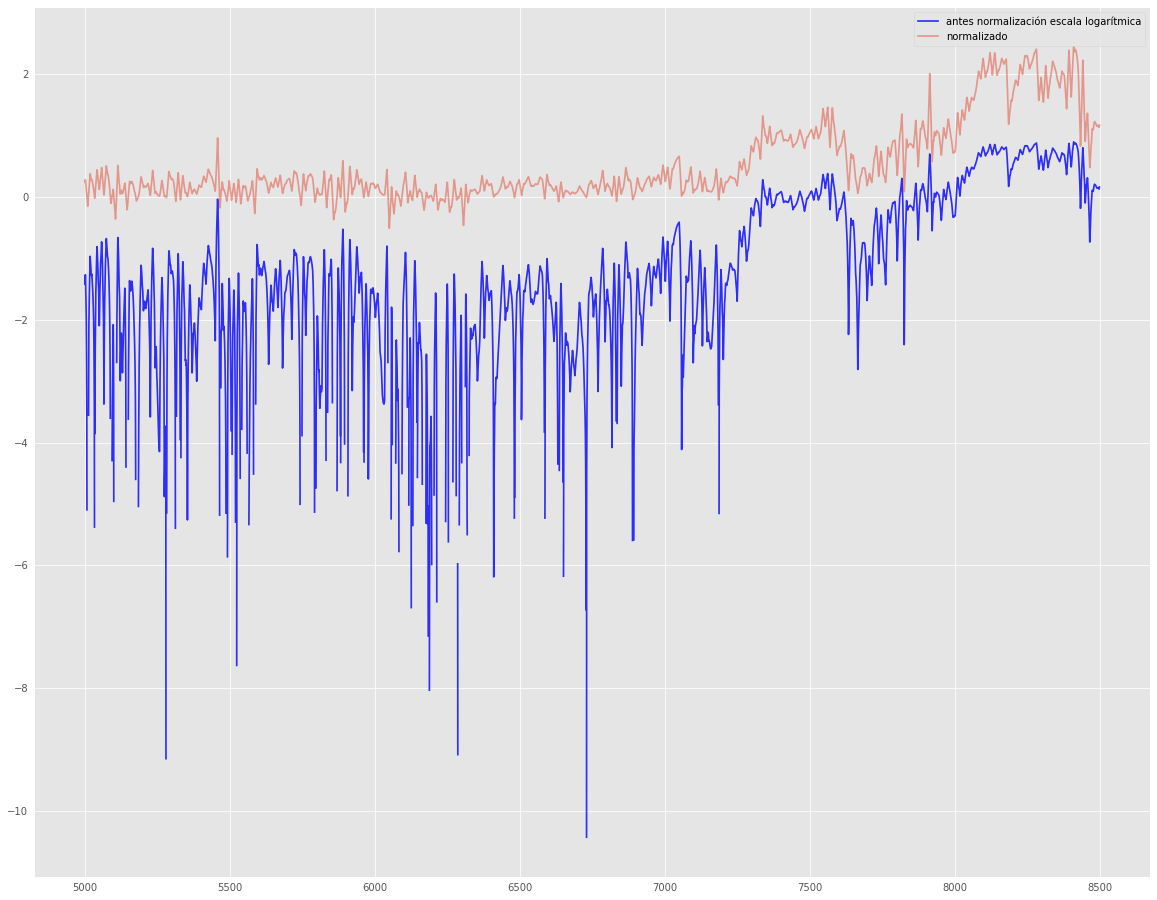

In [ ]:
indice =100

y_ = df_espectros_normalizados_sd.loc[indice,'flujo']
x = new_long
y = df_espectros_filtrados_sd.loc[indice,'flujo']

plt.figure(figsize=(20,16))
plt.plot(x, np.log(y), color='b', label = 'antes normalización escala logarítmica',alpha = 0.8) #desplazamos  el espectro 
plt.plot(x, y_, label='normalizado', alpha = 0.5)
#plt.xlim(7475,7525)
#plt.ylim(min(y_),max(y_))
plt.legend()
plt.show()

#### Guardado y carga de los espectros SDSS normalizados.

In [ ]:
import json


In [ ]:
directorio = 'BD_espectros_sample/'
df_espectros_normalizados_sd.to_json(directorio+'datos_obj_espectros_normalizados.json')

In [ ]:
df_ = df_espectros_normalizados_sd.copy()

Comprobamos que se lee correctamente.

In [ ]:
directorio = 'BD_espectros_sample/'
df_obj_espectros_normalizados = pd.read_json(directorio+'datos_obj_espectros_normalizados.json')


In [ ]:
df_obj_espectros_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3003 entries, 0 to 3002
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SPECOBJID  3003 non-null   int64 
 1   flujo      3003 non-null   object
dtypes: int64(1), object(1)
memory usage: 70.4+ KB


In [ ]:
df_obj_espectros_normalizados

,SPECOBJID,flujo
0,309697273216919552,"[0.1370960862, 0.1328005673, 0.1285098679, 0.1..."
1,309715140280870912,"[0.1425991177, 0.1467850403, 0.1508846158, 0.1..."
2,312010645648205824,"[0.1161370209, 0.1043415719, 0.0931851969, 0.0..."
3,315338862379427840,"[0.3811200295, 0.3806981451, 0.3802821196, 0.3..."
4,316414459662854144,"[0.28944423210000003, 0.2925830801, 0.29562933..."
...,...,...
2998,3327057665879730176,"[0.1794867531, 0.180869517, 0.1822417882, 0.18..."
2999,3327140953885534208,"[0.1343302396, 0.1237528023, 0.1136174085, 0.1..."
3000,3328176143462328320,"[0.0960193152, 0.1105397812, 0.124873470800000..."
3001,3331593700680689664,"[0.321295135, 0.3226400478, 0.3239759953, 0.32..."


### Normalización de las plantillas

In [ ]:
df_plantillas_normalizados = df_plantillas_filtradas.copy()
df_plantillas_normalizados['flujo']=df_plantillas_normalizados['flujo'].apply(normalizacion,rang_lo=new_long, lo_norm=7500, delta=25)
df_plantillas_normalizados.head(3)

In [ ]:
indice =8

y_ = df_plantillas_normalizados.loc[indice,'flujo']
x = new_long
y = df_plantillas_filtradas.loc[indice,'flujo']

plt.figure(figsize=(20,16))
plt.plot(x, y, color='r', label = 'filtrado',alpha = 0.8) #desplazamos  el espectro 
plt.plot(x, y_, label='normalizado', alpha = 0.5)
#plt.xlim(7475,7525)
#plt.ylim(min(y_),max(y_))
plt.title("Plantilla "+df_plantillas_normalizados.loc[indice,'clase_metalicidad'])
plt.legend()
plt.show()

#### Guardado y carga Plantillas normalizadas.

In [ ]:
import json


In [ ]:
directorio = 'Plantillas/'
df_plantillas_normalizados.to_json(directorio+'plantillas_normalizados.json')

Comprobamos que se lee correctamente.

In [ ]:
directorio = 'Plantillas/'
df_plantillas_normalizados = pd.read_json(directorio+'plantillas_normalizados.json')


In [ ]:
df_plantillas_normalizados.info()

In [ ]:
df_plantillas_normalizados

##Submuestreo espectros

Como última parte con el fin de trabajar con menos datos vamos a submuestrear. En un primer intento nos quedaremos con 1000 muestras por espectro. Teníamos 6999 muestras en cada espectro. Repetiremos la última para tener 7000. Cada 7 muestras de onda calularemos la mediana para asignar el valor correspondiente a la longitud de onda del espectro submuestreado.

In [ ]:
#Recortamos la lista para que la primera longitud de onda sea la central del primer intervalor
sub_long_1 = new_long[3:]
print(sub_long_1[0])
new_long[0:5]

5002.0


array([5000.5, 5001. , 5001.5, 5002. , 5002.5])

In [ ]:
#Seleccionamos cada 7.
sub_long=sub_long_1[::7]
print(sub_long.shape)
sub_long[:5] #nuevas longitudes de onda

(1000,)


array([5002. , 5005.5, 5009. , 5012.5, 5016. ])

### Muestra subenanas SDSS

Necesitamos 7000 valores del flujo por espectro pero solo tenemos 6999. Repetiremos el último.

In [ ]:
df_espectros_normalizados_sd['flujo'][0].shape

(6999,)

In [ ]:
flujos_inc = list(map(lambda x: np.asarray(list(x)+[x[-1]]),df_espectros_normalizados_sd['flujo']))
flujos_inc[0].shape

(7000,)

Definimos la función para submuestrear.

In [ ]:
def fun_submuestreo(flujos,intervalo = 7,n_new_flujos=1000):
  """
  :param: flujos de un objeto. dim 7000
  :param: intervalor. tamaño del intervalo sobre el que se calculará la mediana
  :return: array con 1000 valores para el flujo submuestreado. Mediana de cada intervalo de 7 flujos
  """
  new=np.empty((1,n_new_flujos))
  for i in range(intervalo):
    #desplazamos en cada iteración los flujos. Muestraemos con intervalo. 
    #Apilamos cada desplazamiento
    new=np.concatenate((new,flujos[i:][::intervalo].reshape(-1,n_new_flujos)),axis=0)
  #return new
  return np.median(new[1:,:],axis=0)

La probamos

In [ ]:
test = fun_submuestreo(flujos_inc[0])

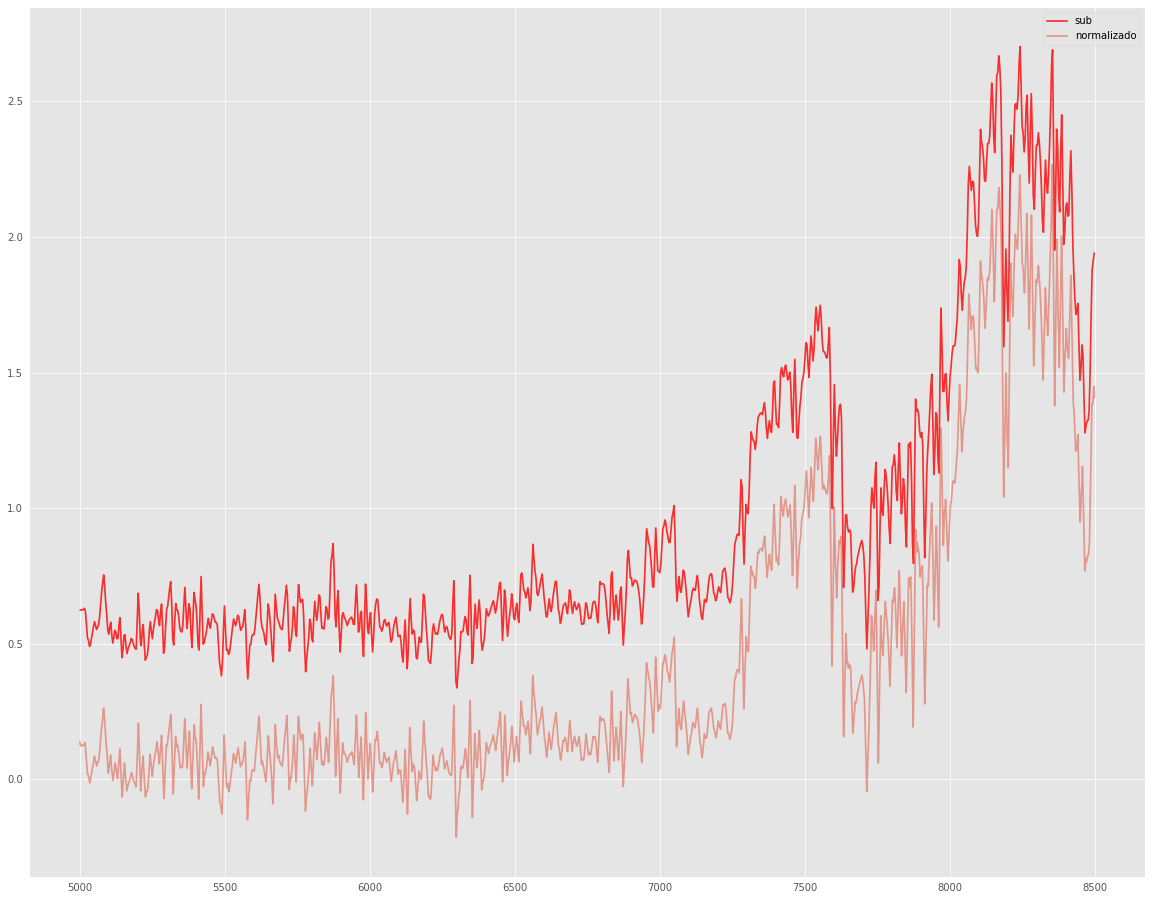

In [ ]:


y_ = df_espectros_normalizados_sd.iloc[0]['flujo']
x_ = new_long
y = test
x = sub_long

plt.figure(figsize=(20,16))
plt.plot(x, y+0.5, color='r', label = 'sub',alpha = 0.8) #desplazamos  el espectro 
plt.plot(x_, y_, label='normalizado', alpha = 0.5)
#plt.xlim(7400,7600)
#plt.ylim(min(y_),max(y_))
plt.legend()
plt.show()

La aplicamos a todos los espectros

In [ ]:
flujos_sub_em = np.asarray(list(map(fun_submuestreo,flujos_inc)))
flujos_sub_em.shape

(3003, 1000)

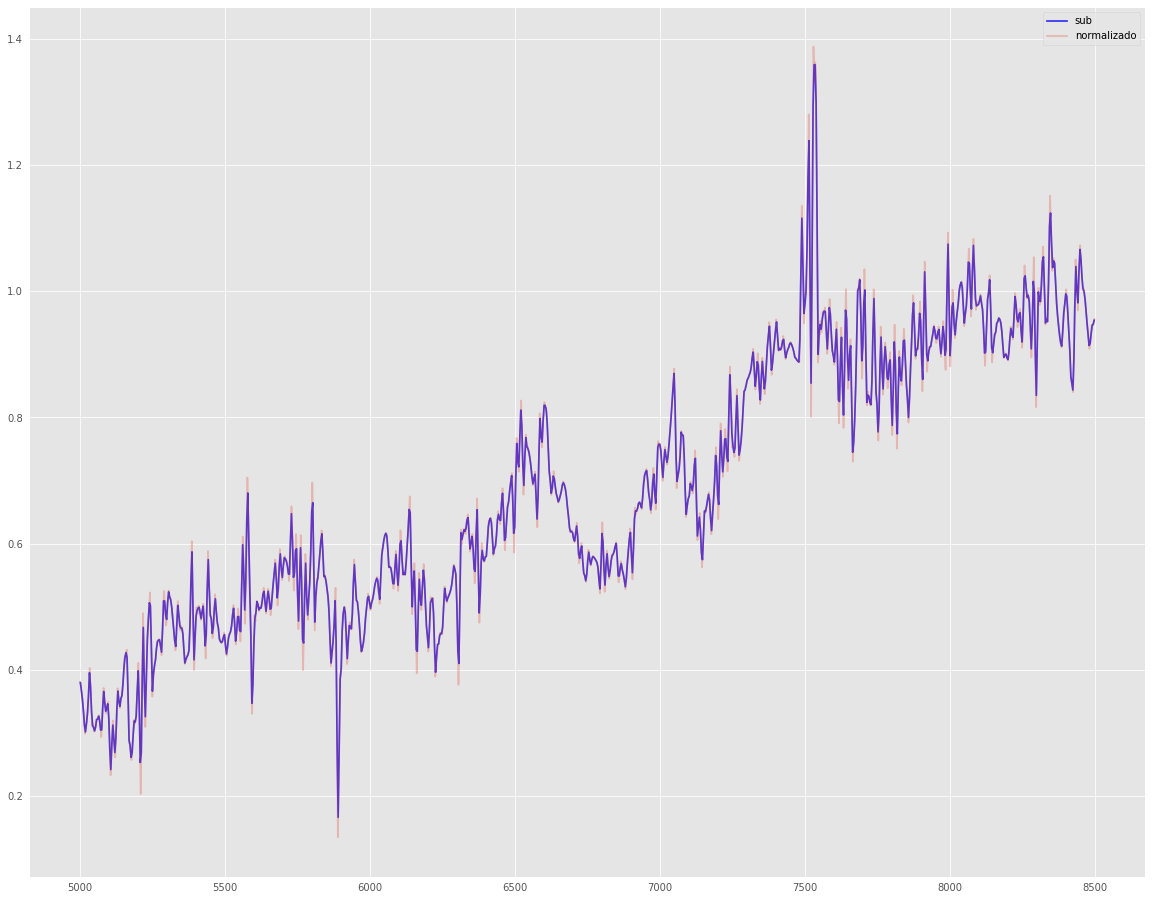

In [ ]:
indice =3

y_ = df_espectros_normalizados_sd.iloc[indice]['flujo']
x_ = new_long
y = flujos_sub_em[indice]
x = sub_long

plt.figure(figsize=(20,16))
plt.plot(x, y, color='b', label = 'sub',alpha = 0.8) #desplazamos  el espectro 
plt.plot(x_, y_, label='normalizado', alpha = 0.3)
#plt.xlim(7400,7600)
#plt.ylim(min(y_),max(y_))
plt.legend()
plt.show()

#### Guardado datos limpiados, filtrados y submuestreados de la muestra de subenanas.

La siguiente fase será ya clustering. Vamos a guardar la matriz con los flujos por un lado y el de las longitudes de onda por otro. Así mismo guardaremos el resto de la información de las subenanas en csv.

In [ ]:
print(flujos_sub_em.shape)
df_obj_espectros_extrap.shape

(3003, 1000)


(3003, 28)

En df_info_espectros_exptrap los flujos y longitudes de onda son las que teníamos antes de filtrar, mormalizar y submuestrear los espectros. Los eliminamos

In [ ]:
df_info_subenanas = df_obj_espectros_extrap.drop(columns= ['flujo', 'long_A'],inplace=False)
df_info_subenanas

Guardaremos en solo fichero las subclases, la clase de metalicidad, las longitudes de onda y los flujos.

In [ ]:
subclases=np.asarray(df_info_subenanas['subclass'])
clase_metalicidad = np.asarray(df_info_subenanas['clase_metalicidad'])


In [ ]:
directorio = 'BD_espectros_sample/'
df_info_subenanas.to_csv(directorio+"info_muestra_tratada_SubEM.csv")
np.savez_compressed(directorio+'muestra_SubEM_tratada.npz', 
                    flujos=flujos_sub_em,
                    long_onda=sub_long,
                    subclases=subclases,
                    clase_metalicidad = clase_metalicidad,
                    datos=df_info_subenanas.values,
                    columnas=df_info_subenanas.columns)

Comprobamos que se leen correctamente.

In [ ]:
directorio = 'BD_espectros_sample/'
muestra_BD = np.load(directorio+'muestra_SubEM_tratada.npz',allow_pickle=True)
muestra_BD.files


['flujos', 'long_onda', 'subclases', 'clase_metalicidad', 'datos', 'columnas']

In [ ]:
flujos_BD, long_onda, subclases, clase_metalicidad,datos, columnas = [muestra_BD[f] for f in muestra_BD.files]

In [ ]:
clase_metalicidad.shape

(3003,)

In [ ]:
del muestra_BD

In [ ]:
df=pd.DataFrame(columns=columnas, data=datos)
df.head(1)

,SPECOBJID,ra,dec,sn_median_r,z,zerr,zwarning,class,subclass,PLATE-MJD-FIBER,outlier_info,outrango_info,PLATEQUALITY,extrapolado,max_long_A,ID,SP,CAH2,CAH3,TIO5,outlier_indices,outrango_indices,EWHA,EWHAERR,clase_metalicidad,subclass_c
0,309697273216919552,'10:42:51.28','+00:04:22.23',0.64,3.9e-05,4.6e-05,0,'STAR',M8,275-51910-272,False,False,good,False,9187.6,SDSS104251.3+000422.3,4,0.292888,0.687398,0.45248,False,False,6.97573,4.32881,sdM,M4


In [ ]:
flujos_BD = [x for x in flujos_BD]

In [ ]:
df['flujo']=l
df['flujo'].head(2)

0    [0.12404471381298769, 0.12512988990859122, 0.1...
1    [0.15517948722203556, 0.18085336727732534, 0.2...
Name: flujo, dtype: object

### Plantillas subenanas

Repetiremos lo realizado para los espectros de la muestra.

In [ ]:
flujos_inc_p = list(map(lambda x: np.asarray(list(x)+[x[-1]]),df_plantillas_normalizados['flujo']))
flujos_inc_p[0].shape

La aplicamos a todas las plantillas

In [ ]:
flujos_sub_plantillas = np.asarray(list(map(fun_submuestreo,flujos_inc_p)))
flujos_sub_plantillas.shape

In [ ]:
indice =20

y_ = df_plantillas_normalizados.iloc[indice]['flujo']
x_ = new_long
y = flujos_sub_plantillas[indice]
x = sub_long

plt.figure(figsize=(10,8))
plt.plot(x, y+0.2, color='r', label = 'sub',alpha = 0.8) #desplazamos  el espectro 
plt.plot(x_, y_, label='normalizado', alpha = 0.5)
#plt.xlim(7400,7600)
#plt.ylim(min(y_),max(y_))

plt.legend()
plt.show()

#### Guardado espectros tratados plantillas

Guardamos las subclases de metalicidad, las longitudes de onda y los flujos en el mismo fichero. 

In [ ]:
df_plantillas_normalizados.columns

In [ ]:
subclases_m=np.asarray(df_plantillas_normalizados['clase_metalicidad'])

In [ ]:
directorio = 'Plantillas/'
np.savez_compressed(directorio+'plantillas_tratadas.npz', 
                    flujos_p=flujos_sub_plantillas,
                    long_onda=sub_long,
                    subclases_m=subclases_m)

Comprobamos que se leen correctamente.

In [ ]:
directorio = 'Plantillas/'
datos_plantillas = np.load(directorio+'plantillas_tratadas.npz',allow_pickle=True)
datos_plantillas.files


['flujos_p', 'long_onda', 'subclases_m']

In [ ]:
flujos_p, long_onda, subclases_m = [datos_plantillas[f] for f in datos_plantillas.files]


In [ ]:
del datos_plantillas

In [ ]:
subclases_m

array(['usdm0', 'usdm1', 'usdm2', 'usdm3', 'usdm4', 'usdm5', 'usdm6',
       'usdm7', 'usdm8', 'usdm9', 'esdm0', 'esdm1', 'esdm2', 'esdm3',
       'esdm4', 'esdm5', 'esdm6', 'esdm7', 'esdm8', 'esdm9', 'sdm0',
       'sdm1', 'sdm2', 'sdm3', 'sdm4', 'sdm5', 'sdm6', 'sdm7', 'sdm8',
       'sdm9'], dtype=object)

In [ ]:
flujos_p

In [ ]:
longitudes_onda.shape

In [ ]:
subclases_m

In [ ]:
flujos_p.shape

#Visualización espectros

Primeramente compararemos las plantillas originales con las procesadas.

In [ ]:
lista_plantillas=[0,12,20,24,28]
espec_plant_original = df_espec_platillas.loc[lista_plantillas]
espec_plant_final = flujos_p[lista_plantillas]

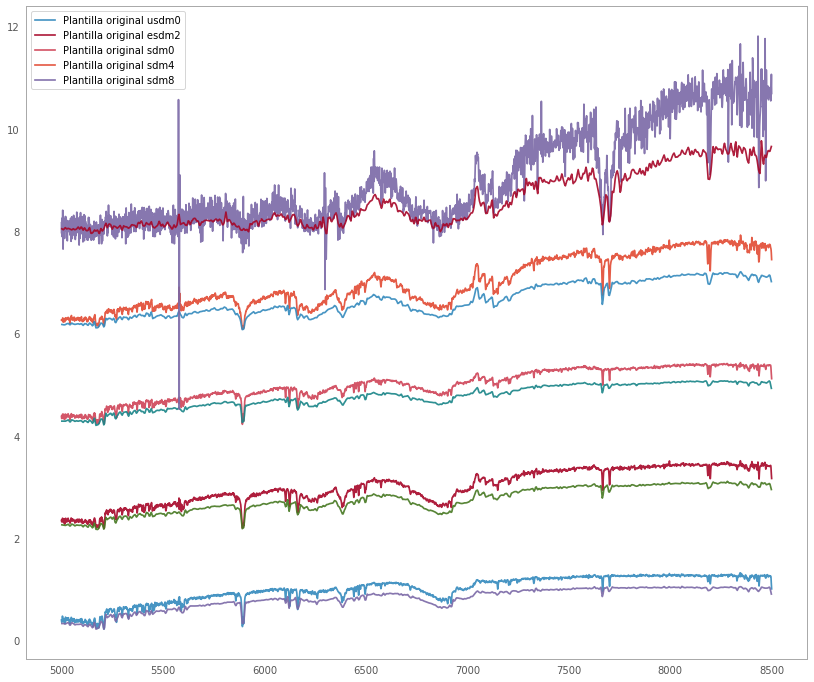

In [ ]:
plt.figure(figsize=(14,12))
k=0
for i, plantilla in espec_plant_original.iterrows():
  
  plt.plot(plantilla.long_A, np.asarray(plantilla.flujo)+k*2, label= 'Plantilla original '+plantilla.clase_metalicidad,   alpha=0.9)
  #plt.plot(plantilla.long_A, np.asarray(plantilla.flujo), label= 'Plantilla original '+plantilla.clase_metalicidad,   alpha=0.9)
  plt.plot(long_onda, np.asarray(espec_plant_final[k])+k*2, alpha=0.9)
  k+=1
plt.legend(loc='best')

Comparación entre subenanas marrones y plantillas para la misma clase de metalicidad.

**Creamos dataset plantillas**

In [ ]:

flujos_p = [x for x in flujos_p]
df_plantillas = pd.DataFrame()
df_plantillas['subclase_m']=subclases_m
df_plantillas['flujo_plantilla']=flujos_p
df_plantillas.head(2)

,subclase_m,flujo_plantilla
0,usdm0,"[0.33012100510000003, 0.3300181334, 0.33143834..."
1,usdm1,"[0.3130030417, 0.31133368570000003, 0.31165145..."


**Creamos dataset subenanas**

In [ ]:
flujos = [x for x in flujos_BD]
df_em = pd.DataFrame()
df_em['subclase']=subclases
df_em['clase_metalicidad']=clase_metalicidad
df_em['flujo']=flujos
df_em.head(3)

,subclase,clase_metalicidad,flujo
0,M8,sdM,"[0.12404471381298769, 0.12512988990859122, 0.1..."
1,M2,sdM,"[0.15517948722203556, 0.18085336727732534, 0.2..."
2,M8,sdM,"[0.09318519692523877, 0.13036906481202387, 0.1..."


Con el fin de comparar para las mismas clases espectrales y clases de metalicidad creamos un atributo que agrupe ambas compatible con la denominación dada en las plantillas

Primeramente nos tenemos que quedar con las enanas marrones

In [ ]:
df_em_M = df_em[df_em['subclase'].isin(['M0','M1','M2','M3','M4','M5','M6','M7','M8','M9'])]
df_em_M.shape

(2936, 3)

In [ ]:
df_em_M['subclase_m']= df_em_M[['subclase','clase_metalicidad']].apply(lambda x: x[1].lower()+x[0][1]  ,axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_em_M.subclase_m.unique()

array(['sdm8', 'sdm2', 'usdm0', 'esdm0', 'esdm2', 'esdm1', 'sdm0',
       'esdm3', 'sdm1', 'sdm9', 'sdm3', 'sdm4', 'sdm7', 'esdm4', 'sdm5',
       'esdm8', 'esdm5', 'sdm6', 'usdm2', 'esdm9', 'esdm6', 'usdm4',
       'usdm8', 'usdm1', 'dm3', 'usdm3', 'esdm7', 'dm2', 'dm1', 'usdm9',
       'dm6', 'dm5', 'dm0', 'usdm5'], dtype=object)

Ahora calculamos los promedios para la clase espectral y metalicidad conjunta para comparar con las plantillas.

In [ ]:
df_em_agrupado_subclases=pd.DataFrame(columns=['subclase_m','flujo'])
for clase_m in df_plantillas.subclase_m:
  flujos = df_em_M['flujo'][df_em_M.subclase_m==clase_m]
  flujos = np.asarray([np.asarray(x) for x in flujos])
  flujo_promedio = flujos.mean(axis=0)
  df_em_agrupado_subclases = pd.concat([df_em_agrupado_subclases,pd.DataFrame(columns=['subclase_m','flujo'],data=[[clase_m,flujo_promedio]])],
                                     ignore_index=True ,axis=0)
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Comparamos los espectros promedios por clases con las plantillas

In [ ]:
df_em_agrupado_subclases

In [ ]:
lista_plantillas=[0,1,3,5,8,9]
espec_plant_final = flujos_p[lista_plantillas]
espec_subenanas = df_em_agrupado_subclases.loc[lista_plantillas]['flujo']

Creamos dataset con las plantillas y el promedio de las subenanas por clase espectral y metalicidad

In [ ]:
df_em_plantillas = df_em_agrupado_subclases.merge(df_plantillas, how ='inner', on ='subclase_m')
df_em_plantillas

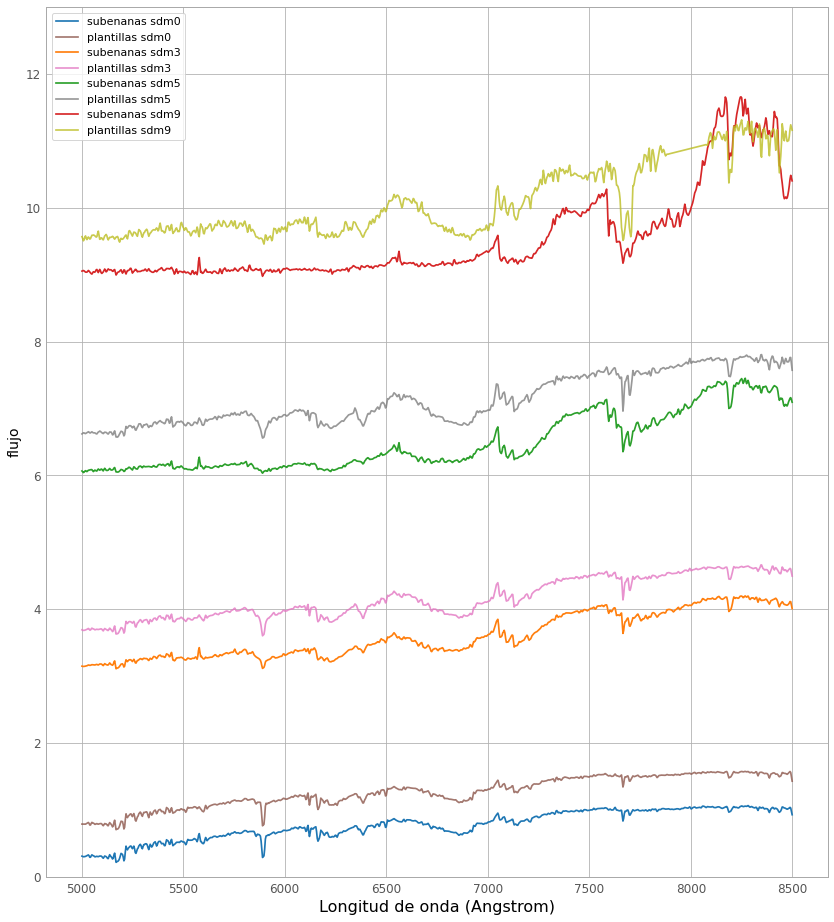

In [ ]:
plt.figure(figsize=(14,16))
k=0
paso=3

c1=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
c2=['#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

#lista_plantillas=[0,3,5,9]
#lista_plantillas=[10,13,15,19]
lista_plantillas=[20,23,25,29]

for j, i in enumerate(lista_plantillas):
  clase = df_em_plantillas.loc[i]['subclase_m']
  plt.plot(long_onda, np.asarray(df_em_plantillas.loc[i]['flujo'])+k*paso, color =c1[j], alpha=1,
           label= 'subenanas ' +clase)
  plt.plot(long_onda, np.asarray(df_em_plantillas.loc[i]['flujo_plantilla'])+k*paso+0.5, color=c2[j], alpha=0.8,
           label= 'plantillas ' +clase)
  k+=1
plt.ylim(0,13)
#plt.title('COMPARACIÓN POR SUBCLASE Y METALICIDAD EL PROMEDIO CON LAS PLANTILLAS, ORIGINAL Y TRATADA')
plt.xlabel('Longitud de onda (Angstrom)',size=16)
plt.ylabel('flujo',size = 14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(loc='best',fontsize=11)
#plt.axis('off')


**No hacer caso de lo que viene a continuación**

Separamos la subclase espectral de la clase de metalicidad. 

In [ ]:
subclase_=list(map(lambda x: 'M'+x[-1], subclases_m ))
subclase_m_=[x[:-1] for x in subclases_m]
df_plantillas['subclase']=subclase_
df_plantillas['metalicidad']=subclase_m_
df_plantillas.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,988,989,990,991,992,993,994,995,996,997,998,999,subclase_m,subclase,metalicidad
0,0.330121,0.330018,0.331438,0.329142,0.323133,0.32102,0.329912,0.338237,0.342728,0.349358,0.330280,0.300058,0.299462,0.328500,0.349142,...,1.029107,1.026875,1.022075,1.021830,1.020907,1.022825,1.026082,1.032621,1.041792,1.028415,0.969588,0.906443,usdm0,M0,usdm
1,0.313003,0.311334,0.311651,0.308765,0.302452,0.30033,0.309708,0.317777,0.317020,0.317700,0.303351,0.282443,0.284249,0.308898,0.325661,...,1.047258,1.037342,1.025030,1.022288,1.016008,1.018538,1.023808,1.028925,1.035420,1.023836,0.975568,0.923336,usdm1,M1,usdm


Creamos el dataset con los 

In [ ]:
prueba=espectros

In [ ]:
clase_ ='M2'
indice_em =12
espectros_em = (df_em[df_em['subclase']==clase_].reset_index(drop=True)).loc[indice_em][:1000]
espectro_p = (df_plantillas[df_plantillas['subclase']==clase_].reset_index(drop=True))
espectro_p_sd =  espectro_p[espectro_p['metalicidad']=='sdm'].values.ravel()[:1000]
espectro_p_esd = espectro_p[espectro_p['metalicidad']=='esdm'].values.ravel()[:1000]
espectro_p_usd = espectro_p[espectro_p['metalicidad']=='usdm'].values.ravel()[:1000]

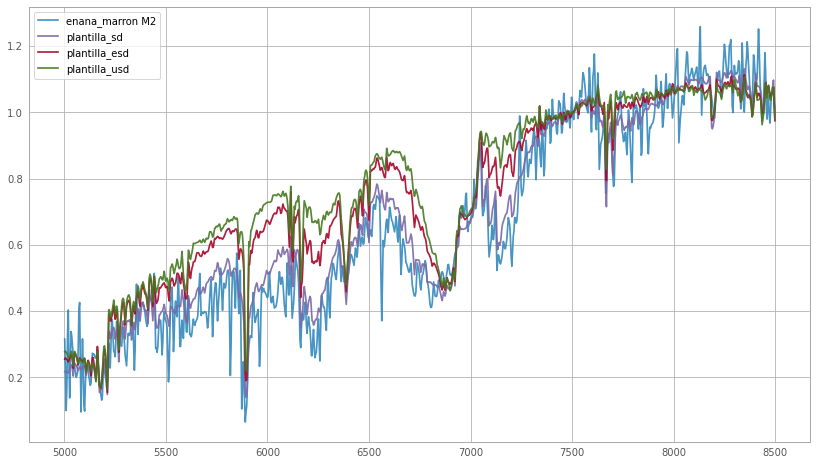

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(long_onda, espectros_em, label= 'enana_marron '+clase_,   alpha=0.9)

plt.plot(long_onda, espectro_p_sd,label= 'plantilla_sd', alpha=0.9)
plt.plot(long_onda, espectro_p_esd,label= 'plantilla_esd', alpha=0.9)
plt.plot(long_onda, espectro_p_usd,label= 'plantilla_usd', alpha=0.9)

plt.legend()

In [ ]:
indice = 100
test_2= df_em.loc[indice][:1000]
test_clase =  df_em.loc[indice]['subclase']

In [ ]:
test_2

'M9'

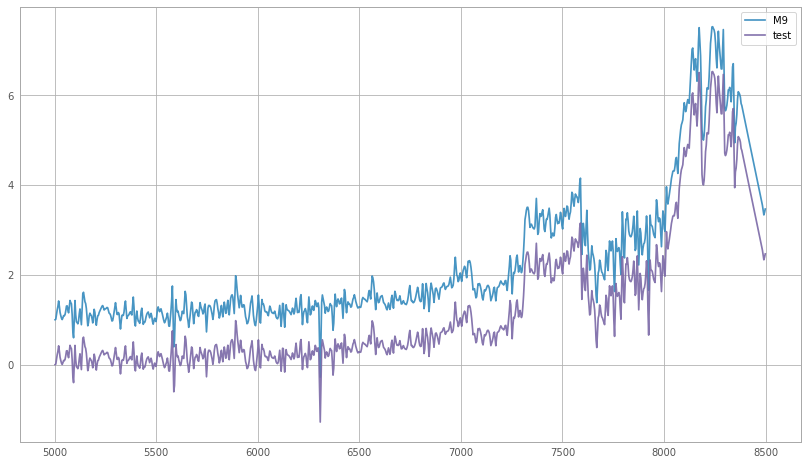

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(long_onda, test_2+1, label=test_clase, alpha=0.9)

plt.plot(long_onda, flujos_BD[indice],label= 'test', alpha=0.9)
plt.legend()

#Submuestreo espectros subenanas. 1600 muestras por espectro. Mismo tratamiento que en el catálogo West

Repetimos la parte de sobremuestreo, filtrado, normalización y submuetreo pero sobre el rango de 5000 a 9000 Armstrong. Nos quedaremos con 1600 longitudes de onda. Teníamos 7999 muestras en cada espectro. Repetiremos la última para tener 8000. Haremos intervalos de 5 longitudes de onda y asignaremos la mediana como el valor correspondiente a la longitud central del intervalo en el espectro submuestreado

## Sobremuestreo de los espectros.

Para poder un análisis posterior interesa que los flujos vengan referidos a una misma base de longitudes de onda.

Esto lo hacemos para coger la información relevante y unificar las longitudes de onda.

In [ ]:
df_info_obj_espec_zcorr.columns

Index(['SPECOBJID', 'ra', 'dec', 'sn_median_r', 'z', 'zerr', 'zwarning',
       'class', 'subclass', 'PLATE-MJD-FIBER', 'outlier_info', 'outrango_info',
       'flujo', 'long_A', 'PLATEQUALITY', 'extrapolado', 'max_long_A', 'ID',
       'SP', 'CAH2', 'CAH3', 'TIO5', 'outlier_indices', 'outrango_indices',
       'EWHA', 'EWHAERR', 'clase_metalicidad', 'subclass_c'],
      dtype='object')

Definimos un conjunto de longitudes de onda sobre las que interpolaremos los flujos. Tenemos flujos para unas  3800 longitudes de onda en un rango entre los 3800 y 9200 Armstrong. Haremos un sobremuestreo con un paso de 0.5 Armstrong entre 5000 y 9000 haciendo interpolación lineal. 

In [ ]:
new_long = np.arange(5000+0.5, 9000, 0.5)
new_long.shape

(7999,)

In [ ]:
new_long

array([5000.5, 5001. , 5001.5, ..., 8998.5, 8999. , 8999.5])

Podemos inspeccionar gráficamente en algunos espectros la interpolación

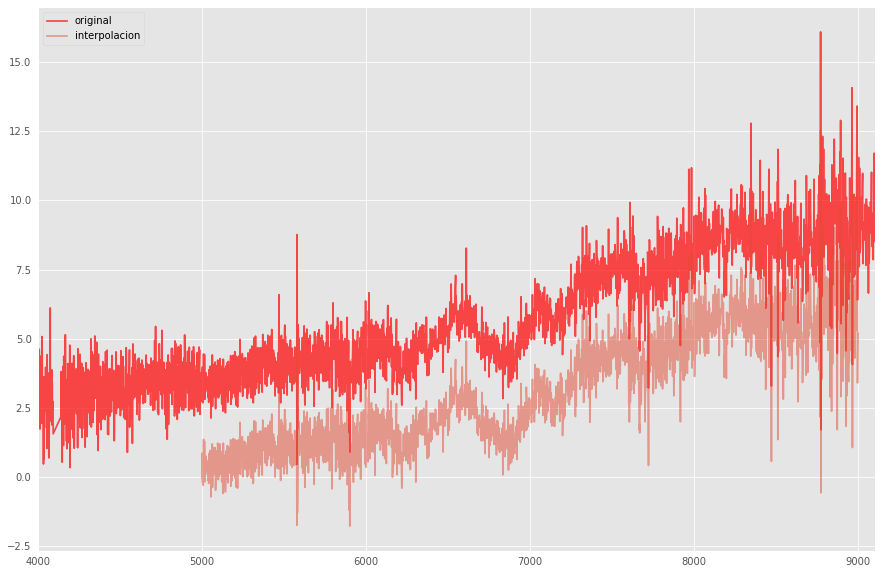

In [ ]:
indice=700
x = df_info_obj_espec_zcorr.loc[indice]['long_A']
y = df_info_obj_espec_zcorr.loc[indice]['flujo']
f_inter = interpolate.interp1d(x, y)
new_flujo = f_inter(new_long)

plt.figure(figsize=(15,10))
plt.plot(x, [k+3 for k in y], color='r', label = 'original',alpha = 0.7) #desplazamos en 3 el espectro original
plt.plot(new_long, new_flujo, label='interpolacion', alpha = 0.5)
plt.xlim(4000,9100)
#plt.ylim(-4,10)
plt.legend()
plt.show()

Hacemos la interpolación para todos los espectros.

In [ ]:
def fun_extrapolar(X, new_x):
  #new_x = np.arange(5000, 8000.5, 0.5)
  f_inter = interpolate.interp1d(X[0], X[1])
  return  f_inter(new_x)



In [ ]:
df_obj_espectros_extrap = df_info_obj_espec_zcorr.copy()

In [ ]:
df_obj_espectros_extrap.flujo = df_obj_espectros_extrap[['long_A','flujo']].apply(fun_extrapolar, new_x = new_long, axis=1)  



Podemos inspeccionar graficamente los resultados.

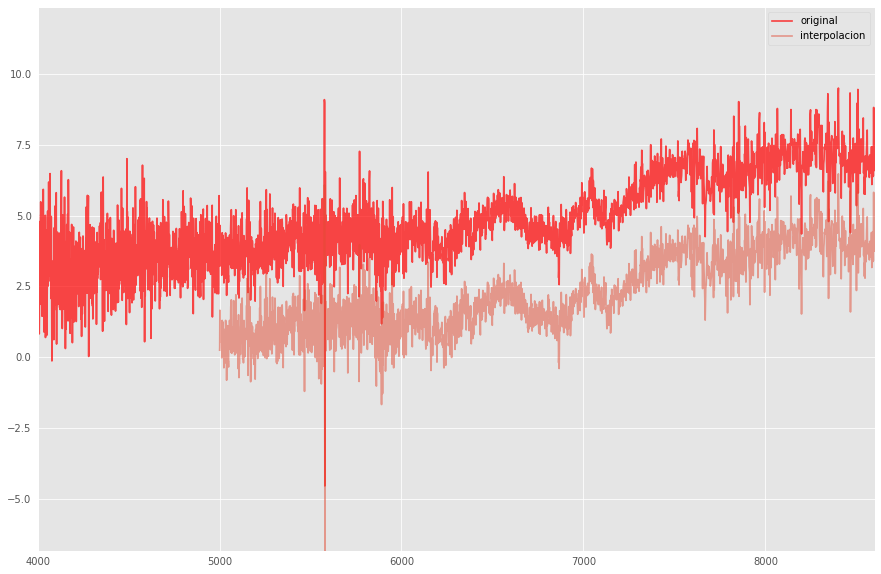

In [ ]:
indice =1300

new_flujo = df_obj_espectros_extrap.loc[indice,'flujo']
x = df_info_obj_espec_zcorr.loc[indice]['long_A']
y = df_info_obj_espec_zcorr.loc[indice]['flujo']

plt.figure(figsize=(15,10))
plt.plot(x, [k+3 for k in y], color='r', label = 'original',alpha = 0.7) #desplazamos  el espectro original
plt.plot(new_long, new_flujo, label='interpolacion', alpha = 0.5)
plt.xlim(4000,8600)
plt.ylim(new_flujo.min(),4+new_flujo.max())
plt.legend()
plt.show()

## Filtrado de los espectros

Utilizaremos ondículas. Es importante que los flujos correspondan a longitudes de onda equiespaciadas. Eso lo hemos hecho cuando hemos definido una base estándar de longitudes de onda.

In [ ]:
w_type='sym3'
#print(pywt.Wavelet(wavelet_type))

Tras diversas pruebas decompondremos hasta nivel 4 y eliminaremos los dos coeficientes de detalle más bajos. 
Probamos hasta nivel 6 y eliminaremos los 4 coeficientes de detalle más bajos.

Definimos una función que nos filtrará usando ondículas y que nos eliminaré outliers de los flujos

In [ ]:
def filtrado_ondiculas(datos,ondicula, nivel, coef_a_anular,longitud,n_sigma=100):
  """
  Filtrado con ondículas.
  :param: tipo de ondícula
  :param: array de datos a filtrar.
  :param: nivel: nivel para la transformada
  :param:coef_a_anular: lista con los coeficientes de detalle a anular
  :param:tamaño de los datos a devolver
  :return: datos filtrados.
  """
  datos = np.asarray(datos)
  media = datos.mean()
  std = datos.std()
  def quitar_outliers(n_sigma,media,std):
    def suavizar(x):
      if x > media +n_sigma*std:
        x= media+std
      elif x<media-n_sigma*std:
        x=media-std
      return x
    return suavizar
  
  suavizado = quitar_outliers(n_sigma, media, std)
  datos = np.asarray(list(map(suavizado,datos)))

  DWTcoeffs = pywt.wavedec(datos,ondicula,mode='sym', level=nivel, axis=-1)
  for coef_to_cero in coef_a_anular:
    DWTcoeffs[coef_to_cero] = np.zeros_like(DWTcoeffs[coef_to_cero])
    
  return pywt.waverec(DWTcoeffs,ondicula,mode='sym',axis=-1)[:longitud]
    #return np.asarray(y)[:longitud]

Aplicamos los mismos parámetros para filtrar

In [ ]:
df_espectros_filtrados_sd = df_obj_espectros_extrap[['SPECOBJID','flujo']]
df_espectros_filtrados_sd['flujo']=df_espectros_filtrados_sd['flujo'].apply(filtrado_ondiculas, ondicula= 'sym3', nivel=6,
                                                                            coef_a_anular=[4,5,6],longitud=new_long.shape[0], n_sigma=3)


In [ ]:
df_espectros_filtrados_sd

,SPECOBJID,flujo
0,309697273216919552,"[0.43296465482154833, 0.4339315612623476, 0.43..."
1,309715140280870912,"[1.5736338722664849, 1.636141776705074, 1.7170..."
2,312010645648205824,"[0.1084356462640893, 0.01918063358047704, -0.0..."
3,315338862379427840,"[3.9787411183623154, 3.984678620122188, 3.9834..."
4,316414459662854144,"[10.342196398970957, 10.52376697103024, 10.741..."
...,...,...
2998,3327057665879730176,"[0.2957822722432133, 0.2913677255419417, 0.288..."
2999,3327140953885534208,"[0.030538786460655405, -0.003046386591983529, ..."
3000,3328176143462328320,"[-0.027111733266725616, -0.02664678232154024, ..."
3001,3331593700680689664,"[1.1854069425977518, 1.2061042164136182, 1.234..."


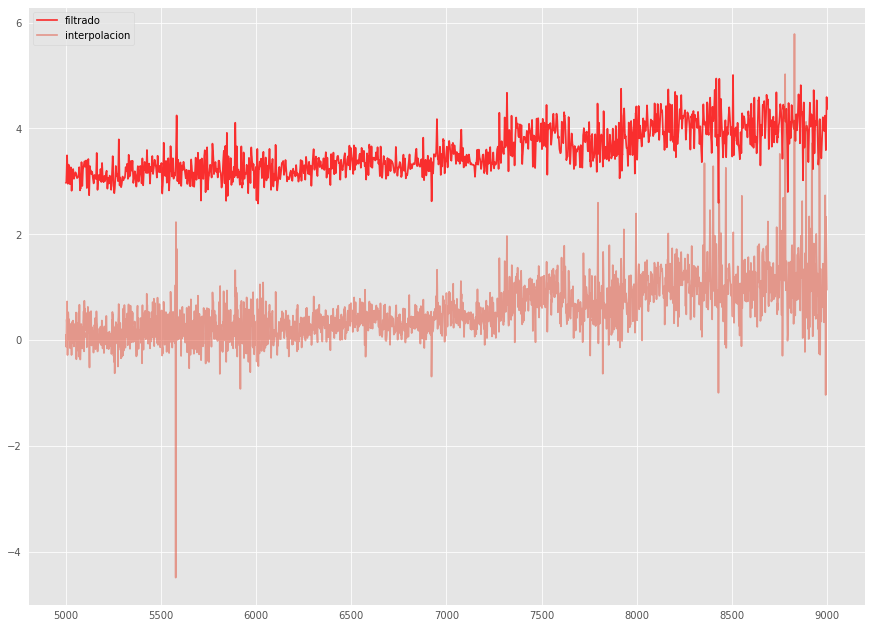

In [ ]:
indice =3000

y_ = df_obj_espectros_extrap.loc[indice,'flujo']
x = new_long
y = df_espectros_filtrados_sd.loc[indice,'flujo']

plt.figure(figsize=(15,11))
plt.plot(x, y+3, color='r', label = 'filtrado',alpha = 0.8) #desplazamos  el espectro 
plt.plot(x, y_, label='interpolacion', alpha = 0.5)
#plt.xlim(7475,7525)
#plt.ylim(min(y),max(y))
plt.legend()
plt.show()

## Normalización de los espectros subenanas

Los espectros de las plantillas están normalizados respecto al flujo a 7500 Armstrong. Haremos la normalización usando la mediana del intervalo 7500+/- 25

In [ ]:
def normalizacion(espectro ,rang_lo, lo_norm, delta):
  """
  Función: Normaliza el espectro dividiendo por un flujo de normalización

  :param: espectro_[0] flujo del espectro a normalizar
  :param: rang_lo longitudes de onda correspondientes.
  :param: lo_norm: logitud de onda cuyo flujo se tomará como referencia.
  :param: delta: El flujo para normalizar se calculará como la mediana de los flujos en el intervalo [lo_norm-delta, lo_norm+delta]
  :RETURN: flujo normalizado
  """
  espectro = np.asarray(espectro)
  rang_lo = np.asarray(rang_lo)

  rango = np.where((rang_lo>=lo_norm-delta)&(rang_lo<=lo_norm+delta))
  mediana = np.median(espectro[rango])
  return espectro/mediana



In [ ]:
df_espectros_normalizados_sd = df_espectros_filtrados_sd.copy()
df_espectros_normalizados_sd['flujo']=df_espectros_normalizados_sd['flujo'].apply(normalizacion,rang_lo=new_long, lo_norm=7500, delta=25)
df_espectros_normalizados_sd.head(3)

,SPECOBJID,flujo
0,309697273216919552,"[0.17933211083090334, 0.17973259934901575, 0.1..."
1,309715140280870912,"[0.13020092470191375, 0.1353727674682119, 0.14..."
2,312010645648205824,"[0.041324716506565023, 0.007309720303589984, -..."


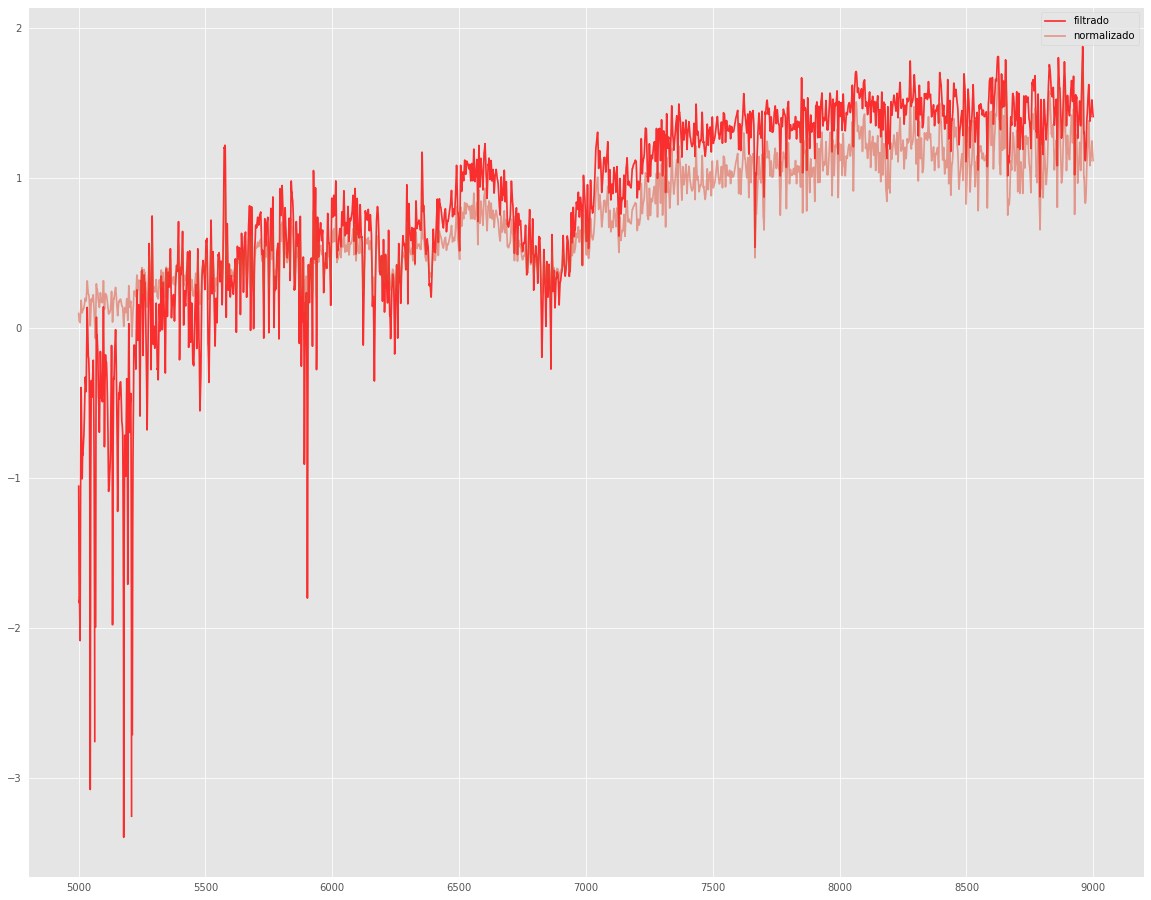

In [ ]:
indice =2800
y_ = df_espectros_normalizados_sd.loc[indice,'flujo']
x = new_long
y = df_espectros_filtrados_sd.loc[indice,'flujo']

plt.figure(figsize=(20,16))
plt.plot(x, np.log(y), color='r', label = 'filtrado',alpha = 0.8) #desplazamos  el espectro 
plt.plot(x, y_, label='normalizado', alpha = 0.5)
#plt.xlim(7475,7525)
#plt.ylim(min(y_),max(y_))
plt.legend()
plt.show()

## Submuestreo de los espectros.

Submuestreamos para quedar con 1600 longitudes de onda entre 5000 y 9000 Armstrong

In [ ]:
#Recortamos la lista para que la primera longitud de onda sea la central del primer intervalor
sub_long_1 = new_long[2:]
print(sub_long_1[0])
new_long[0:5]

5001.5


array([5000.5, 5001. , 5001.5, 5002. , 5002.5])

In [ ]:
sub_long_1.shape

(7997,)

Seleccionamosla nueva base de longitudes de onda

In [ ]:
#Seleccionamos cada 5.
sub_long=sub_long_1[::5]
print(sub_long.shape)
sub_long[:5] #nuevas longitudes de onda

(1600,)


array([5001.5, 5004. , 5006.5, 5009. , 5011.5])

Necesitamos 8000 valores del flujo por espectro pero solo tenemos 7999. Repetiremos el último.

In [ ]:
df_espectros_normalizados_sd['flujo'][0].shape

(7999,)

In [ ]:
flujos_inc = list(map(lambda x: np.asarray(list(x)+[x[-1]]),df_espectros_normalizados_sd['flujo']))
flujos_inc[0].shape

(8000,)

Definimos la función para submuestrear.

In [ ]:
'''
Esta no la usamos
def fun_submuestreo(flujos,intervalo = 5,n_new_flujos=1600):
  """
  :param: flujos de un objeto. dim 8000
  :param: intervalor. tamaño del intervalo sobre el que se calculará la mediana
  :return: array con 1600 valores para el flujo submuestreado. Mediana de cada intervalo de 5 flujos
  """
  new=np.empty((1,n_new_flujos))
  for i in range(intervalo):
    #desplazamos en cada iteración los flujos. Muestraemos con intervalo. 
    #Apilamos cada desplazamiento
    new=np.concatenate((new,flujos[i:][::intervalo].reshape(-1,n_new_flujos)),axis=0)
  #return new
  return np.median(new[1:,:],axis=0)
'''

In [ ]:
def fun_submuestreo(intervalo = 5,n_new_flujos=1600):
  """
  :param: flujos de un objeto. dim 8000
  :param: intervalor. tamaño del intervalo sobre el que se calculará la mediana
  :return: array con 1600 valores para el flujo submuestreado. Mediana de cada intervalo de 5 flujos
  """
  def submuestreo(flujos):
    new=np.empty((1,n_new_flujos))
    for i in range(intervalo):
      #desplazamos en cada iteración los flujos. Muestraemos con intervalo. 
      #Apilamos cada desplazamiento
      new=np.concatenate((new,flujos[i:][::intervalo].reshape(-1,n_new_flujos)),axis=0)
    #return new
    return np.median(new[1:,:],axis=0)
  return submuestreo

La probamos

In [ ]:
sub_m = fun_submuestreo(intervalo = 5,n_new_flujos=1600)

In [ ]:
test = sub_m(flujos_inc[0])

In [ ]:
test.shape

(1600,)

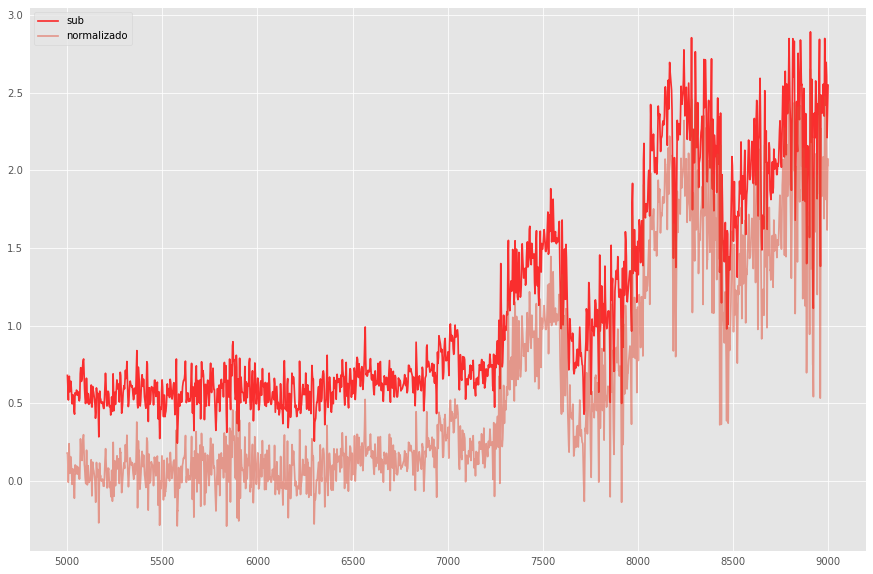

In [ ]:
y_ = df_espectros_normalizados_sd.iloc[0]['flujo']
x_ = new_long
y = test
x = sub_long

plt.figure(figsize=(15,10))
plt.plot(x, y+0.5, color='r', label = 'sub',alpha = 0.8) #desplazamos  el espectro 
plt.plot(x_, y_, label='normalizado', alpha = 0.5)
#plt.xlim(7400,7600)
#plt.ylim(min(y_),max(y_))
plt.legend()
plt.show()

La aplicamos a todos los espectros

In [ ]:
sub_m = fun_submuestreo(intervalo = 5,n_new_flujos=1600)

In [ ]:
flujos_sub_em = np.asarray(list(map(sub_m,flujos_inc)))
flujos_sub_em.shape

(3003, 1600)

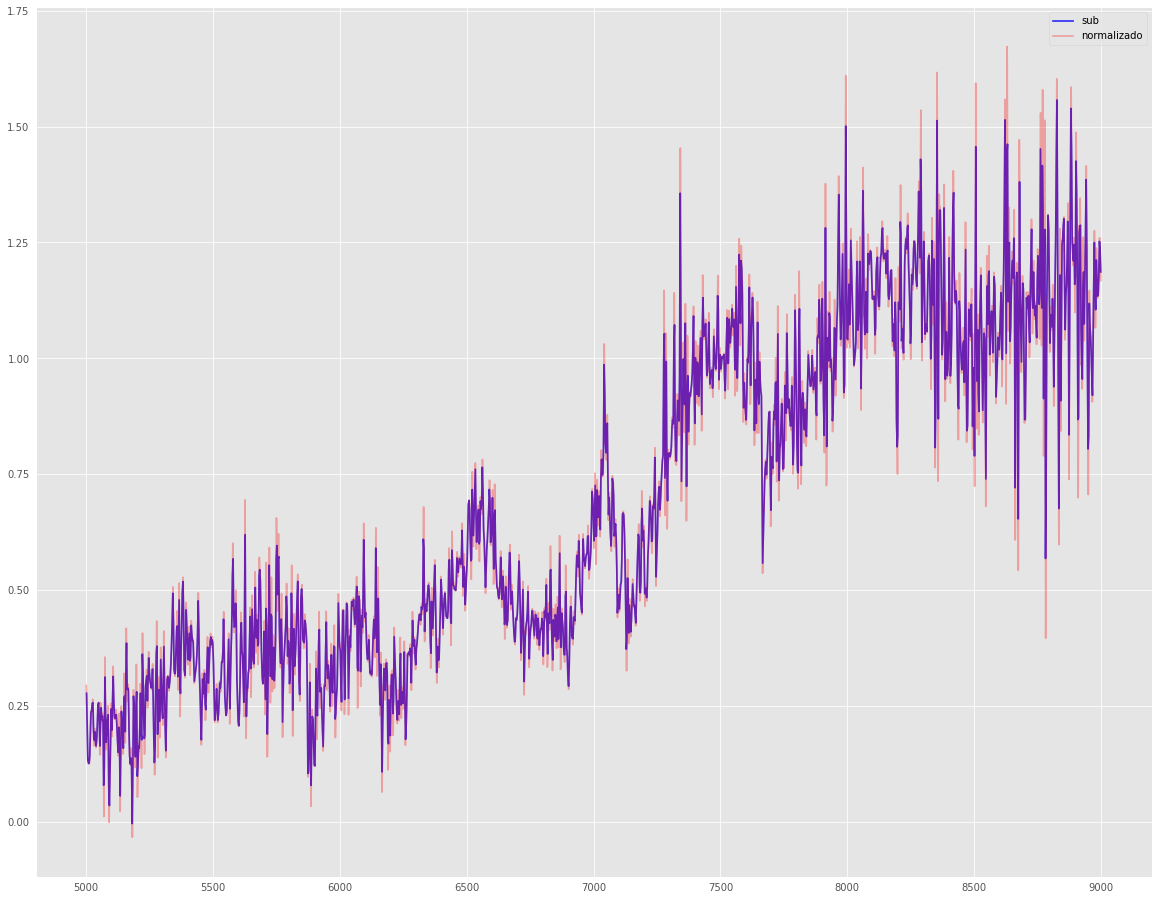

In [ ]:
indice =1500

y_ = df_espectros_normalizados_sd.iloc[indice]['flujo']
x_ = new_long
y = flujos_sub_em[indice]
x = sub_long

plt.figure(figsize=(20,16))
plt.plot(x, y, color='b', label = 'sub',alpha = 0.8) #desplazamos  el espectro 
plt.plot(x_, y_, color='r', label='normalizado', alpha = 0.3)
#plt.xlim(7400,7600)
#plt.ylim(min(y_),max(y_))
plt.legend()
plt.show()

#### Guardado datos limpiados, filtrados y submuestreados a 1600 longitudes de onda muestra subenanas catálogo Sacheva.

La siguiente fase será ya clustering. Vamos a guardar la matriz con los flujos por un lado y el de las longitudes de onda por otro. Así mismo guardaremos el resto de la información de las subenanas en csv.

In [ ]:
print(flujos_sub_em.shape)
df_obj_espectros_extrap.shape #contiene los espectros e información.

(3003, 1600)


(3003, 28)

En df_obj_espectros_extrap los flujos y longitudes de onda no son los procesados y submuestreados, por ello eliminamos dichas columnas.

In [ ]:
df_info_subenanas = df_obj_espectros_extrap.drop(columns= ['flujo', 'long_A'],inplace=False)
df_info_subenanas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3003 entries, 0 to 3002
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SPECOBJID          3003 non-null   int64  
 1   ra                 3003 non-null   object 
 2   dec                3003 non-null   object 
 3   sn_median_r        3003 non-null   float64
 4   z                  3003 non-null   float64
 5   zerr               3003 non-null   float64
 6   zwarning           3003 non-null   int64  
 7   class              3003 non-null   object 
 8   subclass           3003 non-null   object 
 9   PLATE-MJD-FIBER    3003 non-null   object 
 10  outlier_info       3003 non-null   bool   
 11  outrango_info      3003 non-null   bool   
 12  PLATEQUALITY       3003 non-null   object 
 13  extrapolado        3003 non-null   bool   
 14  max_long_A         3003 non-null   float64
 15  ID                 3003 non-null   object 
 16  SP                 3003 

In [ ]:
subclases=np.asarray(df_info_subenanas['subclass'])
clase_metalicidad = np.asarray(df_info_subenanas['clase_metalicidad'])


También guardaramos toda la información en un fichero numpy comprimido

In [ ]:
directorio = '../Espectros/datos_json/'
#df_info_subenanas.to_csv(directorio+"info_muestra_tratada_SubEM.csv")
np.savez_compressed(directorio+'muestra_SubEM_tratada_1600.npz', 
                    flujos=flujos_sub_em,
                    long_onda=sub_long,
                    subclases=subclases,
                    clase_metalicidad = clase_metalicidad,
                    datos=df_info_subenanas.values,
                    columnas=df_info_subenanas.columns)

Comprobamos que se leen correctamente.

In [ ]:
directorio = '../Espectros/datos_json/'
muestra_BD = np.load(directorio+'muestra_SubEM_tratada_1600.npz',allow_pickle=True)
muestra_BD.files


['flujos', 'long_onda', 'subclases', 'clase_metalicidad', 'datos', 'columnas']

In [ ]:
flujos_BD, long_onda, subclases, clase_metalicidad, datos, columnas = [muestra_BD[f] for f in muestra_BD.files]

In [ ]:
flujos_BD[0].shape

(1600,)

In [ ]:
flujos_BD[0]

array([0.17895432, 0.0939224 , 0.02069749, ..., 1.70995012, 1.90002124,
       2.04784609])

In [ ]:
columnas

array(['SPECOBJID', 'ra', 'dec', 'sn_median_r', 'z', 'zerr', 'zwarning',
       'class', 'subclass', 'PLATE-MJD-FIBER', 'outlier_info',
       'outrango_info', 'PLATEQUALITY', 'extrapolado', 'max_long_A', 'ID',
       'SP', 'CAH2', 'CAH3', 'TIO5', 'outlier_indices',
       'outrango_indices', 'EWHA', 'EWHAERR', 'clase_metalicidad',
       'subclass_c'], dtype=object)

In [ ]:
long_onda

array([5001.5, 5004. , 5006.5, ..., 8994. , 8996.5, 8999. ])

In [ ]:
del muestra_BD

# Final